# Analisi di dati scalari: pressione, temperatura, umidità, precipitazione, radiazione

In [ ]:
#install.packages('ggplot2')
#install.packages('dplyr')
library('dplyr')
library('ggplot2')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
install.packages('lattice')
library('lattice')

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('GGally')
library('GGally')

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [ ]:
ReadData <- function(c='ciao') {
    
    StationData <- read.table(file(paste0('Data/StationData_', c, '.txt')),
                          sep = "", # separate columns by space
                          fill = TRUE,
                          na.string = NA, # tag empty values as "NA"
                          as.is = TRUE, # convert character to factors
                          header = FALSE, # ignore the header
                          skip = 1, # skip the first row
                          col.names = c("Date","Time","Interval",
                                        "Press","inTemp","outTemp",
                                        "inHum","outHum","wndSpeed",
                                        "wndDir","windGust","wGstDir",
                                        "rainRate","rain","dewpoint",
                                        "wdChill","heatIndx","ET",
                                        "totRad","UV")
                            )


    # DATE FORMAT ===============================================
    # Define 1st and 2nd columns as a String and split into 5 columns
    Temp <- t(rbind(as.numeric(substr(StationData[,1],1,4)), # year
          as.numeric(substr(StationData[,1],5,6)), # month
          as.numeric(substr(StationData[,1],7,8)), # day
          floor(StationData[,2]), # hour
          round(100*(StationData[,2] %%1)) # minutes
          ))

    # Define names to rows and columns
    colnames(Temp) <- c("Year","Month","Day","Hour","Minutes")
    rownames(Temp) <- 1:dim(Temp)[1]

    StationData2 <- cbind(Temp, StationData[,9:10:11])
    Giornox = dplyr::filter(StationData2, (StationData2$Year == 2017) & (StationData2$Month == 5) & (StationData2$Day == 12) & (StationData2$Hour > 15 & StationData2$Hour < 21))
    print(Giornox)

    # Replace the new date format (2 cols > 5 cols) and keep only the WindRose variables
    StationData <- cbind(Temp, StationData$Press, StationData[,6],
                    StationData[,8], StationData[,13], StationData[,19])
    colnames(StationData) = c('Year', 'Month', 'Day', 'Hour', 'Minutes', 'Press', 'outTemp', 'outHum', 'rainRate', 'totRad')
    
    StationData = as.data.frame(StationData)
    return(StationData)
}

StationDataA = ReadData('A')
StationDataB = ReadData('B')
StationDataC = ReadData('C')

Warning message in 9:10:11:
“numerical expression has 2 elements: only the first used”
       Year Month Day Hour Minutes wndSpeed wndDir windGust
203661 2017     5  12   16       0    1.341   90.0    3.129
203662 2017     5  12   16      30    0.894   90.0    3.576
203663 2017     5  12   17       0    0.894   90.0    2.682
203664 2017     5  12   17      30    0.894   90.0    3.129
203665 2017     5  12   18       0    1.788    0.0    8.940
203666 2017     5  12   18      30    0.894  112.5    2.682
203667 2017     5  12   19       0    0.894   90.0    2.235
203668 2017     5  12   19      30    0.894  157.5    2.235
203669 2017     5  12   20       0    0.000  157.5    1.341
203670 2017     5  12   20      30    0.447  157.5    0.894
Warning message in 9:10:11:
“numerical expression has 2 elements: only the first used”
       Year Month Day Hour Minutes wndSpeed wndDir windGust
161563 2017     5  12   16       0    1.341   90.0    4.023
161564 2017     5  12   16      30    1.341   

In [ ]:
PeriodSelectorW <- function(StationData) {
    winter_data = dplyr::filter(StationData, ((StationData$Year == 2015 & StationData$Month == 12) |
                                     (StationData$Year == 2016 & (StationData$Month == 1 | StationData$Month == 2 | StationData$Month == 12)) |
                                     (StationData$Year == 2017 & (StationData$Month == 1 | StationData$Month == 2 | StationData$Month == 12)) |
                                     (StationData$Year == 2018 & (StationData$Month == 1 | StationData$Month == 2)))& StationData$Minutes == 0)
    return(winter_data)
}

PeriodSelectorS <- function(StationData) {

    spring_data = dplyr::filter(StationData,((StationData$Year == 2016 & (StationData$Month == 3 | StationData$Month == 4 | StationData$Month == 5)) |
                                     (StationData$Year == 2017 & (StationData$Month == 3 | StationData$Month == 4 | StationData$Month == 5)) |
                                     (StationData$Year == 2018 & (StationData$Month == 3 | StationData$Month == 4 | StationData$Month == 5)))& StationData$Minutes == 0)  

    
    return(spring_data)
}

winter_data_A = PeriodSelectorW(StationDataA)
winter_data_B = PeriodSelectorW(StationDataB)
winter_data_C = PeriodSelectorW(StationDataC)

spring_data_A = PeriodSelectorS(StationDataA)
spring_data_B = PeriodSelectorS(StationDataB)
spring_data_C = PeriodSelectorS(StationDataC)

In [ ]:
#filtraggio dati comuni con C
commonAC_W = merge(winter_data_A, winter_data_C, by = c('Year', 'Month', 'Day', 'Hour'), suffixes = c('A', 'C'))
commonBC_W = merge(winter_data_B, winter_data_C, by = c('Year', 'Month', 'Day', 'Hour'), suffixes = c('B', 'C'))

commonAC_S = merge(spring_data_A, spring_data_C, by = c('Year', 'Month', 'Day', 'Hour'), suffixes = c('A', 'C'))
commonBC_S = merge(spring_data_B, spring_data_C, by = c('Year', 'Month', 'Day', 'Hour'), suffixes = c('B', 'C'))


### Dati ARPAE

In [ ]:
ReadDataARPAE <- function(c='ciao') {
    
    StationData <- read.table(file(paste0('ARPAE/', c, '_scalari.txt')),
                          fill = TRUE,
                          sep = "", # separate columns by space
                          na.strings = 'NA', # tag empty values as "NA"
                          as.is = TRUE, # convert character to factors
                          header = FALSE, # ignore the header
                          skip = 1, # skip the first row
                          col.names = c("Date","Time","Press", "totRad","rainRate", "outHum", "outTemp")
                            )

    # DATE FORMAT ===============================================
    # Define 1st and 2nd columns as a String and split into 5 columns
    Temp <- t(rbind(as.numeric(substr(StationData[,1],7,10)), # year
          as.numeric(substr(StationData[,1],4,5)), # month
          as.numeric(substr(StationData[,1],1,2)), # day
          as.numeric(substr(StationData[,2],1,2))
          ))

    # Define names to rows and columns
    colnames(Temp) <- c("Year","Month","Day","Hour")
    rownames(Temp) <- 1:dim(Temp)[1]

    # Replace the new date format (2 cols > 5 cols) and keep only the WindRose variables
    StationData <- cbind(Temp, StationData[,3], StationData[,4],
                    StationData[,5], StationData[,6], StationData[,7])
    colnames(StationData) = c('Year', 'Month', 'Day', 'Hour',"Press", "totRad","rainRate", "outHum", "outTemp")
    
    StationData = as.data.frame(StationData)
    return(StationData)
}

StationData_S_16 = ReadDataARPAE('Spring_16')
StationData_S_17 = ReadDataARPAE('Spring_17')
StationData_S_18 = ReadDataARPAE('Spring_18')

StationData_W_15 = ReadDataARPAE('Winter_15')
StationData_W_16 = ReadDataARPAE('Winter_16')
StationData_W_17 = ReadDataARPAE('Winter_17')

WinterARPAE = rbind(StationData_W_15, StationData_W_16, StationData_W_17)
SpringARPAE = rbind(StationData_S_16, StationData_S_17, StationData_S_18)

In [ ]:
giorno_X_ARPAE = SpringARPAE %>% filter(Year == 2017 & Month == 5 & Day == 12)

In [ ]:
WinterARPAE = WinterARPAE %>% filter(!is.na(totRad) & !is.na(rainRate) & !is.na(Press) & !is.na(outHum) & !is.na(outTemp))
WinterARPAE$totRad[WinterARPAE$totRad < 0 ] = 0

SpringARPAE = SpringARPAE %>% filter(!is.na(totRad) & !is.na(rainRate) & !is.na(Press) & !is.na(outHum) & !is.na(outTemp))
SpringARPAE$totRad[SpringARPAE$totRad < 0 ] = 0


## Studierellino su come applicare filtri su queste quantità

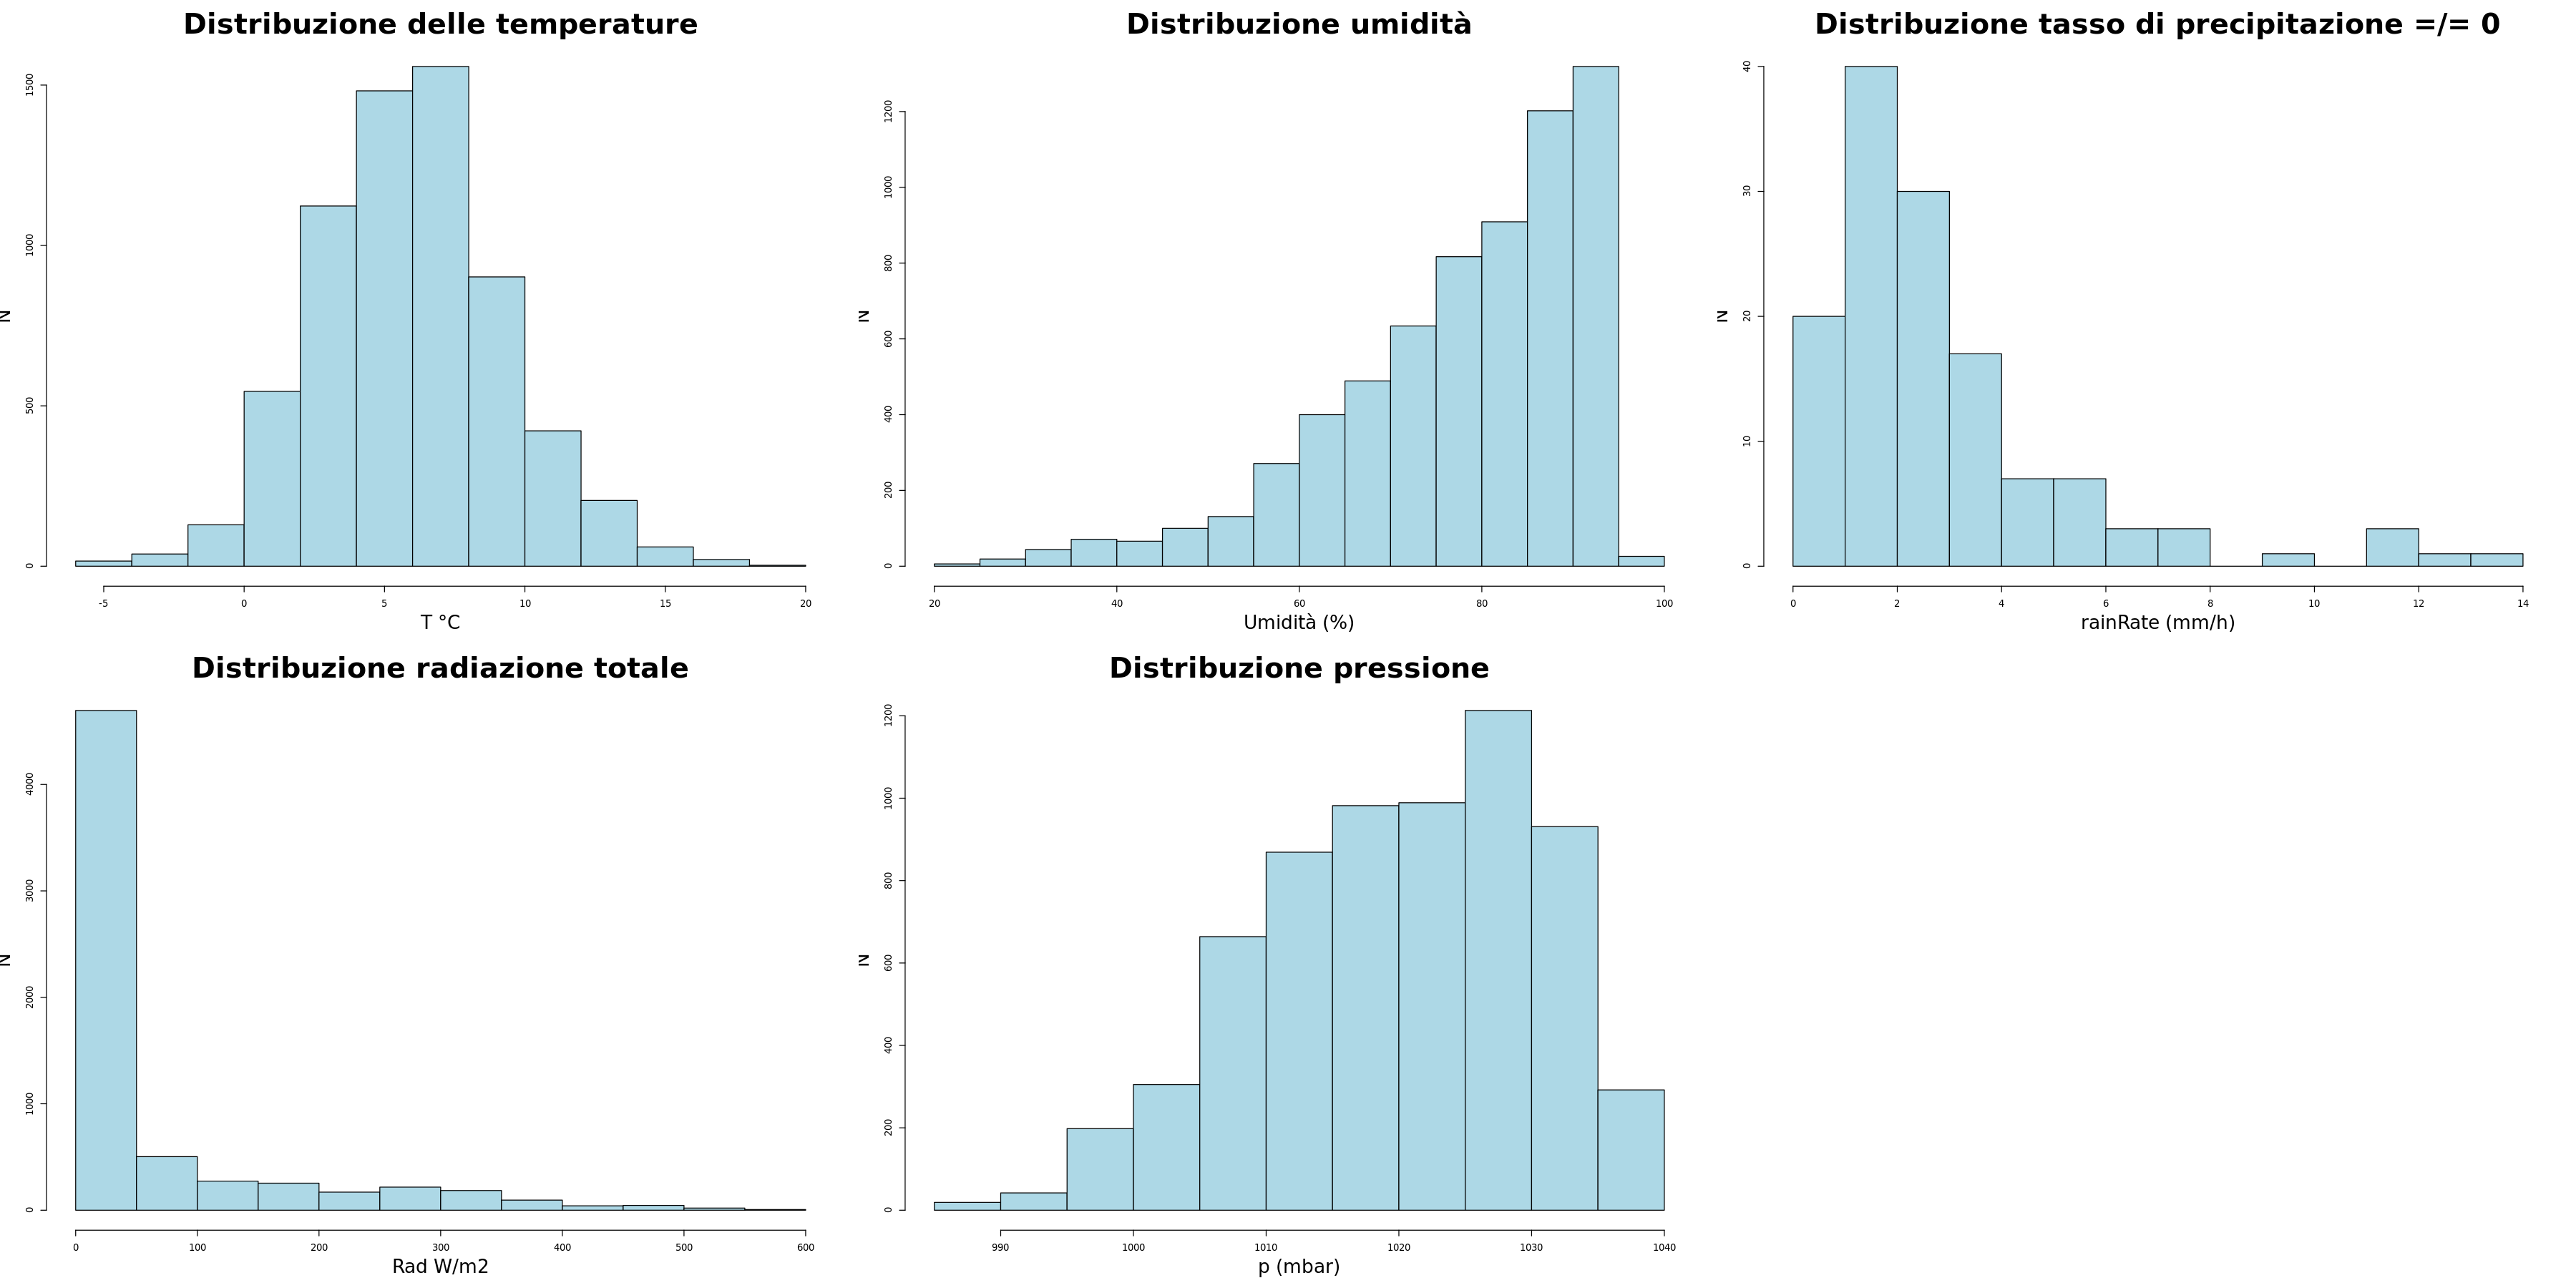

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 15)
par(mfrow = c(2,3))
hist(winter_data_A$outTemp, main = 'Distribuzione delle temperature', ylab = 'N', xlab = 'T °C',
    cex.main = 3, cex.lab = 2, col = 'lightblue')
hist(winter_data_A$outHum, main = 'Distribuzione umidità', ylab = 'N', xlab = 'Umidità (%)',
    cex.main = 3, cex.lab = 2, col = 'lightblue')
hist((winter_data_A %>% filter(rainRate != 0))$rainRate, main = 'Distribuzione tasso di precipitazione =/= 0', ylab = 'N', xlab = 'rainRate (mm/h)',
    cex.main = 3, cex.lab = 2, col = 'lightblue')
hist(winter_data_A$totRad, main = 'Distribuzione radiazione totale', ylab = 'N', xlab = 'Rad W/m2',
    cex.main = 3, cex.lab = 2, col = 'lightblue')
hist(winter_data_A$Press, main = 'Distribuzione pressione', ylab = 'N', xlab = 'p (mbar)',
    cex.main = 3, cex.lab = 2, col = 'lightblue')


In [ ]:
max(winter_data_A$rainRate)

[1] 13.4

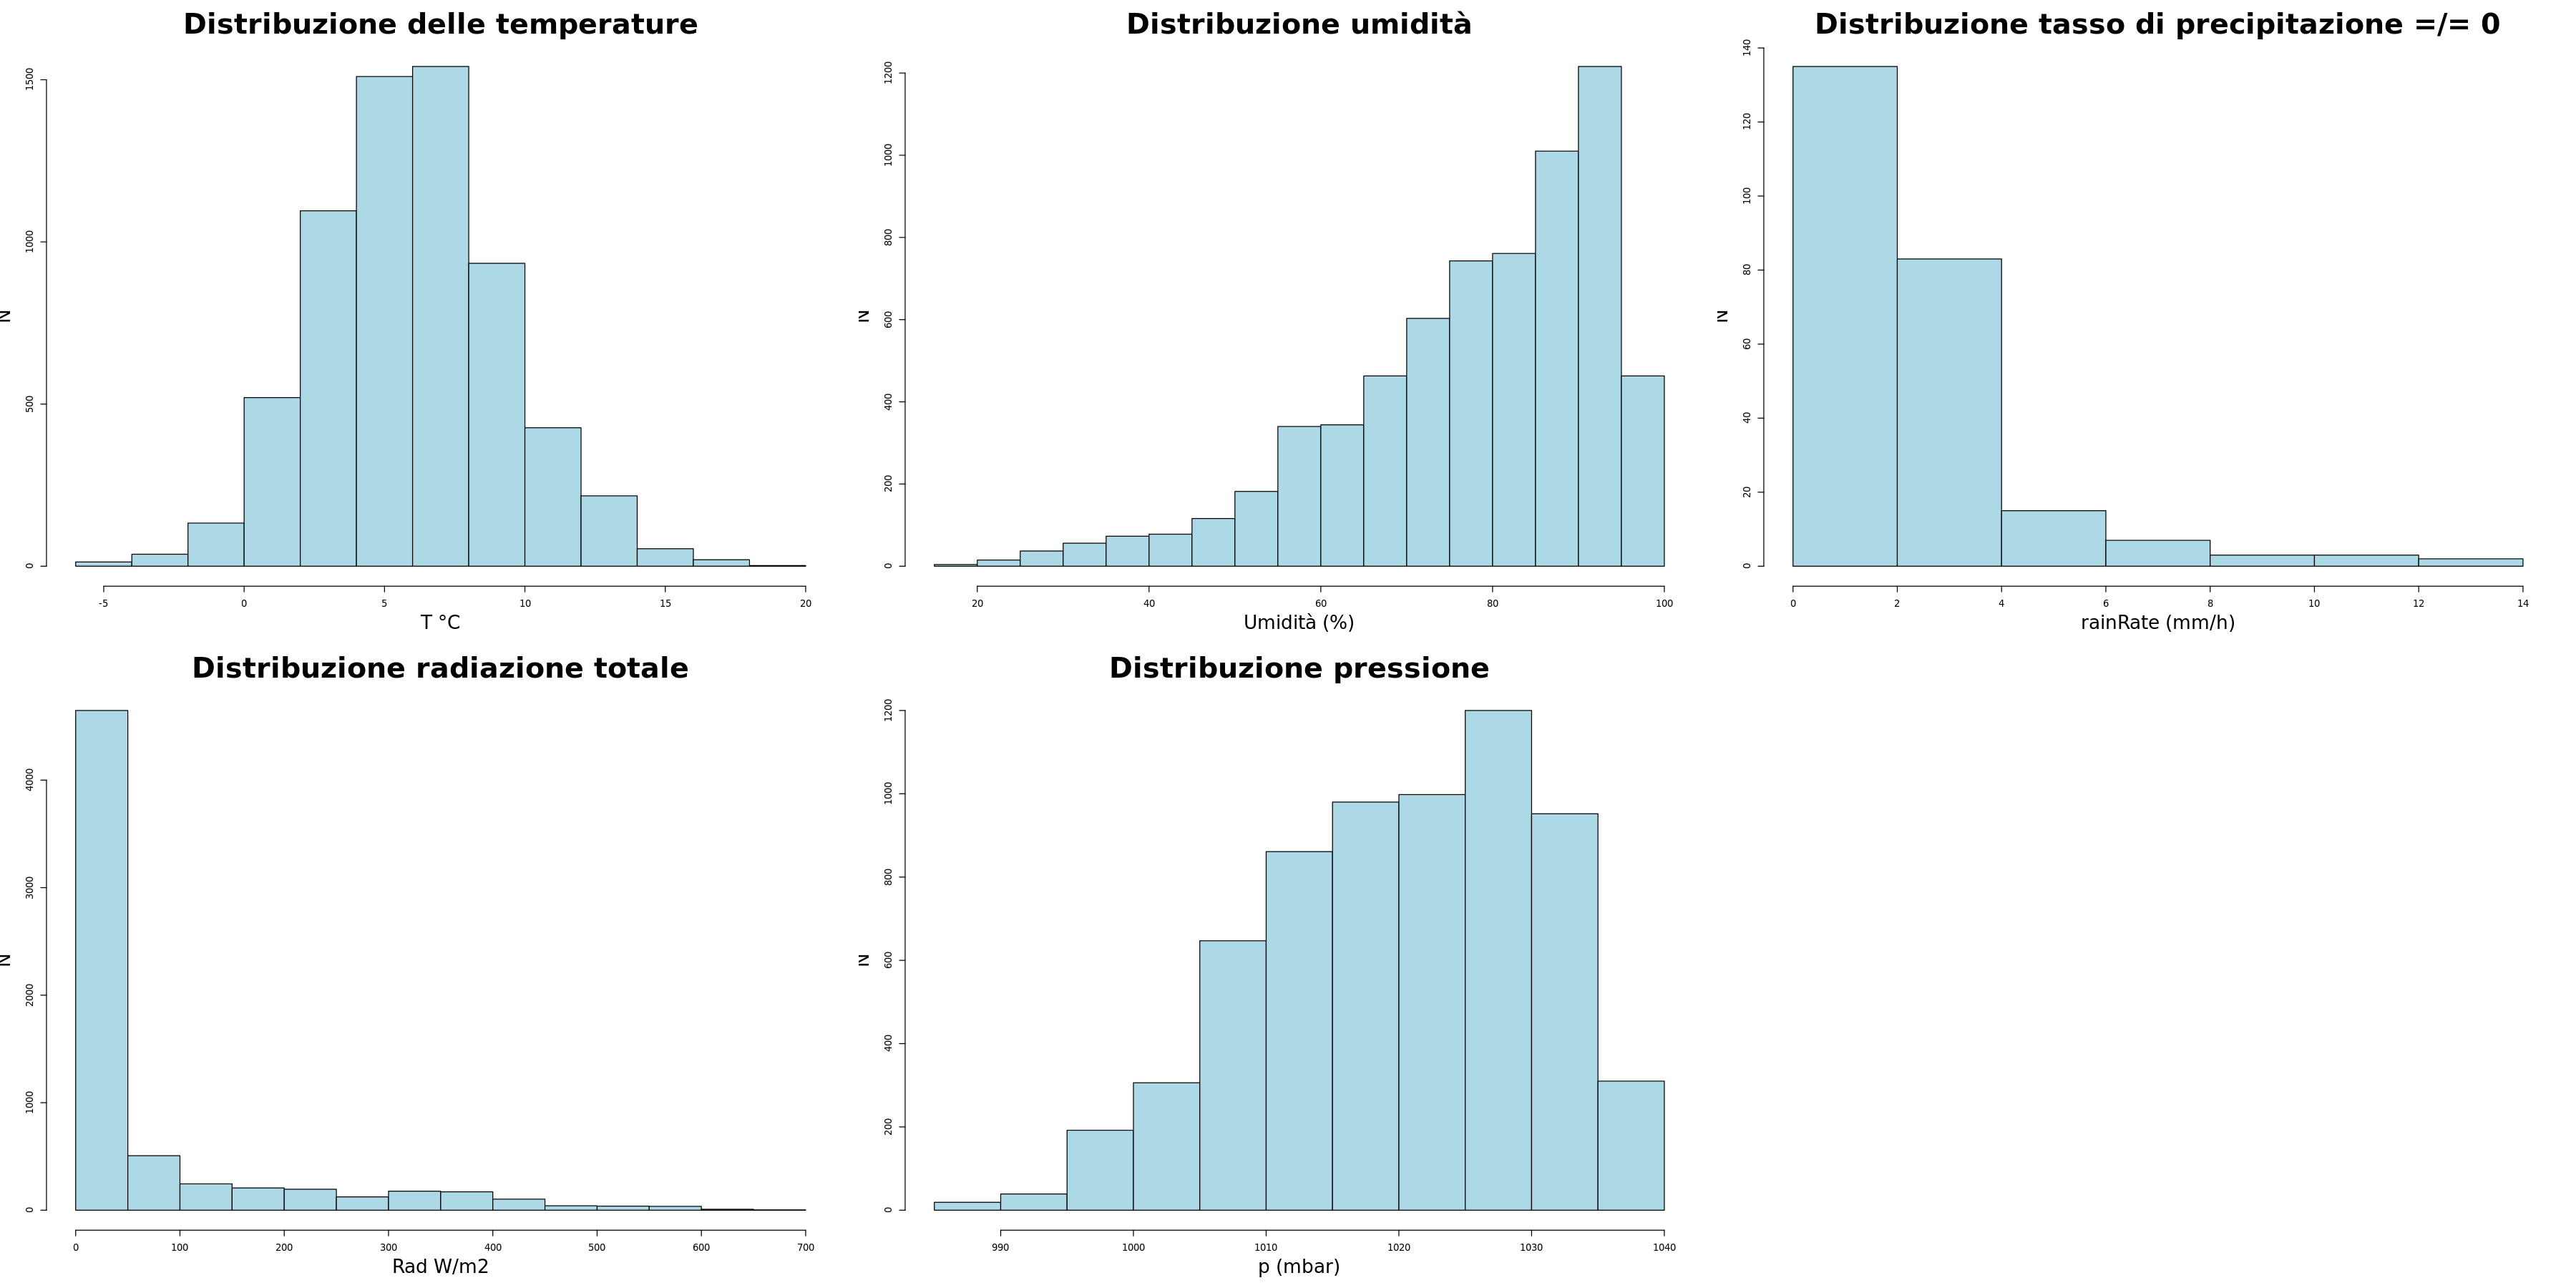

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 15)
par(mfrow = c(2,3))
hist(winter_data_B$outTemp, main = 'Distribuzione delle temperature', ylab = 'N', xlab = 'T °C',
    cex.main = 3, cex.lab = 2, col = 'lightblue')
hist(winter_data_B$outHum, main = 'Distribuzione umidità', ylab = 'N', xlab = 'Umidità (%)',
    cex.main = 3, cex.lab = 2, col = 'lightblue')
hist((winter_data_B %>% filter(rainRate != 0))$rainRate, main = 'Distribuzione tasso di precipitazione =/= 0', ylab = 'N', xlab = 'rainRate (mm/h)',
    cex.main = 3, cex.lab = 2, col = 'lightblue')
hist(winter_data_B$totRad, main = 'Distribuzione radiazione totale', ylab = 'N', xlab = 'Rad W/m2',
    cex.main = 3, cex.lab = 2, col = 'lightblue')
hist(winter_data_B$Press, main = 'Distribuzione pressione', ylab = 'N', xlab = 'p (mbar)',
    cex.main = 3, cex.lab = 2, col = 'lightblue')

In [ ]:
max(winter_data_B$rainRate)

[1] 13.6

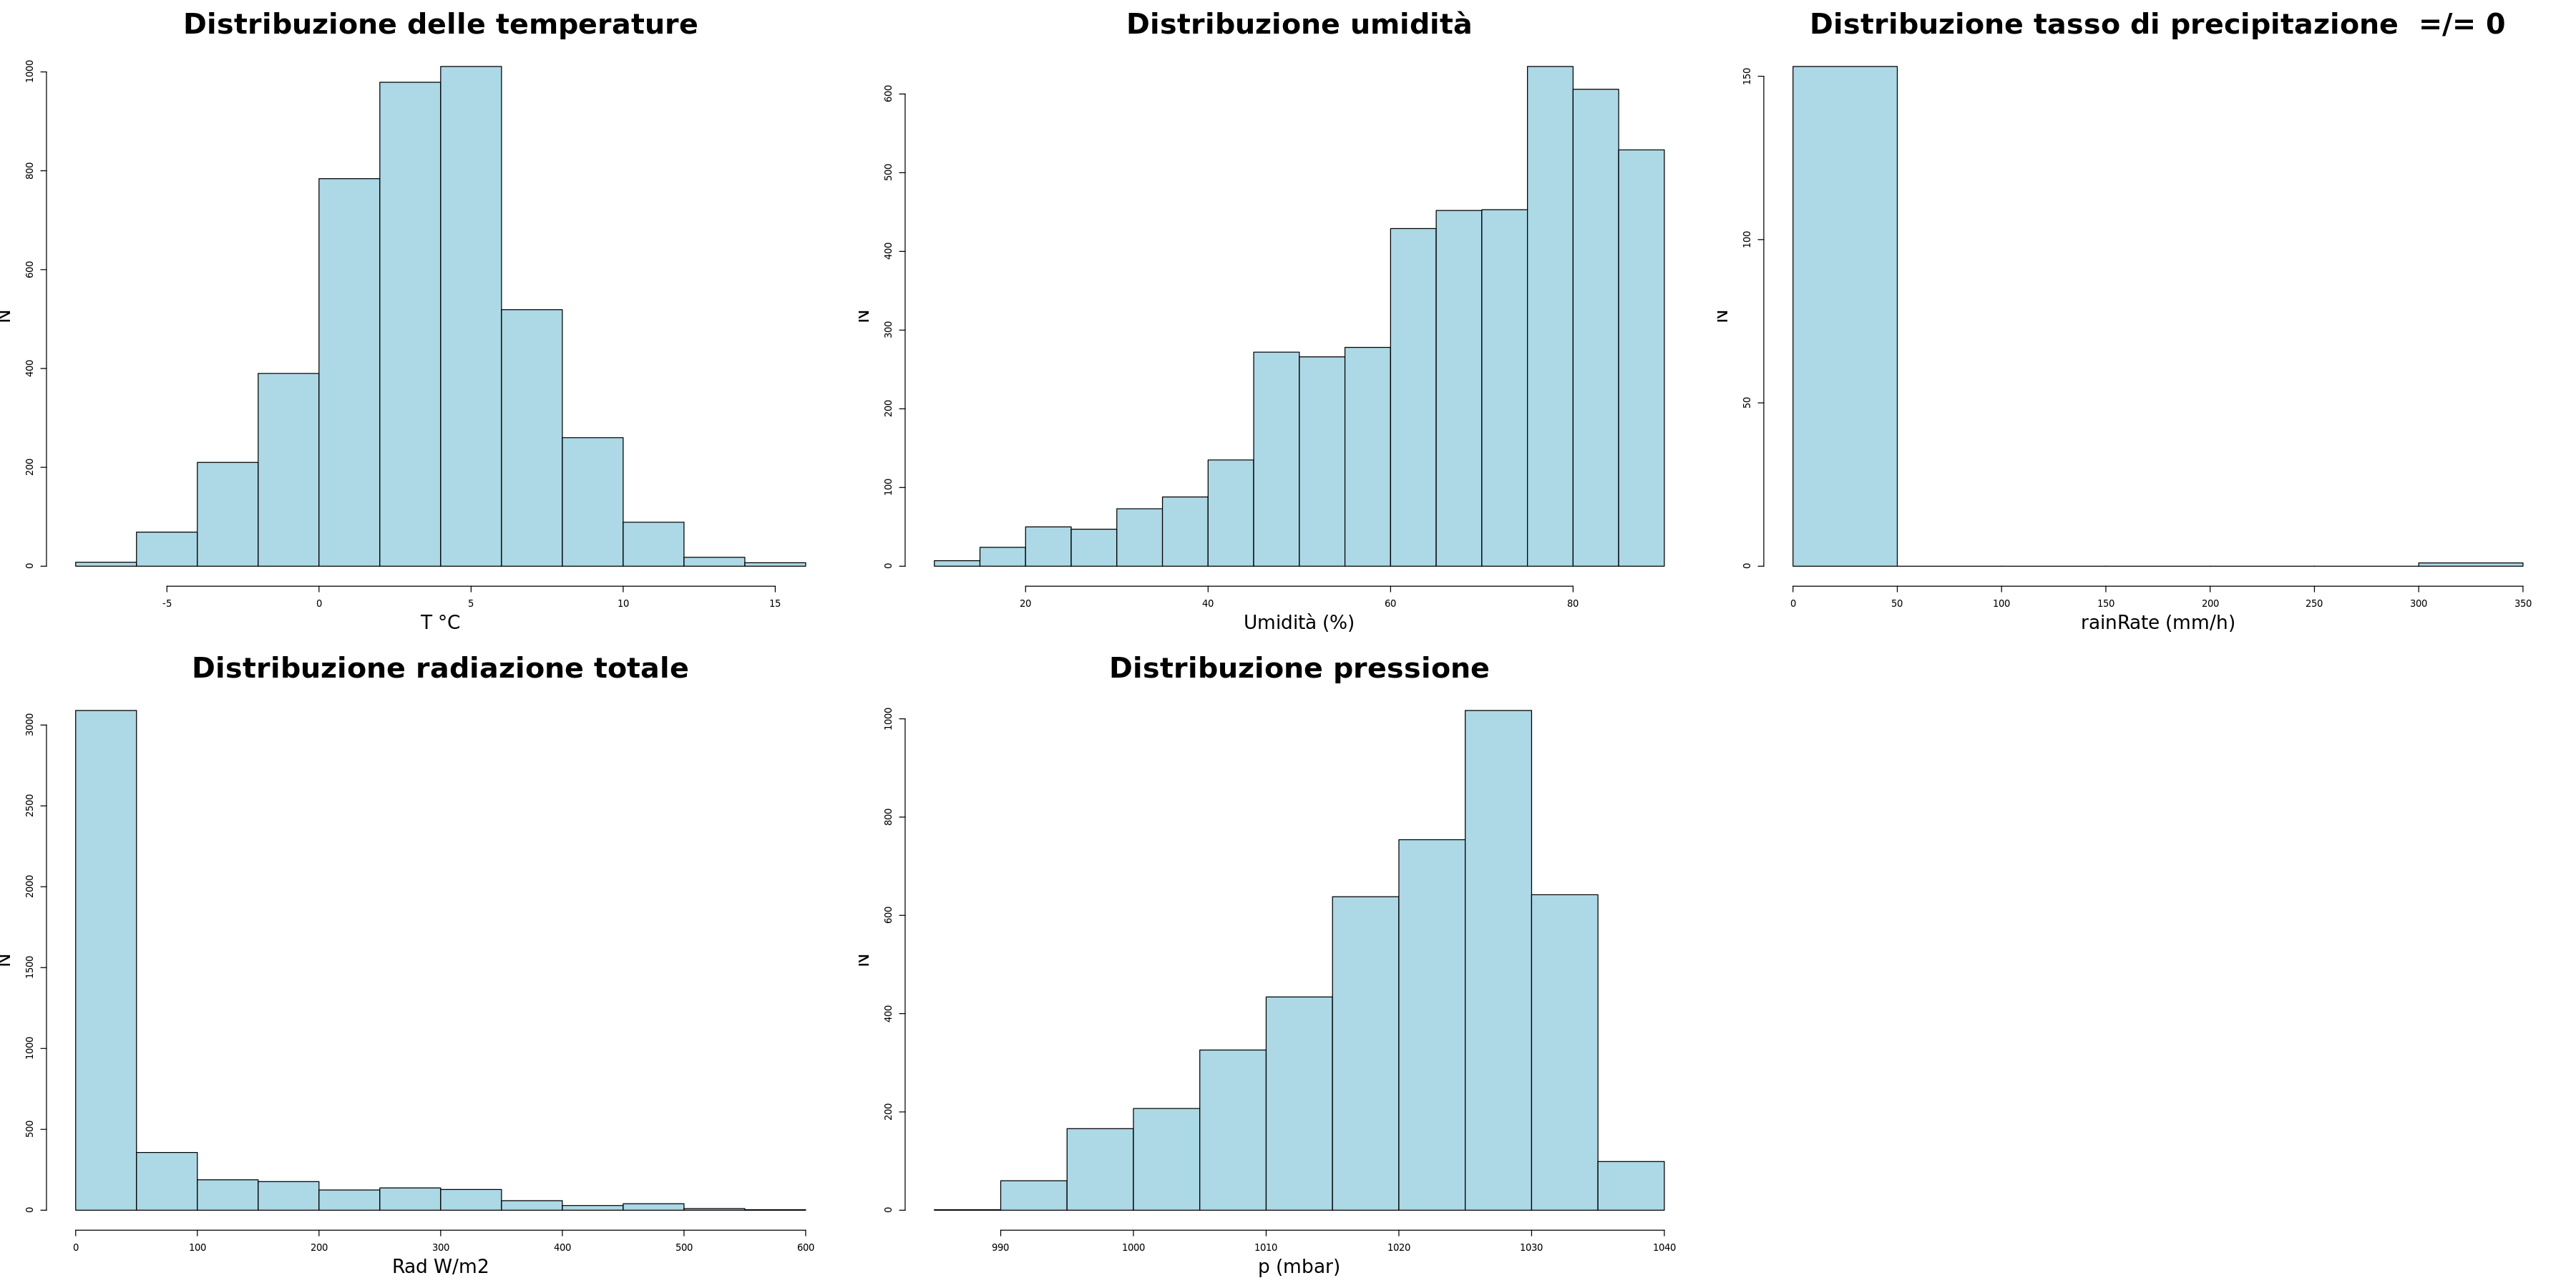

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 15)
par(mfrow = c(2,3))
hist(winter_data_C$outTemp, main = 'Distribuzione delle temperature', ylab = 'N', xlab = 'T °C',
    cex.main = 3, cex.lab = 2, col = 'lightblue')
hist(winter_data_C$outHum, main = 'Distribuzione umidità', ylab = 'N', xlab = 'Umidità (%)',
    cex.main = 3, cex.lab = 2, col = 'lightblue')
hist((winter_data_C %>% filter(rainRate != 0))$rainRate, main = 'Distribuzione tasso di precipitazione  =/= 0', ylab = 'N', xlab = 'rainRate (mm/h)',
    cex.main = 3, cex.lab = 2, col = 'lightblue')
hist(winter_data_C$totRad, main = 'Distribuzione radiazione totale', ylab = 'N', xlab = 'Rad W/m2',
    cex.main = 3, cex.lab = 2, col = 'lightblue')
hist(winter_data_C$Press, main = 'Distribuzione pressione', ylab = 'N', xlab = 'p (mbar)',
    cex.main = 3, cex.lab = 2, col = 'lightblue')

In [ ]:
max(winter_data_C$rainRate)

[1] 303.2

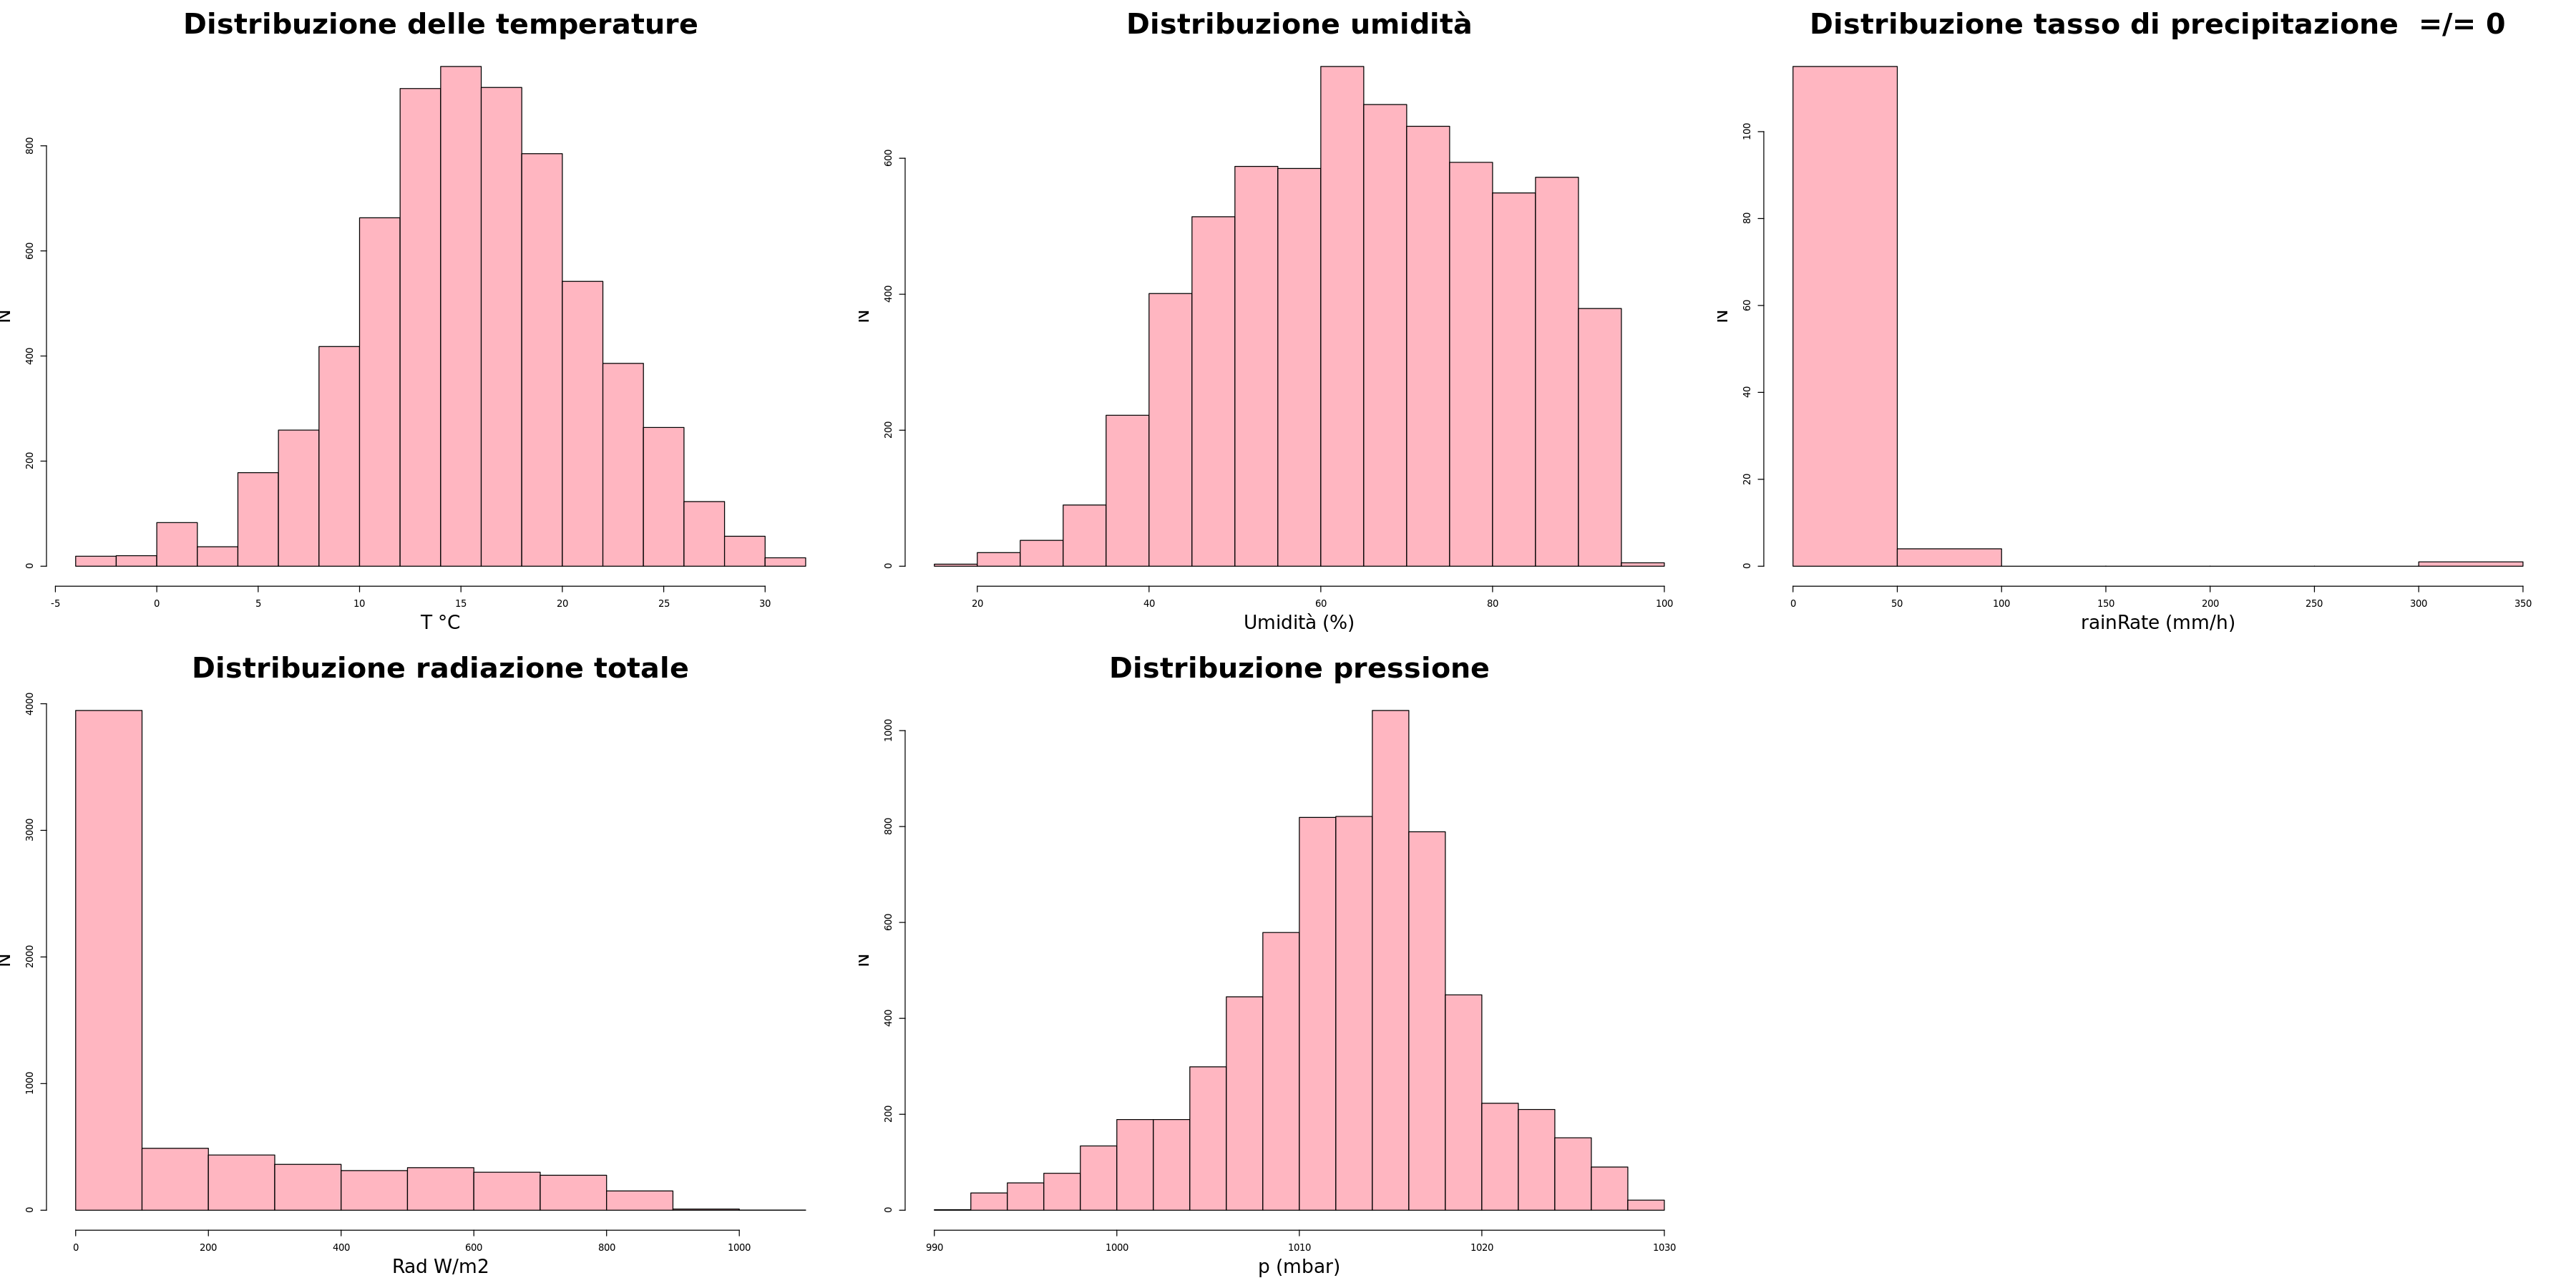

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 15)
par(mfrow = c(2,3))
hist(spring_data_A$outTemp, main = 'Distribuzione delle temperature', ylab = 'N', xlab = 'T °C',
    cex.main = 3, cex.lab = 2, col = 'lightpink')
hist(spring_data_A$outHum, main = 'Distribuzione umidità', ylab = 'N', xlab = 'Umidità (%)',
    cex.main = 3, cex.lab = 2, col = 'lightpink')
hist((spring_data_A %>% filter(rainRate != 0))$rainRate, main = 'Distribuzione tasso di precipitazione  =/= 0', ylab = 'N', xlab = 'rainRate (mm/h)',
    cex.main = 3, cex.lab = 2, col = 'lightpink')
hist(spring_data_A$totRad, main = 'Distribuzione radiazione totale', ylab = 'N', xlab = 'Rad W/m2',
    cex.main = 3, cex.lab = 2, col = 'lightpink')
hist(spring_data_A$Press, main = 'Distribuzione pressione', ylab = 'N', xlab = 'p (mbar)',
    cex.main = 3, cex.lab = 2, col = 'lightpink')

In [ ]:
max(spring_data_A$rainRate)

[1] 311.4

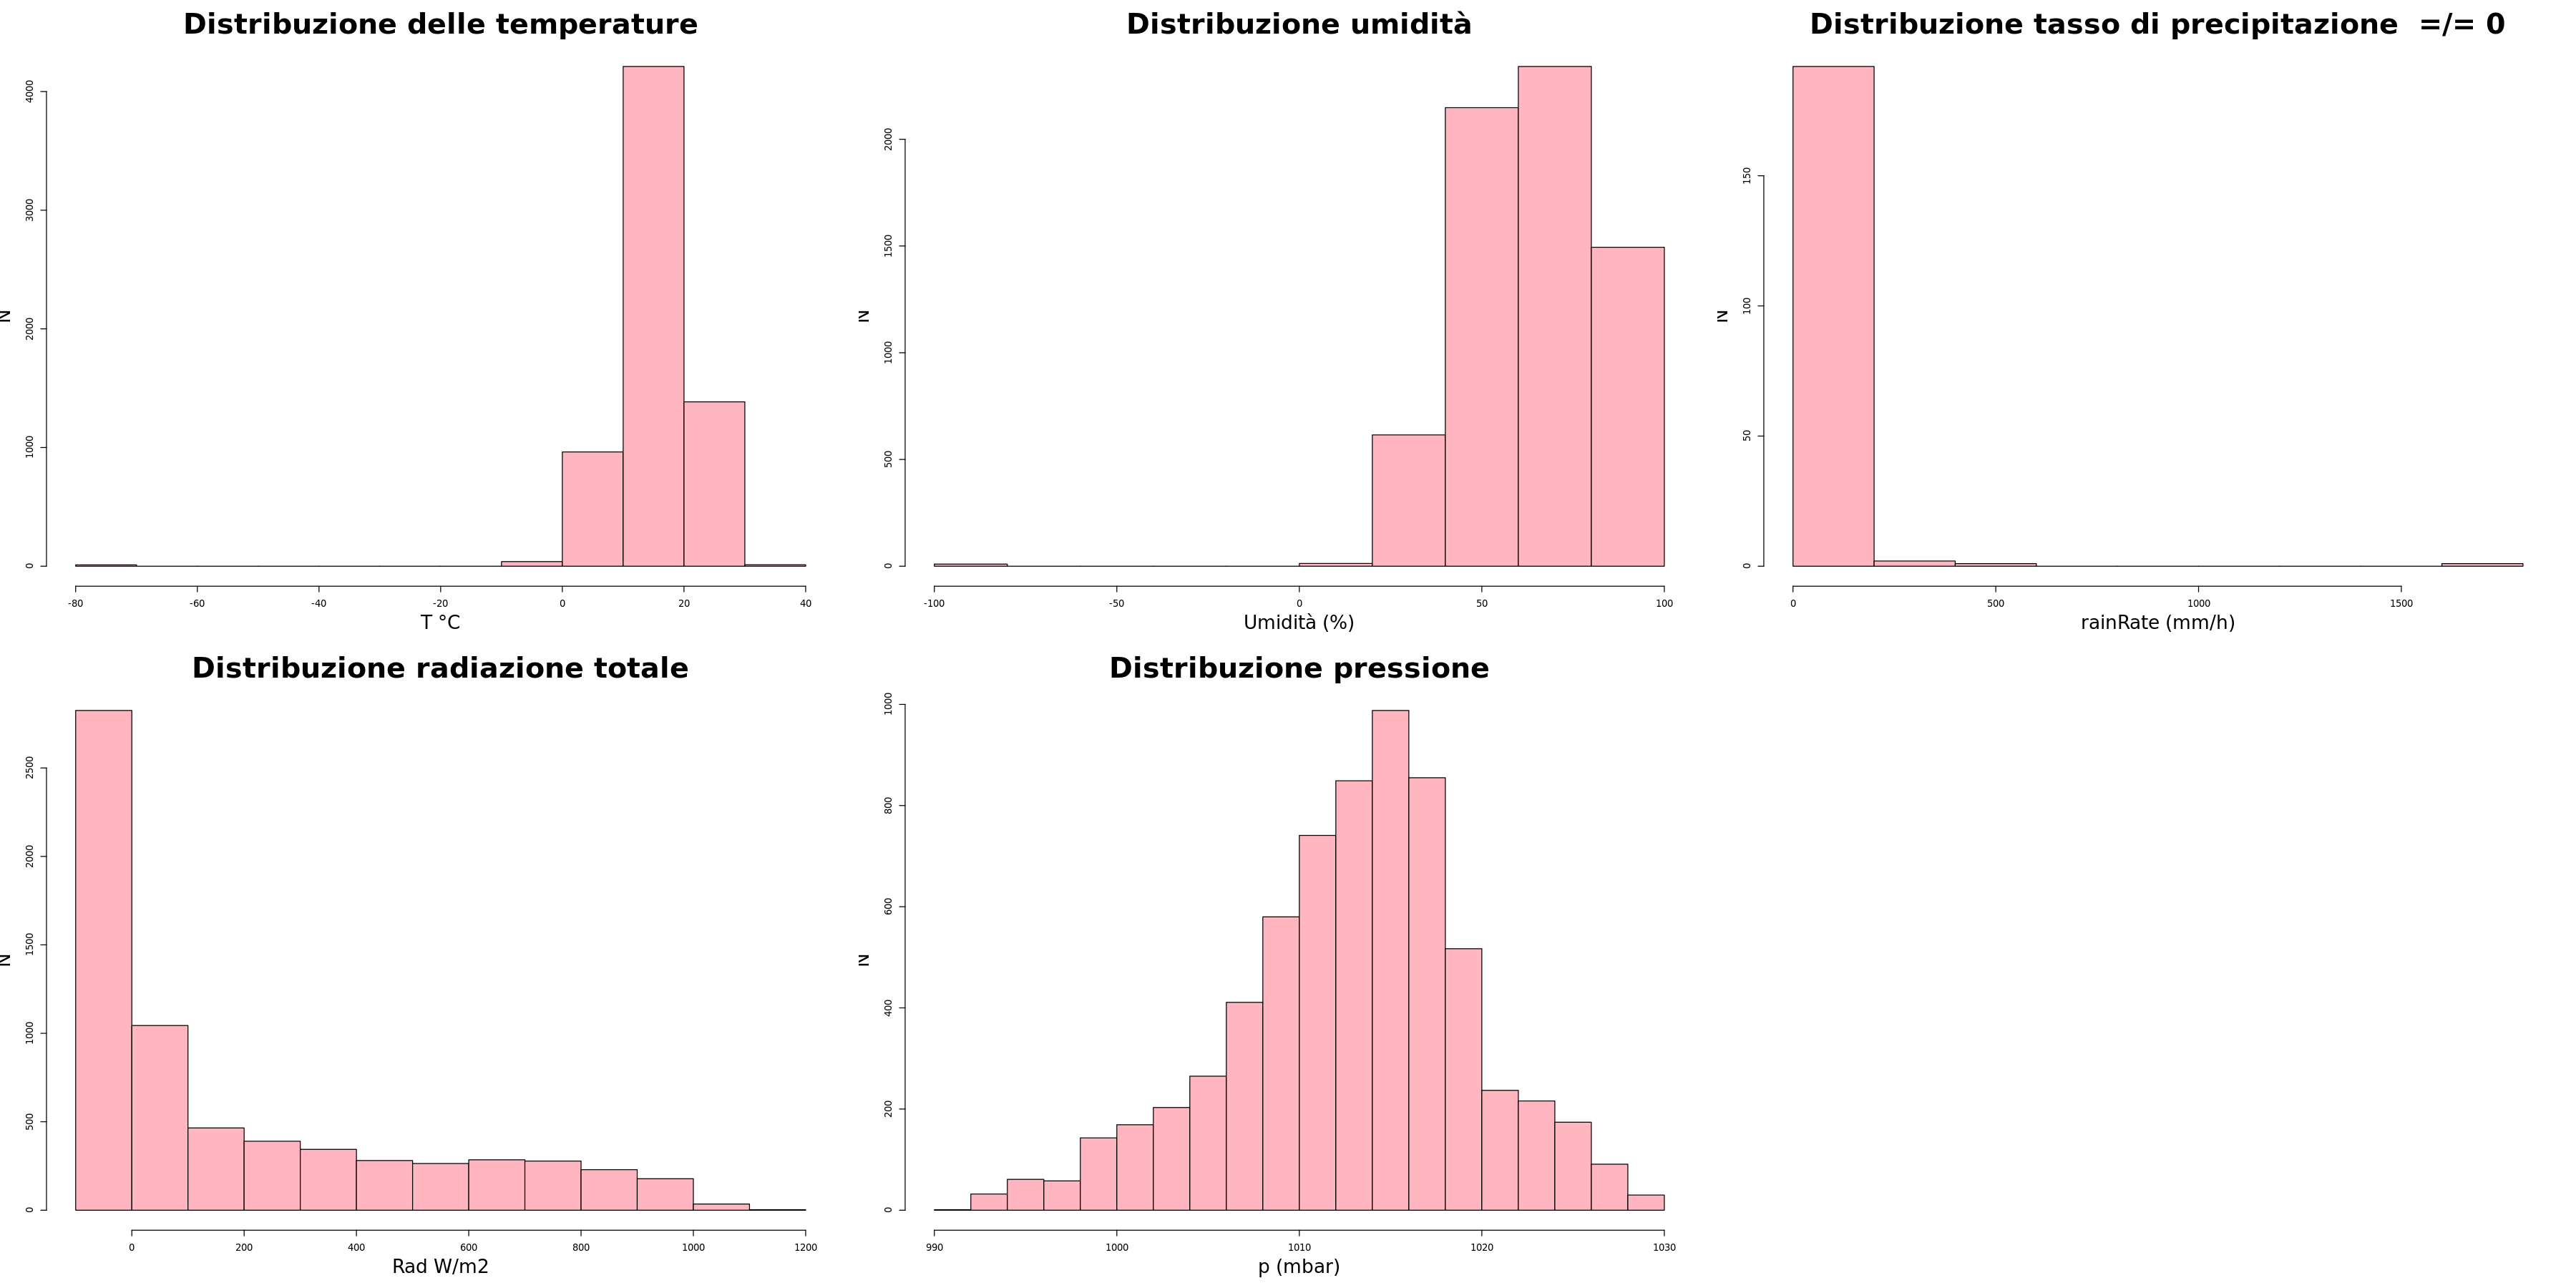

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 15)
par(mfrow = c(2,3))
hist(spring_data_B$outTemp, main = 'Distribuzione delle temperature', ylab = 'N', xlab = 'T °C',
    cex.main = 3, cex.lab = 2, col = 'lightpink')
hist(spring_data_B$outHum, main = 'Distribuzione umidità', ylab = 'N', xlab = 'Umidità (%)',
    cex.main = 3, cex.lab = 2, col = 'lightpink')
hist((spring_data_B %>% filter(rainRate != 0))$rainRate, main = 'Distribuzione tasso di precipitazione  =/= 0', ylab = 'N', xlab = 'rainRate (mm/h)',
    cex.main = 3, cex.lab = 2, col = 'lightpink')
hist(spring_data_B$totRad, main = 'Distribuzione radiazione totale', ylab = 'N', xlab = 'Rad W/m2',
    cex.main = 3, cex.lab = 2, col = 'lightpink')
hist(spring_data_B$Press, main = 'Distribuzione pressione', ylab = 'N', xlab = 'p (mbar)',
    cex.main = 3, cex.lab = 2, col = 'lightpink')

In [ ]:
max(spring_data_B$rainRate)

[1] 1645.8

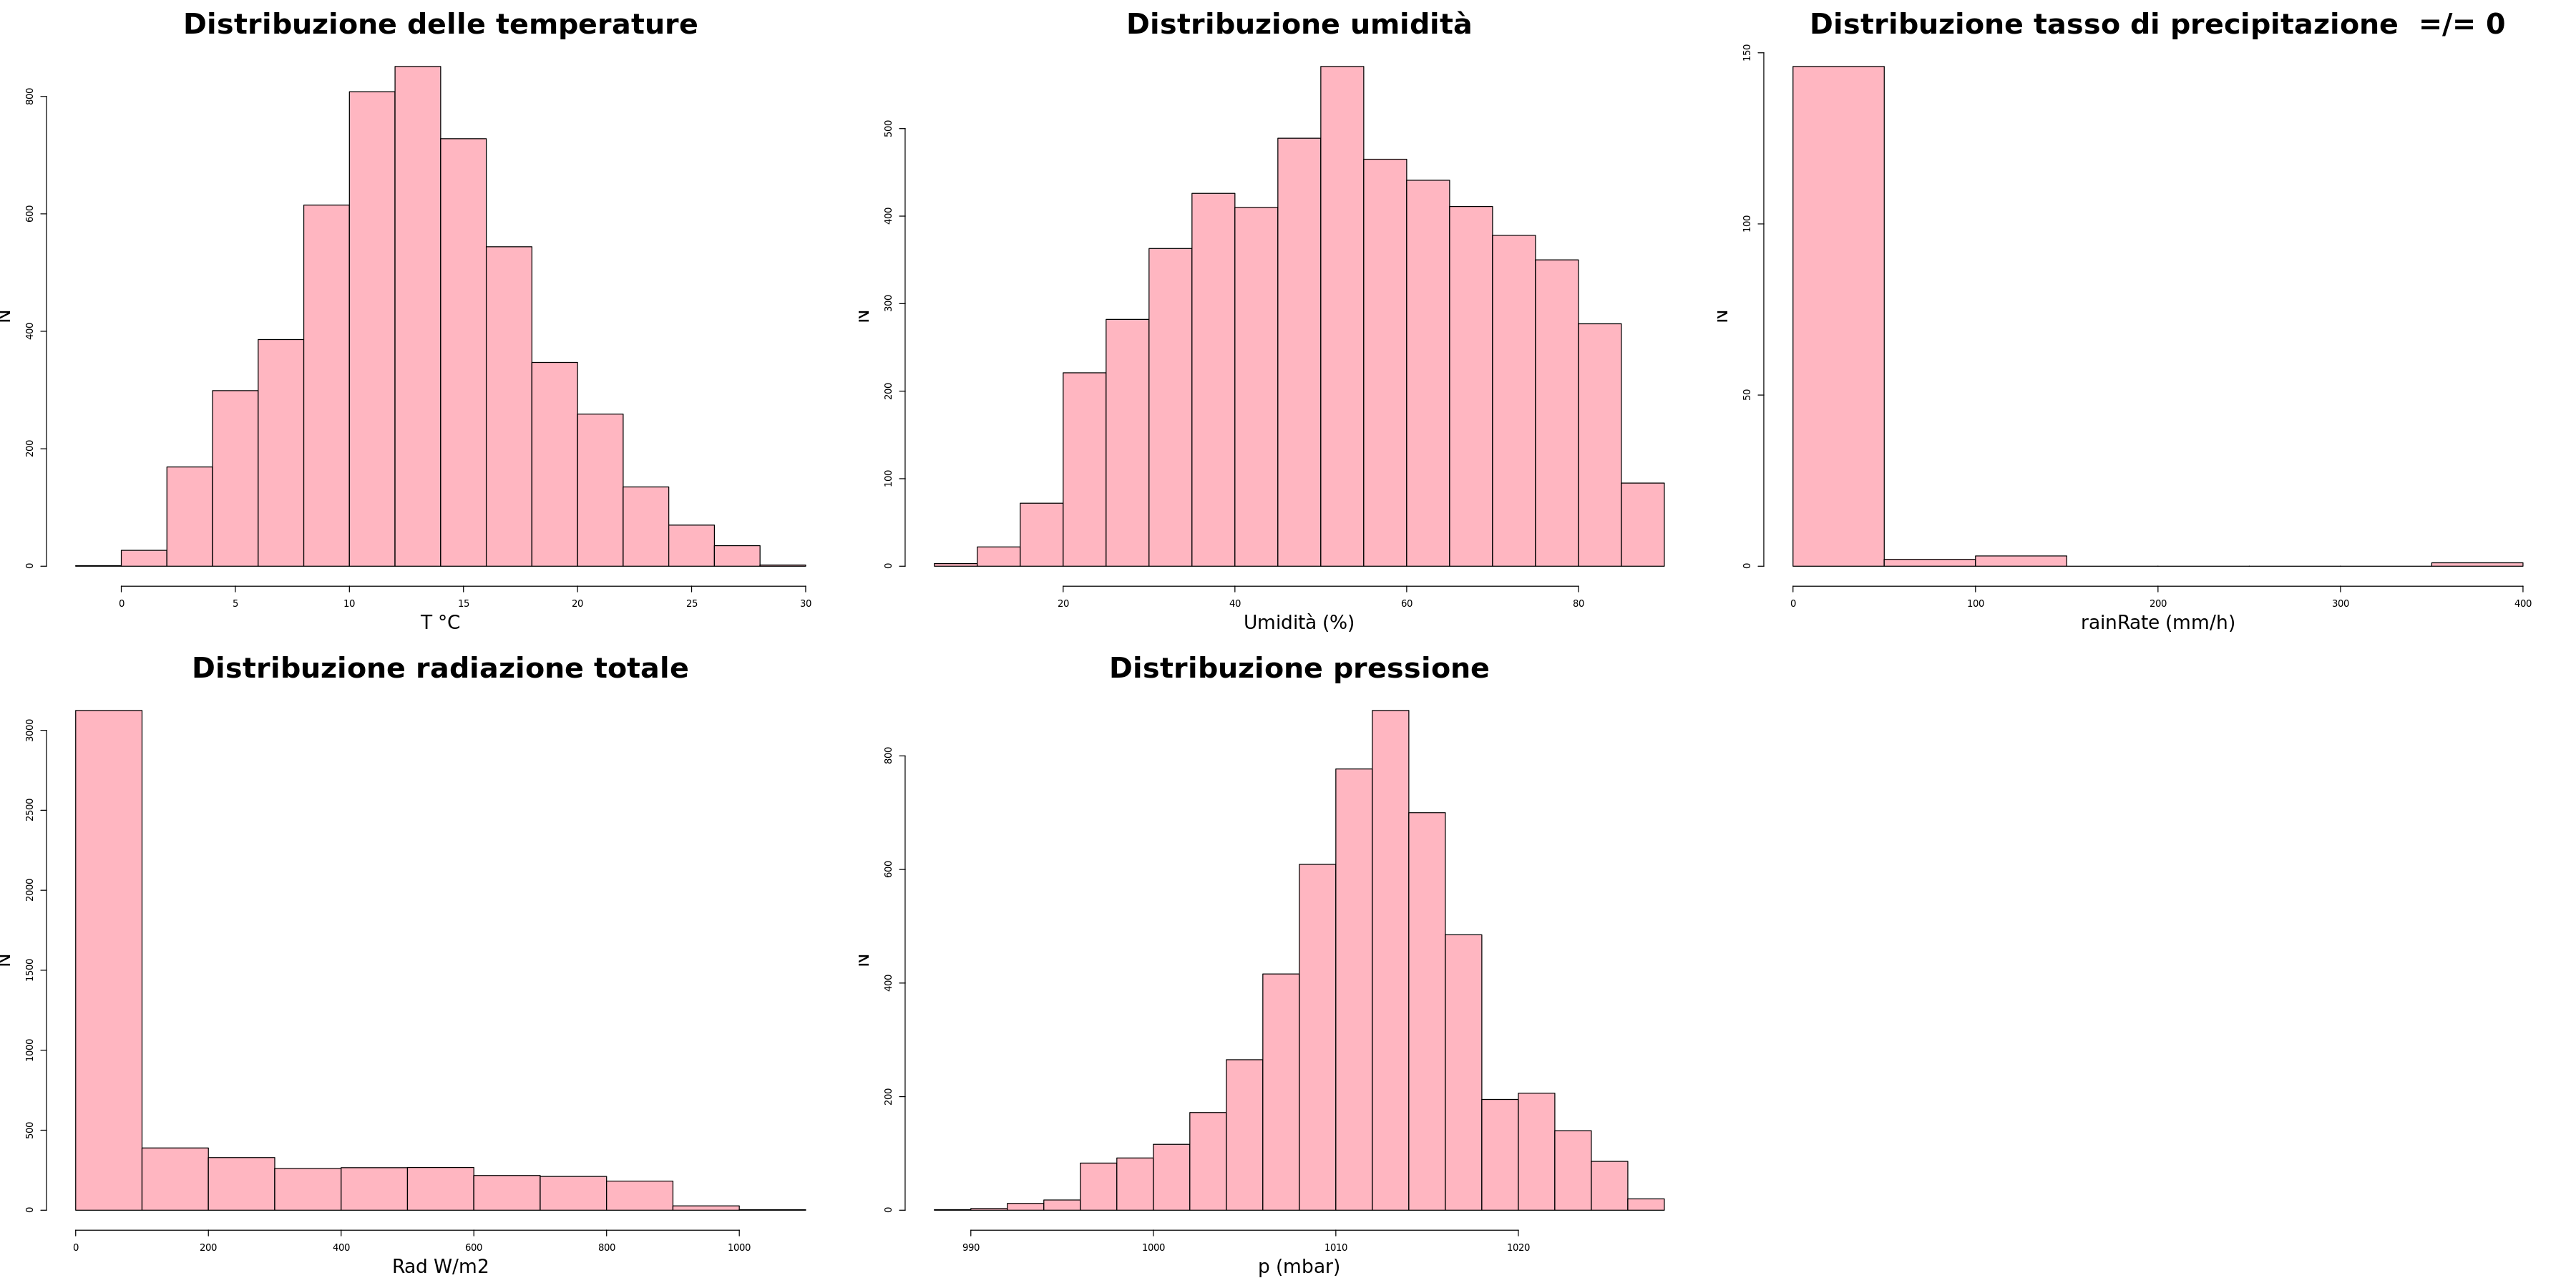

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 15)
par(mfrow = c(2,3))
hist(spring_data_C$outTemp, main = 'Distribuzione delle temperature', ylab = 'N', xlab = 'T °C',
    cex.main = 3, cex.lab = 2, col = 'lightpink')
hist(spring_data_C$outHum, main = 'Distribuzione umidità', ylab = 'N', xlab = 'Umidità (%)',
    cex.main = 3, cex.lab = 2, col = 'lightpink')
hist((spring_data_C %>% filter(rainRate != 0))$rainRate, main = 'Distribuzione tasso di precipitazione  =/= 0', ylab = 'N', xlab = 'rainRate (mm/h)',
    cex.main = 3, cex.lab = 2, col = 'lightpink')
hist(spring_data_C$totRad, main = 'Distribuzione radiazione totale', ylab = 'N', xlab = 'Rad W/m2',
    cex.main = 3, cex.lab = 2, col = 'lightpink')
hist(spring_data_C$Press, main = 'Distribuzione pressione', ylab = 'N', xlab = 'p (mbar)',
    cex.main = 3, cex.lab = 2, col = 'lightpink')

In [ ]:
max(spring_data_C$rainRate)

[1] 384

In [ ]:
spring_data_C %>% filter(Year == 2017 & Month == 5 & Day == 12) 
spring_data_A %>% filter(Year == 2017 & Month == 5 & Day == 12)
giorno_X = spring_data_B %>% filter(Year == 2017 & Month == 5 & Day == 12)


Year Month Day Hour Minutes Press   outTemp outHum rainRate totRad
51515 2017 5     12   0   0       1002.54 12.61   83       0        0   
51517 2017 5     12   1   0       1003.19 12.83   85       0        0   
51519 2017 5     12   2   0       1002.85 13.11   85       0        0   
51521 2017 5     12   3   0       1002.95 13.06   85       0        0   
51523 2017 5     12   4   0       1003.12 13.06   84       0        0   
51525 2017 5     12   5   0       1002.78 12.94   82       0        0   
51527 2017 5     12   6   0       1002.71 12.22   82       0        4   
51529 2017 5     12   7   0       1003.70 12.06   83       0       38   
51531 2017 5     12   8   0       1004.03 12.11   82       0      125   
51533 2017 5     12   9   0       1004.17 12.78   72       0      409   
51535 2017 5     12  10   0       1004.37 15.11   63       0      582   
51537 2017 5     12  11   0       1004.71 17.56   57       0      718   
51539 2017 5     12  12   0       1005.05 17.89   58       0      829   
51541 2017 5     12  13   0       1004.95 19.00   53       0      862   
51543 2017 5     12  14   0       1004.61 20.72   47       0      905   
51545 2017 5     12  15   0       1004.78 20.17   57       0      148   
51547 2017 5     12  16   0       1004.07 18.39   61       0      719   
51549 2017 5     12  17   0       1004.24 20.11   52       0      264   
51551 2017 5     12  18   0       1005.02 14.33   81     384       21   
51553 2017 5     12  19   0       1004.85 14.17   84       0       57   
51555 2017 5     12  20   0       1005.08 14.89   84       0       25   
51557 2017 5     12  21   0       1005.83 15.11   83       0        0   
51559 2017 5     12  22   0       1006.27 15.00   84       0        0   
51561 2017 5     12  23   0       1006.44 14.17   76       0        0

Year Month Day Hour Minutes Press   outTemp outHum rainRate totRad
203629 2017 5     12   0   0       1004.27 15.83   90       0.0      0   
203631 2017 5     12   1   0       1004.95 15.44   91       0.0      0   
203633 2017 5     12   2   0       1004.61 15.50   91       0.0      0   
203635 2017 5     12   3   0       1004.68 15.39   92       0.0      0   
203637 2017 5     12   4   0       1004.81 15.44   91       0.0      0   
203639 2017 5     12   5   0       1004.51 15.50   90       0.0      0   
203641 2017 5     12   6   0       1004.47 14.78   90       0.0      1   
203643 2017 5     12   7   0       1005.42 14.56   90       0.0     32   
203645 2017 5     12   8   0       1005.73 14.78   89       0.0    155   
203647 2017 5     12   9   0       1005.93 16.78   82       0.0    402   
203649 2017 5     12  10   0       1006.07 19.00   75       0.0    568   
203651 2017 5     12  11   0       1006.44 20.83   71       0.0    696   
203653 2017 5     12  12   0       1006.74 21.17   72       0.0    817   
203655 2017 5     12  13   0       1006.64 22.22   69       0.0    839   
203657 2017 5     12  14   0       1006.37 23.28   64       0.0    887   
203659 2017 5     12  15   0       1006.44 23.33   68       0.0    151   
203661 2017 5     12  16   0       1005.73 21.39   76       0.0    702   
203663 2017 5     12  17   0       1005.79 23.33   67       0.0    277   
203665 2017 5     12  18   0       1006.44 17.61   86     311.4     17   
203667 2017 5     12  19   0       1006.27 17.06   89       0.0     51   
203669 2017 5     12  20   0       1006.54 17.56   89       0.0     21   
203671 2017 5     12  21   0       1007.35 17.50   89       0.0      0   
203673 2017 5     12  22   0       1007.76 17.50   89       0.0      0   
203675 2017 5     12  23   0       1007.93 17.17   85       0.0      0

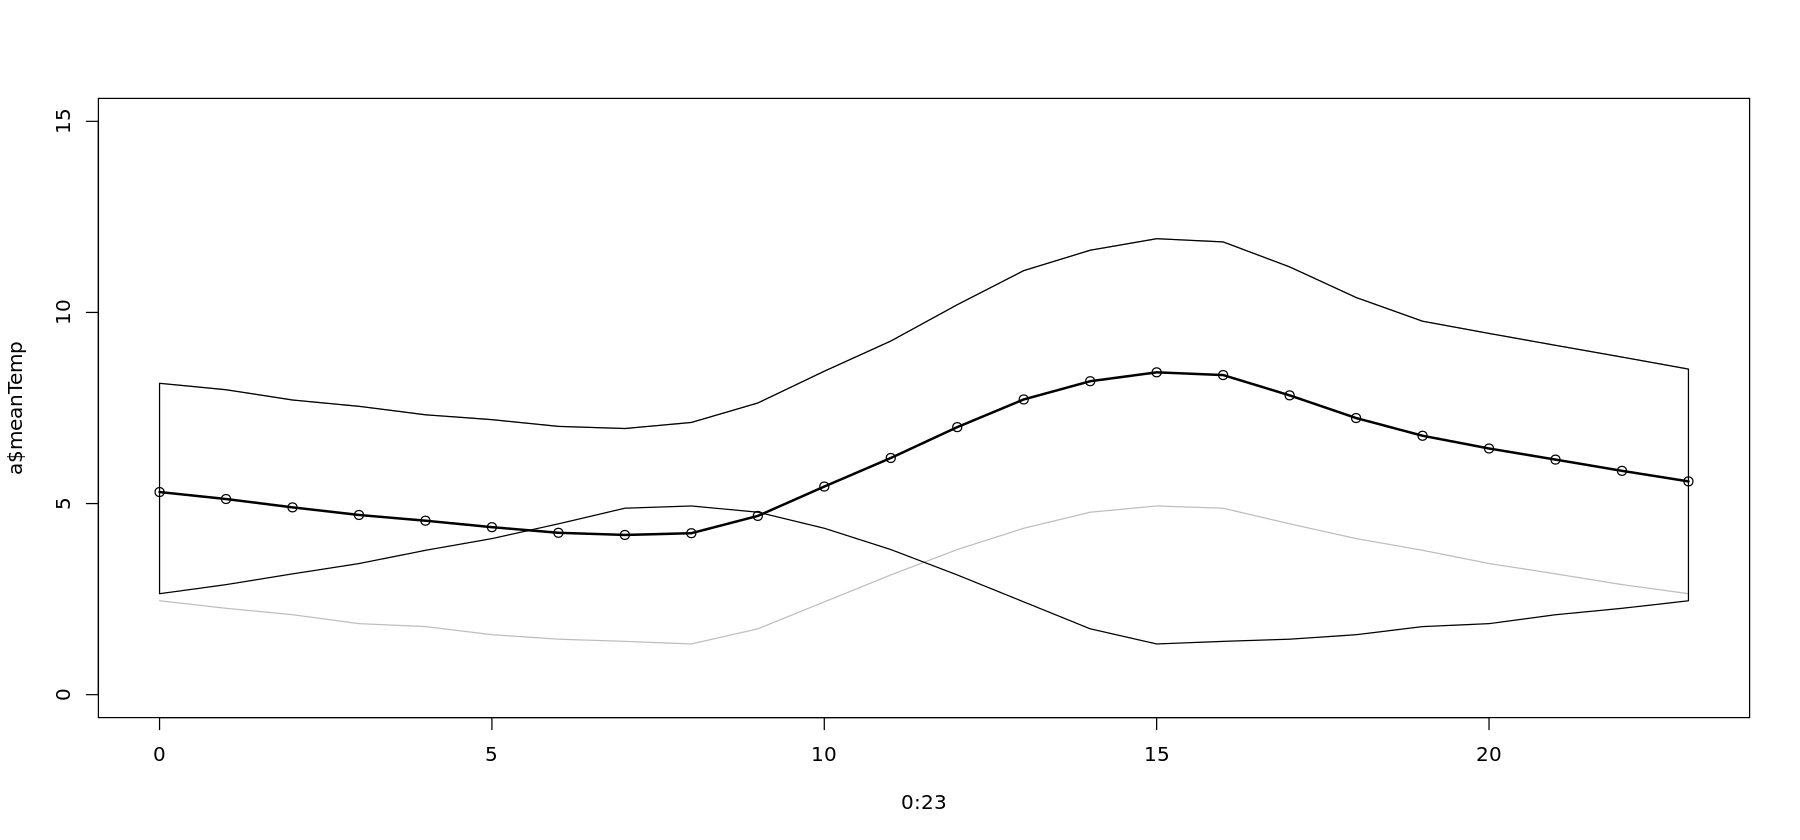

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 7)
a = winter_data_A %>% group_by(Hour) %>% summarise(meanTemp = mean(outTemp), stdTemp = sd(outTemp))

plot(0:23, a$meanTemp, ylim = c(0,15))
lines(0:23, a$meanTemp, lwd=2)
lines(0:23, a$meanTemp + a$stdTemp, col = 'grey')
lines(0:23, a$meanTemp - a$stdTemp, col = 'grey')
polygon(c(0:23,23:0), c(a$meanTemp + a$stdTemp, a$meanTemp - a$stdTemp)) 

In [ ]:
polygon

function (x, y = NULL, density = NULL, angle = 45, border = NULL, 
    col = NA, lty = par("lty"), ..., fillOddEven = FALSE) 
{
    ..debug.hatch <- FALSE
    xy <- xy.coords(x, y, setLab = FALSE)
    if (is.numeric(density) && all(is.na(density) | density < 
        0)) 
        density <- NULL
    if (!is.null(angle) && !is.null(density)) {
        polygon.onehatch <- function(x, y, x0, y0, xd, yd, ..debug.hatch = FALSE, 
            ...) {
            if (..debug.hatch) {
                points(x0, y0)
                arrows(x0, y0, x0 + xd, y0 + yd)
            }
            halfplane <- as.integer(xd * (y - y0) - yd * (x - 
                x0) <= 0)
            cross <- halfplane[-1L] - halfplane[-length(halfplane)]
            does.cross <- cross != 0
            if (!any(does.cross)) 
                return()
            x1 <- x[-length(x)][does.cross]
            y1 <- y[-length(y)][does.cross]
            x2 <- x[-1L][does.cross]
            y2 <- y[-1L][does.cross]
            t <- (((x1 - x0) * (y2 - y1) - (y1 - y0) * (x2 - 
                x1))/(xd * (y2 - y1) - yd * (x2 - x1)))
            o <- order(t)
            tsort <- t[o]
            crossings <- cumsum(cross[does.cross][o])
            if (fillOddEven) 
                crossings <- crossings%%2
            drawline <- crossings != 0
            lx <- x0 + xd * tsort
            ly <- y0 + yd * tsort
            lx1 <- lx[-length(lx)][drawline]
            ly1 <- ly[-length(ly)][drawline]
            lx2 <- lx[-1L][drawline]
            ly2 <- ly[-1L][drawline]
            segments(lx1, ly1, lx2, ly2, ...)
        }
        polygon.fullhatch <- function(x, y, density, angle, ..debug.hatch = FALSE, 
            ...) {
            x <- c(x, x[1L])
            y <- c(y, y[1L])
            angle <- angle%%180
            if (par("xlog") || par("ylog")) {
                warning("cannot hatch with logarithmic scale active")
                return()
            }
            usr <- par("usr")
            pin <- par("pin")
            upi <- c(usr[2L] - usr[1L], usr[4L] - usr[3L])/pin
            if (upi[1L] < 0) 
                angle <- 180 - angle
            if (upi[2L] < 0) 
                angle <- 180 - angle
            upi <- abs(upi)
            xd <- cos(angle/180 * pi) * upi[1L]
            yd <- sin(angle/180 * pi) * upi[2L]
            if (angle < 45 || angle > 135) {
                if (angle < 45) {
                  first.x <- max(x)
                  last.x <- min(x)
                }
                else {
                  first.x <- min(x)
                  last.x <- max(x)
                }
                y.shift <- upi[2L]/density/abs(cos(angle/180 * 
                  pi))
                x0 <- 0
                y0 <- floor((min(y) - first.x * yd/xd)/y.shift) * 
                  y.shift
                y.end <- max(y) - last.x * yd/xd
                while (y0 < y.end) {
                  polygon.onehatch(x, y, x0, y0, xd, yd, ..debug.hatch = ..debug.hatch, 
                    ...)
                  y0 <- y0 + y.shift
                }
            }
            else {
                if (angle < 90) {
                  first.y <- max(y)
                  last.y <- min(y)
                }
                else {
                  first.y <- min(y)
                  last.y <- max(y)
                }
                x.shift <- upi[1L]/density/abs(sin(angle/180 * 
                  pi))
                x0 <- floor((min(x) - first.y * xd/yd)/x.shift) * 
                  x.shift
                y0 <- 0
                x.end <- max(x) - last.y * xd/yd
                while (x0 < x.end) {
                  polygon.onehatch(x, y, x0, y0, xd, yd, ..debug.hatch = ..debug.hatch, 
                    ...)
                  x0 <- x0 + x.shift
                }
            }
        }
        if (missing(col) || is.null(col)) {
            col <- par("fg")
        }
        else if (any(is.na(col))) {
            col[is.na(col)] <- par("fg")
        

### Esclusione dati 12/05/2017

In [ ]:
commonAC_S <- dplyr::filter(commonAC_S, (commonAC_S$Year != 2017) & (commonAC_S$Month != 5) & (commonAC_S$Day != 12) )
commonBC_S <- dplyr::filter(commonBC_S, (commonBC_S$Year != 2017) & (commonBC_S$Month != 5) & (commonBC_S$Day != 12) )
spring_data_A = dplyr::filter(spring_data_A, (spring_data_A$Year != 2017) & (spring_data_A$Month != 5) & (spring_data_A$Day != 12) )
spring_data_B = dplyr::filter(spring_data_B, (spring_data_B$Year != 2017) & (spring_data_B$Month != 5) & (spring_data_B$Day != 12) )


## Correlazione tra strumenti

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 10)
pdf('Plots/corr_temp_stazioni_inv.pdf', width = 30, height = 10)
par(mfrow = c(1,3), mar =c(5.1,8,4.1,4.1))

plot(winter_data_A$outTemp, winter_data_B$outTemp, main = 'Correlazione invernale tra A e B',
        ylab = 'Temperatura B (°C)', xlab = 'Temperatura A (°C)', cex.main = 4, cex.lab = 2,
        cex.axis = 1.5)
lines(seq(-15,30,1), seq(-15,30,1), col = 'darkgrey', lwd=2)
reg = lm(winter_data_B$outTemp ~ winter_data_A$outTemp)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
abline(reg, col = 'red', lwd=2 )
text(12,-3, paste0('y = ', slope, 'x + ', intercept), cex = 3, col='red')


plot(commonAC_W$outTempA, commonAC_W$outTempC, main = 'Correlazione invernale tra A e C',
        ylab = 'Temperatura C (°C)', xlab = 'Temperatura A (°C)', cex.main = 4, cex.lab = 2,
        cex.axis = 1.5)
lines(seq(-15,30,1), seq(-15,30,1), col = 'darkgrey', lwd=2)
reg = lm(commonAC_W$outTempC ~ commonAC_W$outTempA)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
text(10,-5, paste0('y = ', slope, 'x ', intercept), cex = 3, col='red')
abline(reg, col = 'red', lwd=2 )


plot(commonBC_W$outTempB, commonBC_W$outTempC, main = 'Correlazione invernale tra B e C',
        ylab = 'Temperatura C (°C)', xlab = 'Temperatura B (°C)', cex.main = 4, cex.lab = 2,
        cex.axis = 1.5)
lines(seq(-15,30,1), seq(-15,30,1), col = 'darkgrey', lwd=2)
reg = lm(commonBC_W$outTempC ~ commonBC_W$outTempB)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
text(10,-5, paste0('y = ', slope, 'x  ', intercept), cex = 3, col='red')

abline(reg, col = 'red', lwd=2 )

dev.off()

png 
  2

In [ ]:
# buona correlazione lineare ma offset nelle misure di -2.4 gradi circa
# per la C rispetto a A e B

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 10)
pdf('Plots/corr_temp_stazioni_prim.pdf', width = 30, height = 10)
par(mfrow = c(1,3), mar =c(5.1,8,4.1,4.1))

plot(spring_data_A$outTemp, spring_data_B$outTemp, main = 'Correlazione primaverile tra A e B',
        ylab = 'Temperatura B (°C)', xlab = 'Temperatura A (°C)', cex.main = 4, cex.lab = 2,
        cex.axis = 1.5)
lines(seq(-15,30,1), seq(-15,30,1), col = 'darkgrey', lwd=2)
reg = lm(spring_data_B$outTemp ~ spring_data_A$outTemp)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
abline(reg, col = 'red', lwd=2 )
text(12,-1, paste0('y = ', slope, 'x + ', intercept), cex = 3, col='red')


plot(commonAC_S$outTempA, commonAC_S$outTempC, main = 'Correlazione primaverile tra A e C',
        ylab = 'Temperatura C (°C)', xlab = 'Temperatura A (°C)', cex.main = 4, cex.lab = 2,
        cex.axis = 1.5)
lines(seq(-15,30,1), seq(-15,30,1), col = 'darkgrey', lwd=2)
reg = lm(commonAC_S$outTempC ~ commonAC_S$outTempA)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
text(15,0, paste0('y = ', slope, 'x ', intercept), cex = 3, col='red')
abline(reg, col = 'red', lwd=2 )

plot(commonBC_S$outTempB, commonBC_S$outTempC, main = 'Correlazione primaverile tra B e C',
        ylab = 'Temperatura C (°C)', xlab = 'Temperatura B (°C)', cex.main = 4, cex.lab = 2,
        cex.axis = 1.5)
lines(seq(-15,30,1), seq(-15,30,1), col = 'darkgrey', lwd=2)
reg = lm(commonBC_S$outTempC ~ commonBC_S$outTempB)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
text(15,0, paste0('y = ', slope, 'x ', intercept), cex = 3, col='red')
abline(reg, col = 'red', lwd=2 )

dev.off()

png 
  2

In [ ]:
# anche qua! very very nice!

### Correlazione umidità



In [ ]:
options(repr.plot.width = 30, repr.plot.height = 10)
pdf('Plots/corr_hum_stazioni_inv.pdf', width = 30, height = 10)
par(mfrow = c(1,3), mar = c(5,8,4.1,4.1))

plot(winter_data_A$outHum, winter_data_B$outHum, main = 'Correlazione invernale tra A e B',
        ylab = 'Umidità relativa B (%)', xlab = 'Umidità relativa A (%)', cex.main = 4, cex.lab = 2)
lines(seq(0,100,1), seq(0,100,1), col = 'darkgrey', lwd=2)
reg = lm(winter_data_B$outHum ~ winter_data_A$outHum)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
text(80,40, paste0('y = ', slope, 'x ', intercept), cex = 3, col='red')
abline(reg, col = 'red', lwd=2 )

plot(commonAC_W$outHumA, commonAC_W$outHumC, main = 'Correlazione invernale tra A e C',
        ylab = 'Umidità relativa C (%)', xlab = 'Umidità relativa A (%)', cex.main = 4, cex.lab = 2)
lines(seq(0,100,1), seq(0,100,1), col = 'darkgrey', lwd=2)
reg = lm(commonAC_W$outHumC ~ commonAC_W$outHumA)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
text(80,30, paste0('y = ', slope, 'x ', intercept), cex = 3, col='red')
abline(reg, col = 'red', lwd=2 )


plot(commonBC_W$outHumB, commonBC_W$outHumC, main = 'Correlazione invernale tra B e C',
        ylab = 'Umidità relativa C (%)', xlab = 'Umidità relativa B (%)', cex.main = 4, cex.lab = 2)
lines(seq(0,100,1), seq(0,100,1), col = 'darkgrey', lwd=2)
reg = lm(commonBC_W$outHumC ~ commonBC_W$outHumB)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
text(80,30, paste0('y = ', slope, 'x  ', intercept), cex = 3, col='red')

abline(reg, col = 'red', lwd=2 )

dev.off()

png 
  2

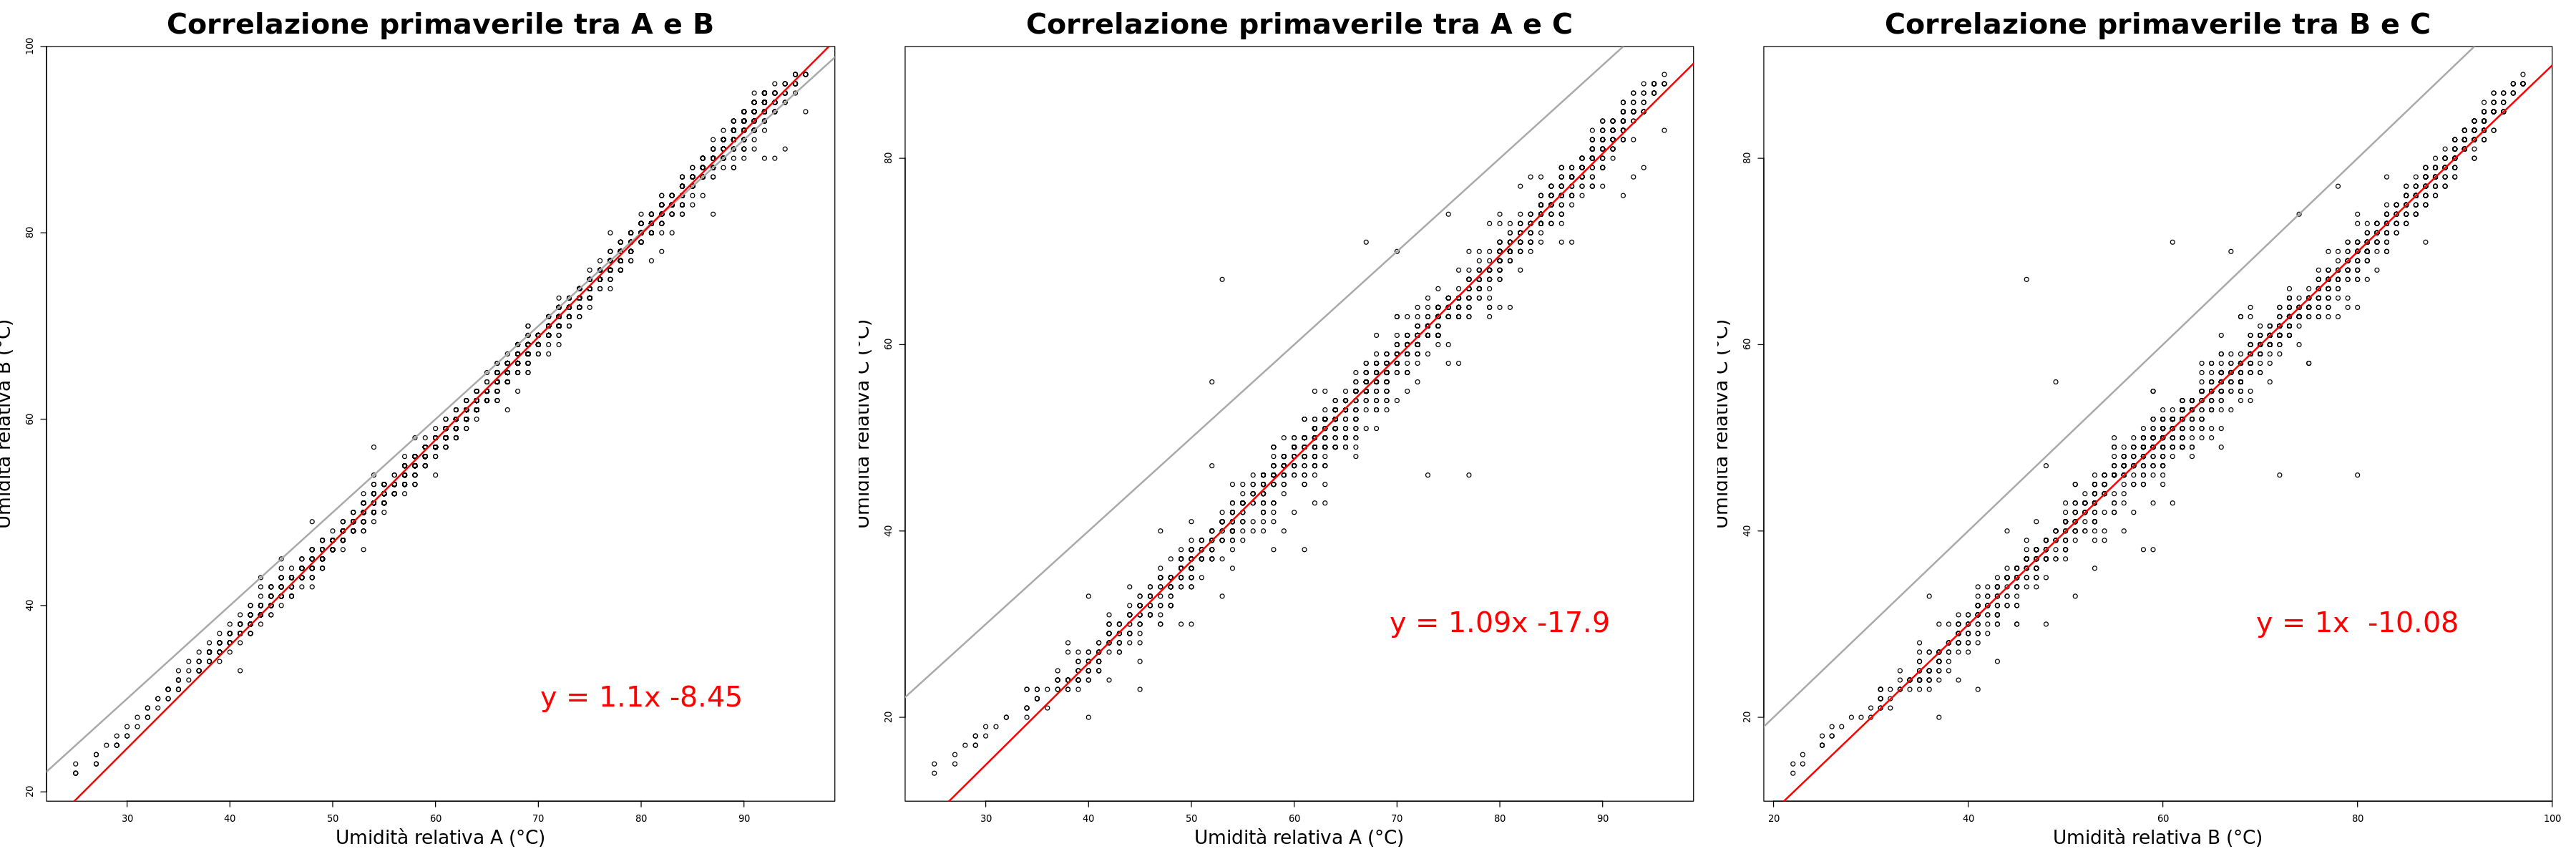

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 10)
#pdf('Plots/provaRH.pdf', width = 30, height = 10)
par(mfrow = c(1,3))

plot(spring_data_A$outHum, spring_data_B$outHum, main = 'Correlazione primaverile tra A e B',
        ylab = 'Umidità relativa B (°C)', xlab = 'Umidità relativa A (°C)', cex.main = 3, cex.lab = 2)
lines(seq(0,100,1), seq(0,100,1), col = 'darkgrey', lwd=2)
reg = lm(spring_data_B$outHum ~ spring_data_A$outHum)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
text(80,30, paste0('y = ', slope, 'x ', intercept), cex = 3, col='red')
abline(reg, col = 'red', lwd=2 )

plot(commonAC_S$outHumA, commonAC_S$outHumC, main = 'Correlazione primaverile tra A e C',
        ylab = 'Umidità relativa C (°C)', xlab = 'Umidità relativa A (°C)', cex.main = 3, cex.lab = 2)
lines(seq(0,100,1), seq(0,100,1), col = 'darkgrey', lwd=2)
reg = lm(commonAC_S$outHumC ~ commonAC_S$outHumA)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
text(80,30, paste0('y = ', slope, 'x ', intercept), cex = 3, col='red')
abline(reg, col = 'red', lwd=2 )


plot(commonBC_S$outHumB, commonBC_S$outHumC, main = 'Correlazione primaverile tra B e C',
        ylab = 'Umidità relativa C (°C)', xlab = 'Umidità relativa B (°C)', cex.main = 3, cex.lab = 2)
lines(seq(0,100,1), seq(0,100,1), col = 'darkgrey', lwd=2)
reg = lm(commonBC_S$outHumC ~ commonBC_S$outHumB)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
text(80,30, paste0('y = ', slope, 'x  ', intercept), cex = 3, col='red')

abline(reg, col = 'red', lwd=2 )

#dev.off()

### T vs RH

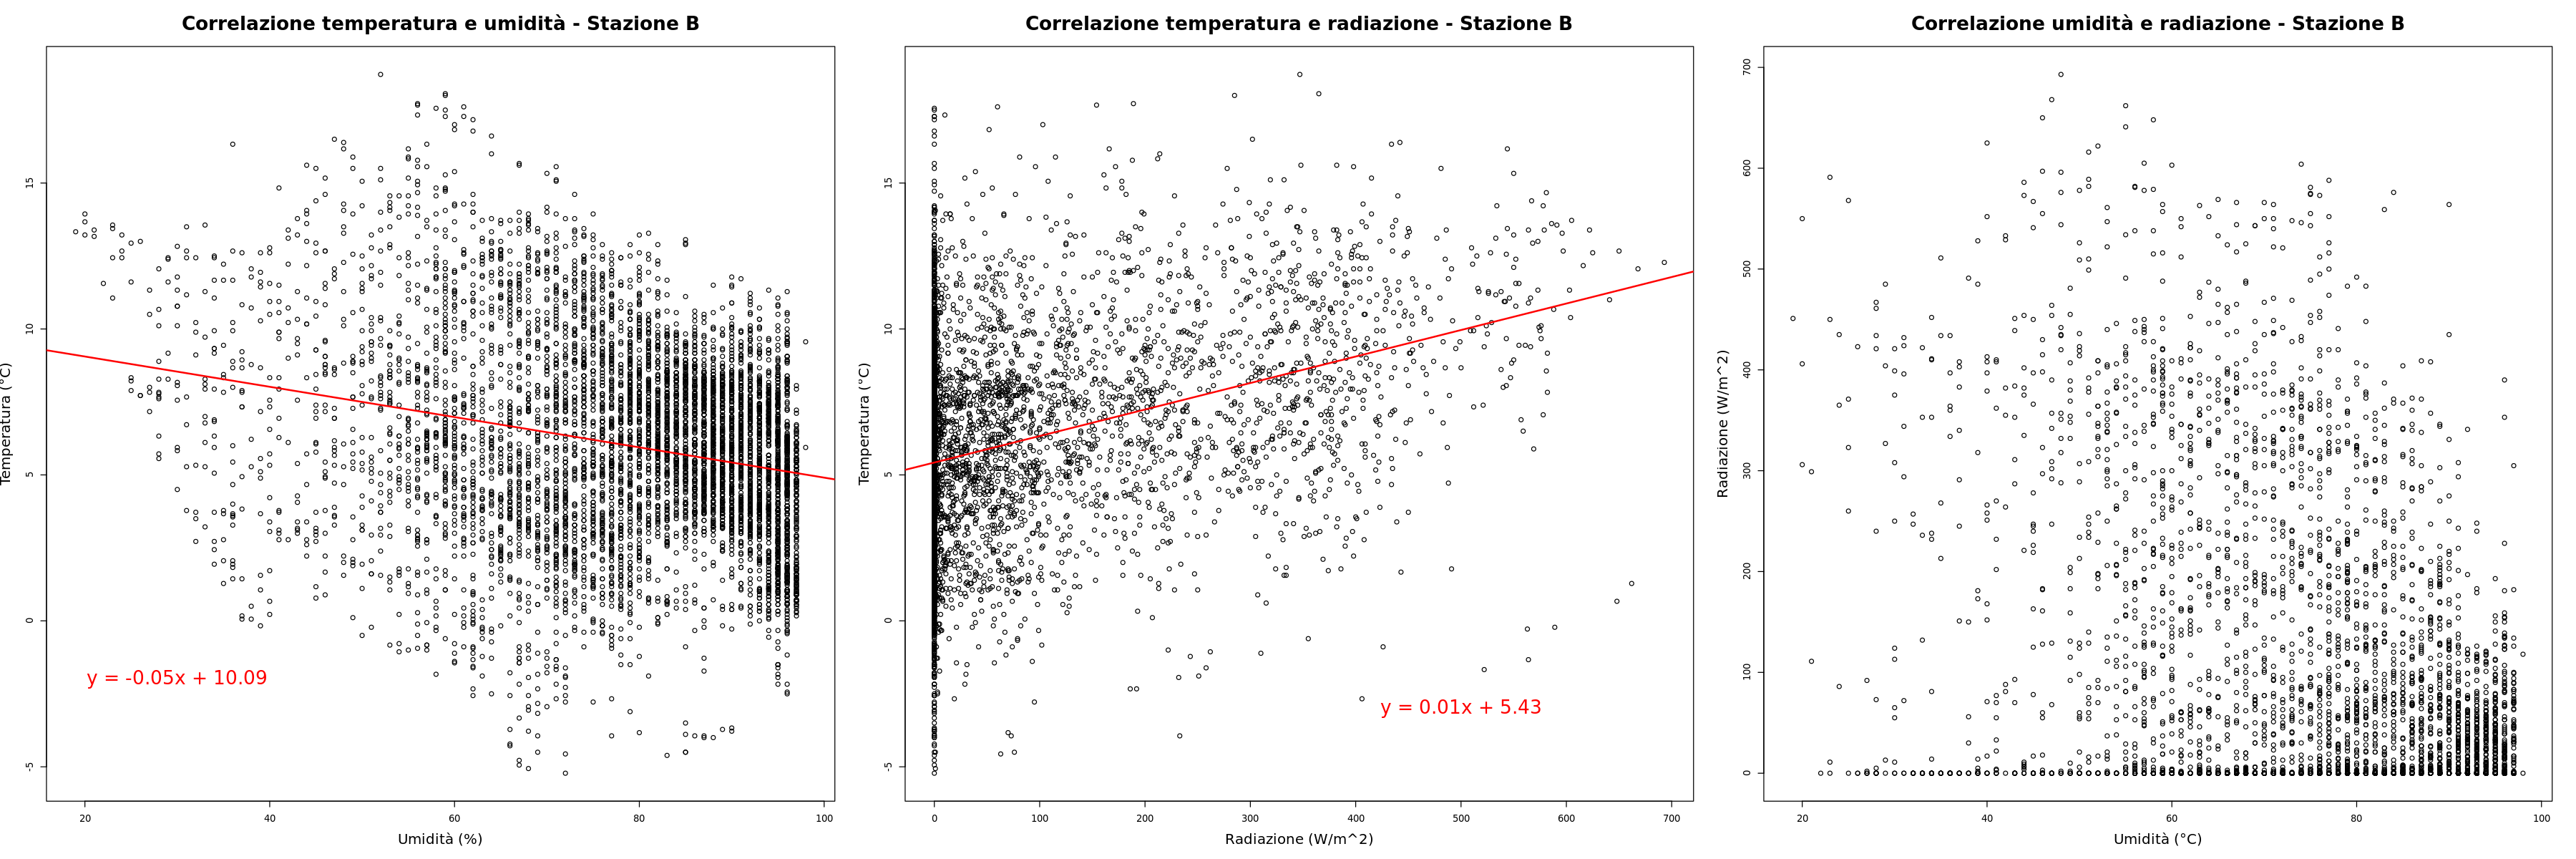

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 10)
#pdf('Plots/corrscalari1.pdf', width = 30, height = 10)
par(mfrow = c(1,3))

plot(winter_data_B$outHum, winter_data_B$outTemp, main = 'Correlazione temperatura e umidità - Stazione B',
        ylab = 'Temperatura (°C)', xlab = 'Umidità (%)', cex.main = 2, cex.lab = 1.5)
#lines(seq(0,100), seq(0,100,1), col = 'darkgrey', lwd=2)
reg = lm(winter_data_B$outTemp ~ winter_data_B$outHum)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
text(30,-2, paste0('y = ', slope, 'x + ', intercept), cex = 2, col='red')
abline(reg, col = 'red', lwd=2 )

plot(winter_data_B$totRad, winter_data_B$outTemp, main = 'Correlazione temperatura e radiazione - Stazione B',
        ylab = 'Temperatura (°C)', xlab = 'Radiazione (W/m^2)', cex.main = 2, cex.lab = 1.5)
reg = lm(winter_data_B$outTemp ~ winter_data_B$totRad)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
text(500,-3, paste0('y = ', slope, 'x + ', intercept), cex = 2, col='red')
abline(reg, col = 'red', lwd=2 )


plot(winter_data_B$outHum, winter_data_B$totRad, main = 'Correlazione umidità e radiazione - Stazione B',
        xlab = 'Umidità (°C)', ylab = 'Radiazione (W/m^2)', cex.main = 2, cex.lab = 1.5)
#dev.off()

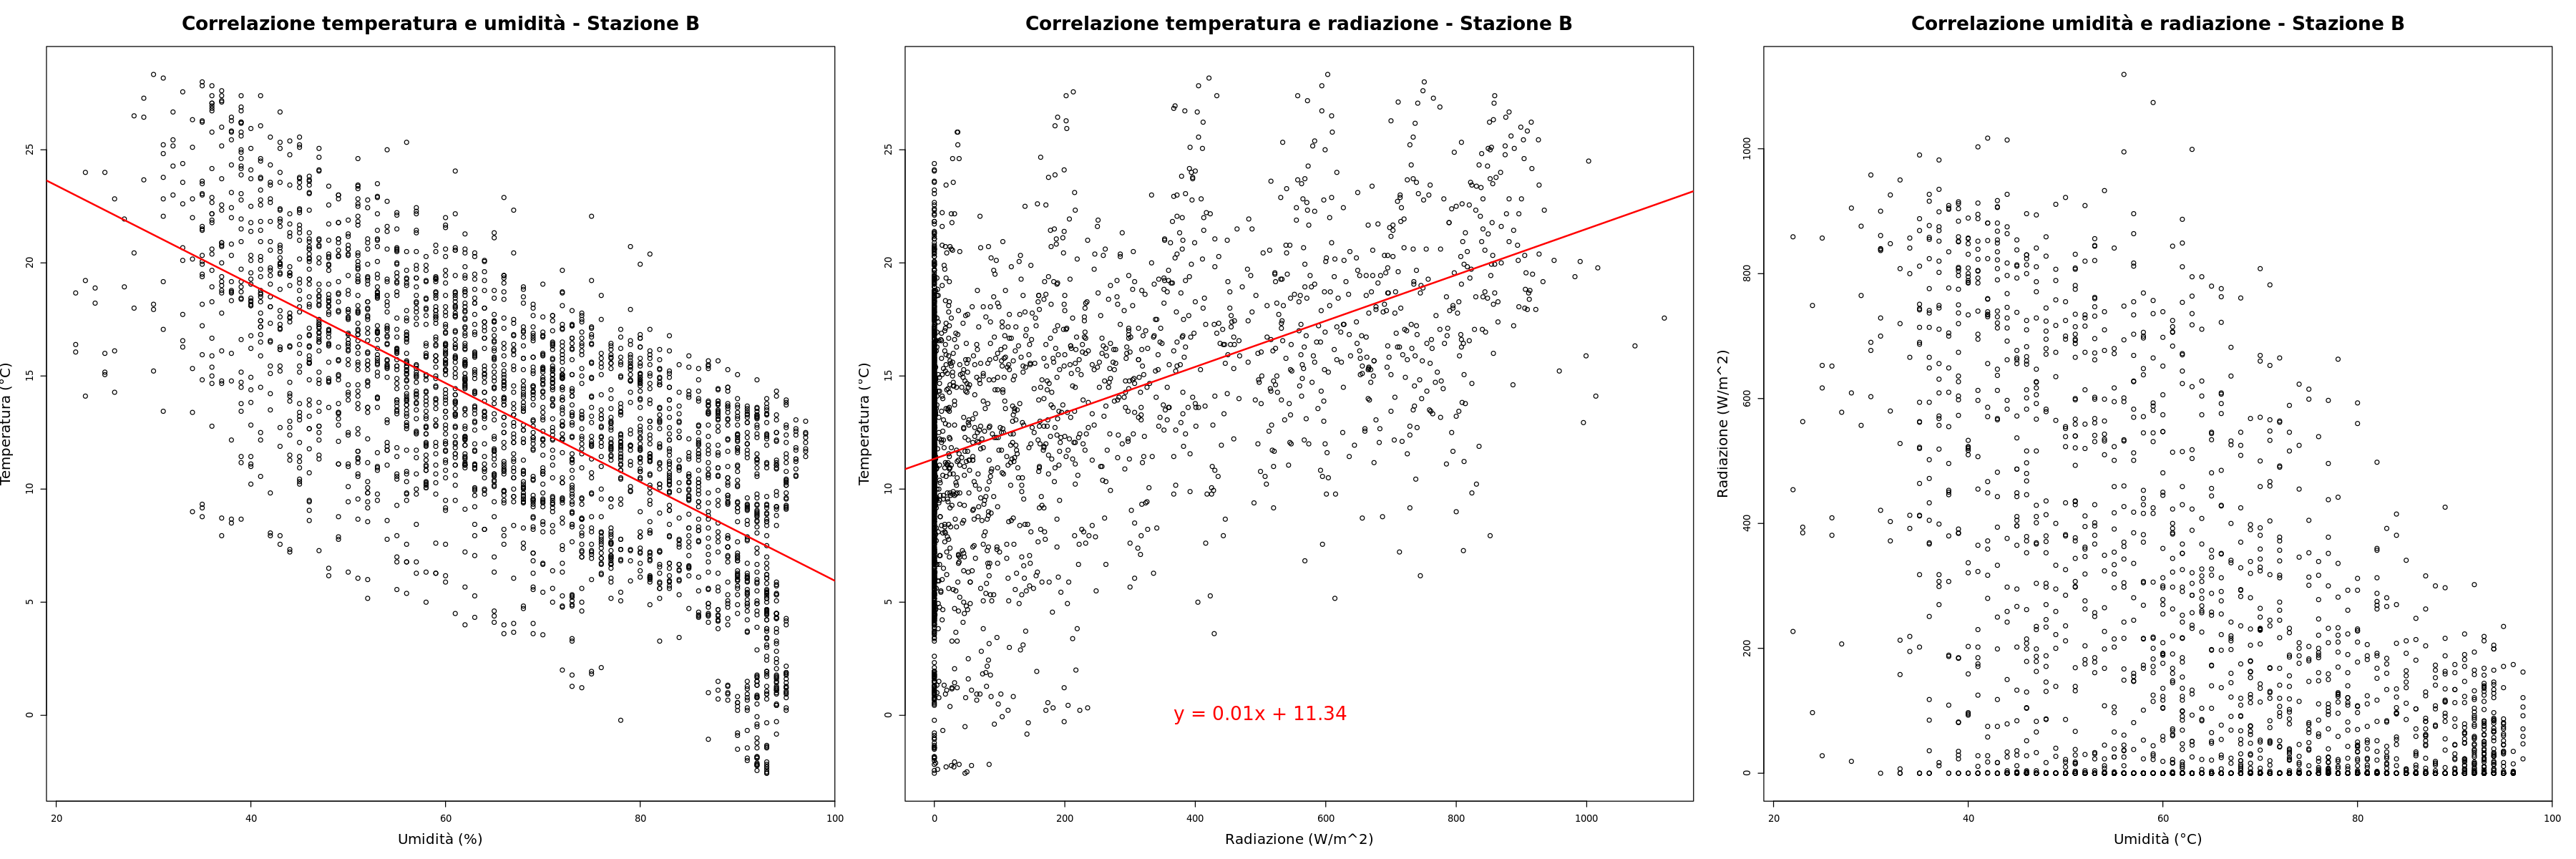

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 10)
#pdf('Plots/corrscalari1.pdf', width = 30, height = 10)
par(mfrow = c(1,3))

plot(spring_data_B$outHum, spring_data_B$outTemp, main = 'Correlazione temperatura e umidità - Stazione B',
        ylab = 'Temperatura (°C)', xlab = 'Umidità (%)', cex.main = 2, cex.lab = 1.5)
#lines(seq(0,100), seq(0,100,1), col = 'darkgrey', lwd=2)
reg = lm(spring_data_B$outTemp ~ spring_data_B$outHum)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
#text(40,0, paste0('y = ', slope, 'x + ', intercept), cex = 2, col='red')
abline(reg, col = 'red', lwd=2 )


plot(spring_data_B$totRad, spring_data_B$outTemp, main = 'Correlazione temperatura e radiazione - Stazione B',
        ylab = 'Temperatura (°C)', xlab = 'Radiazione (W/m^2)', cex.main = 2, cex.lab = 1.5)
reg = lm(spring_data_B$outTemp ~ spring_data_B$totRad)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
text(500,0, paste0('y = ', slope, 'x + ', intercept), cex = 2, col='red')
abline(reg, col = 'red', lwd=2 )


plot(spring_data_B$outHum, spring_data_B$totRad, main = 'Correlazione umidità e radiazione - Stazione B',
        xlab = 'Umidità (°C)', ylab = 'Radiazione (W/m^2)', cex.main = 2, cex.lab = 1.5)
#dev.off()

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 10)
pdf('Plots/corrTHum.pdf', width = 30, height = 10)
par(mfrow = c(1,2), mar = c(4,8,4,4))

plot(winter_data_B$outHum, winter_data_B$outTemp, main = 'Correlazione temperatura e umidità in inverno',
        ylab = 'Temperatura (°C)', xlab = 'Umidità (%)', cex.main = 3, cex.lab = 2)
#lines(seq(0,100), seq(0,100,1), col = 'darkgrey', lwd=2)
reg = lm(winter_data_B$outTemp ~ winter_data_B$outHum)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
#text(30,-2, paste0('y = ', slope, 'x + ', intercept), cex = 2, col='red')
abline(reg, col = 'red', lwd=2 )

plot(spring_data_B$outHum, spring_data_B$outTemp, main = 'Correlazione temperatura e umidità in primavera',
        ylab = 'Temperatura (°C)', xlab = 'Umidità (%)', cex.main = 3, cex.lab = 2)
#lines(seq(0,100), seq(0,100,1), col = 'darkgrey', lwd=2)
reg = lm(spring_data_B$outTemp ~ spring_data_B$outHum)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
#text(40,0, paste0('y = ', slope, 'x + ', intercept), cex = 2, col='red')
abline(reg, col = 'red', lwd=2 )
dev.off()

png 
  2

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 10)
pdf('Plots/corrTRad.pdf', width = 30, height = 10)
par(mfrow = c(1,2), mar = c(4,8,4,4))

plot(winter_data_B$totRad, winter_data_B$outTemp, main = 'Correlazione temperatura e radiazione in inverno',
        ylab = 'Temperatura (°C)', xlab = 'Radiazione (W/m^2)', cex.main = 3, cex.lab = 2)
plot(spring_data_B$totRad, spring_data_B$outTemp, main = 'Correlazione temperatura e radiazione in primavera',
        ylab = 'Temperatura (°C)', xlab = 'Radiazione (W/m^2)', cex.main = 3, cex.lab = 2)

dev.off()

png 
  2

In [ ]:
data_w = read.table('ProcessedData/B/Winter_B_proc.txt', col.names = c('AbsTime', 'Year', 'Month', 'Day', 'Hour', 'Minutes', 'wndSpeed', 'wndDir'))
common_W = merge(winter_data_B, data_w, by = c('Year', 'Month', 'Day', 'Hour'))


In [ ]:
data_s = read.table('ProcessedData/B/Spring_B_proc.txt', col.names = c('AbsTime', 'Year', 'Month', 'Day', 'Hour', 'Minutes', 'wndSpeed', 'wndDir'))
common_S = merge(spring_data_B, data_s, by = c('Year', 'Month', 'Day', 'Hour'))

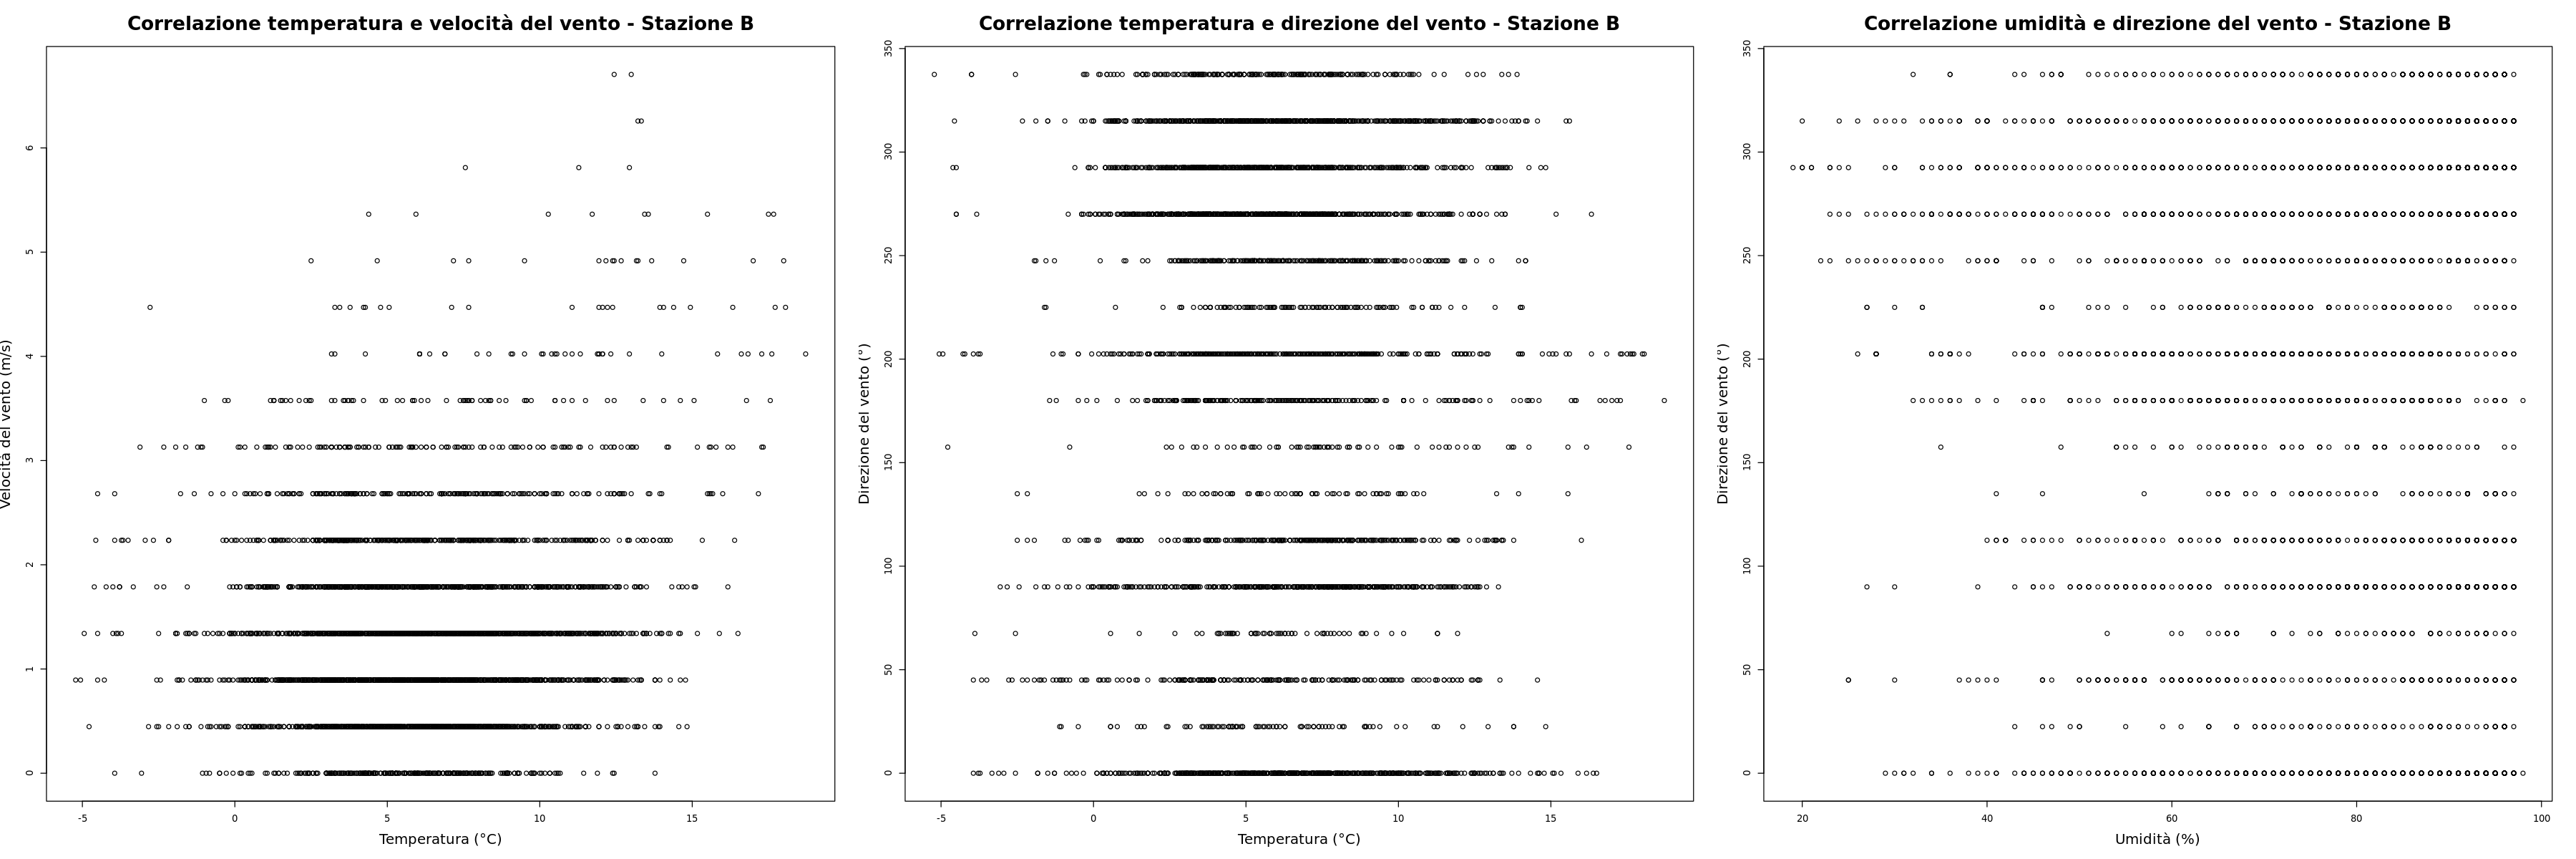

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 10)
#pdf('Plots/provaRH.pdf', width = 30, height = 10)
par(mfrow = c(1,3))

plot(common_W$outTemp, common_W$wndSpeed, main = 'Correlazione temperatura e velocità del vento - Stazione B',
        xlab = 'Temperatura (°C)', ylab = 'Velocità del vento (m/s)', cex.main = 2, cex.lab = 1.5)

plot(common_W$outTemp, common_W$wndDir, main = 'Correlazione temperatura e direzione del vento - Stazione B',
        xlab = 'Temperatura (°C)', ylab = 'Direzione del vento (°)', cex.main = 2, cex.lab = 1.5)

plot(common_W$outHum, common_W$wndDir, main = 'Correlazione umidità e direzione del vento - Stazione B',
        xlab = 'Umidità (%)', ylab = 'Direzione del vento (°)', cex.main = 2, cex.lab = 1.5)

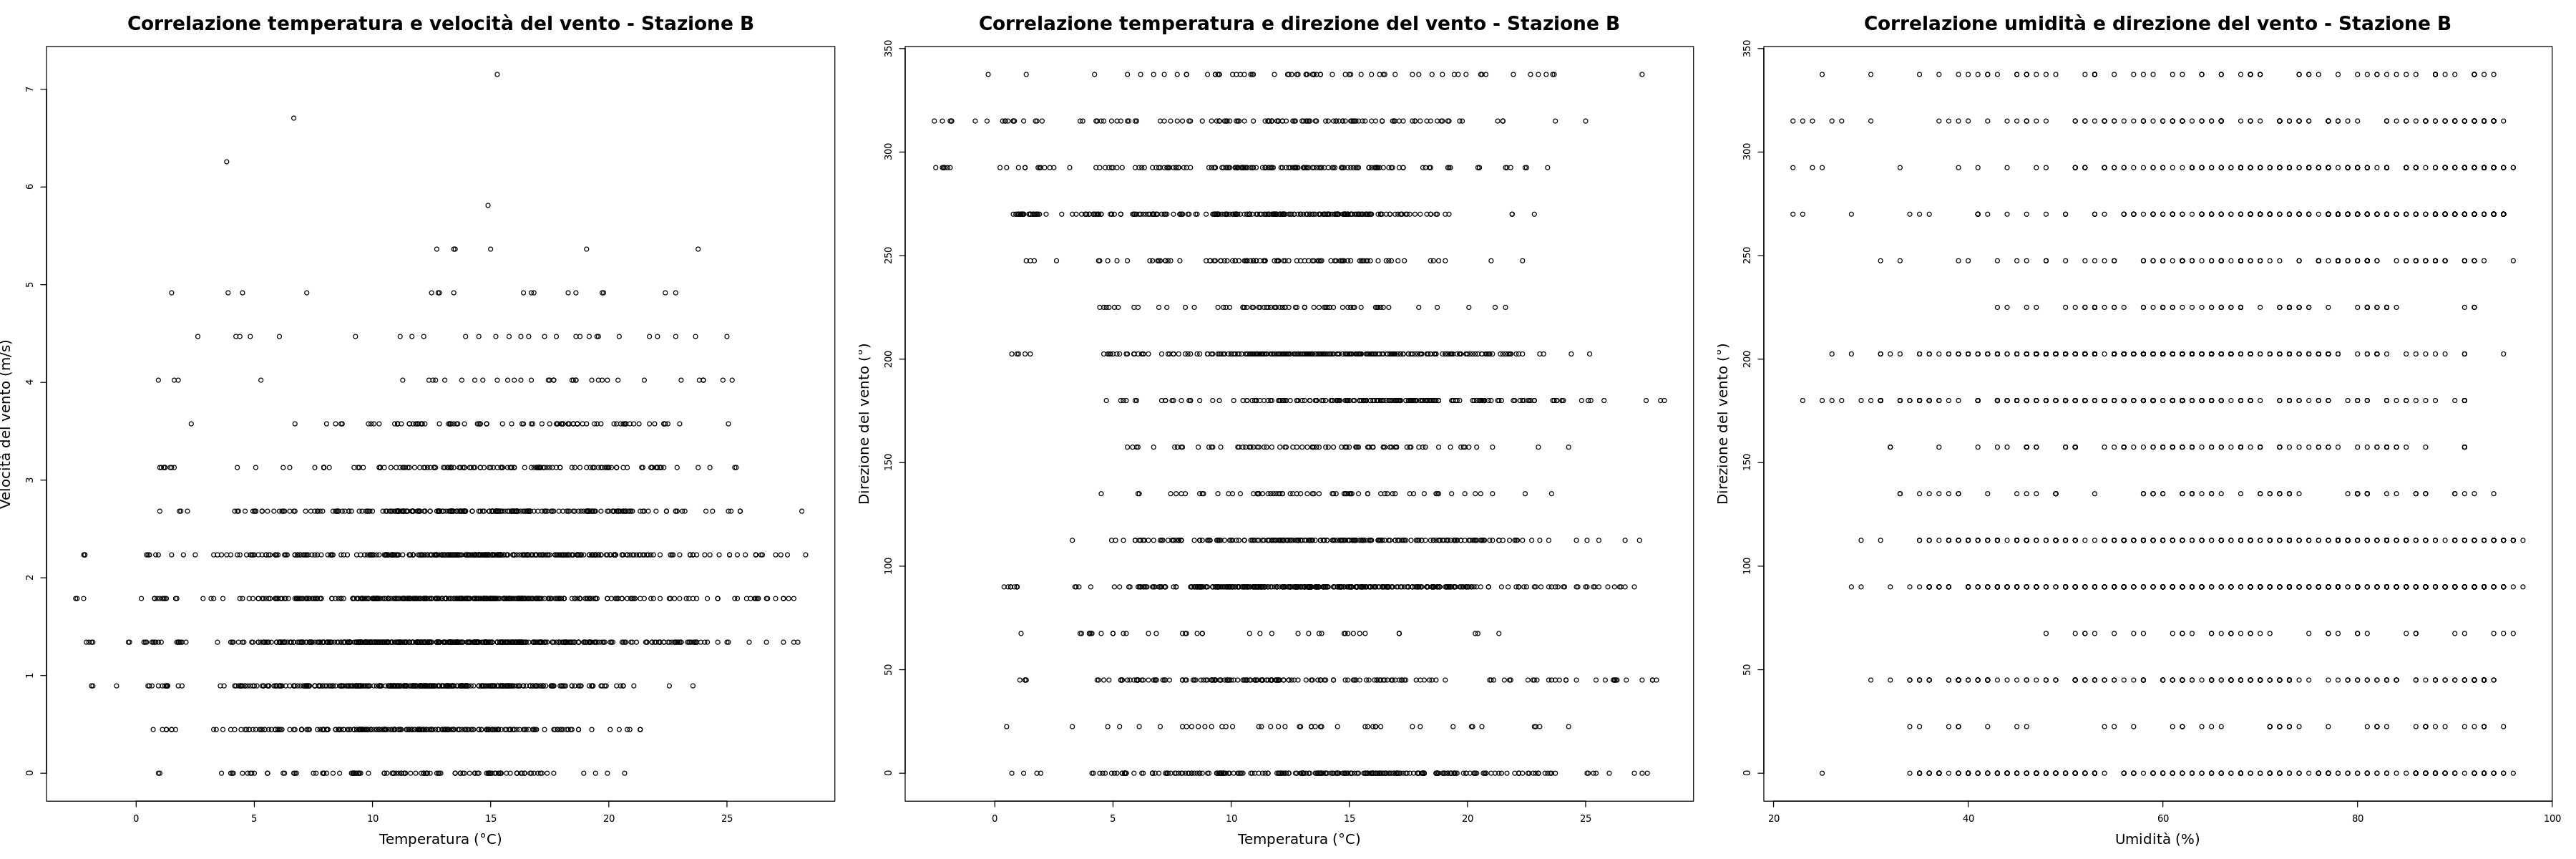

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 10)
#pdf('Plots/provaRH.pdf', width = 30, height = 10)
par(mfrow = c(1,3))

plot(common_S$outTemp, common_S$wndSpeed, main = 'Correlazione temperatura e velocità del vento - Stazione B',
        xlab = 'Temperatura (°C)', ylab = 'Velocità del vento (m/s)', cex.main = 2, cex.lab = 1.5)

plot(common_S$outTemp, common_S$wndDir, main = 'Correlazione temperatura e direzione del vento - Stazione B',
        xlab = 'Temperatura (°C)', ylab = 'Direzione del vento (°)', cex.main = 2, cex.lab = 1.5)

plot(common_S$outHum, common_S$wndDir, main = 'Correlazione umidità e direzione del vento - Stazione B',
        xlab = 'Umidità (%)', ylab = 'Direzione del vento (°)', cex.main = 2, cex.lab = 1.5)

## Campo più affidabile

In [ ]:
corr_coef = corr_coef = function(data1, data2) {
    a = sum(( data1 - mean(data1) )*( data2 - mean(data2) ) )/( sqrt(sum((data1 - mean(data1))**2))*sqrt(sum((data2 - mean(data2))**2)) )
    return(a)
}

In [ ]:
#r_temp = c(corr_coef(winter_data_A$outTemp, winter_data_B$outTemp),corr_coef(winter_data_B$outTemp, winter_data_C$outTemp),corr_coef(winter_data_C$outTemp, winter_data_A$outTemp))
#r_hum = c(corr_coef(winter_data_A$outHum, winter_data_B$outHum),corr_coef(winter_data_B$outHum, winter_data_C$outHum),corr_coef(winter_data_C$outHum, winter_data_A$outHum))
#r_rad = c(corr_coef(winter_data_A$totRad, winter_data_B$totRad),corr_coef(winter_data_B$totRad, winter_data_C$totRad),corr_coef(winter_data_C$totRad, winter_data_A$totRad))
#r_press = c(corr_coef(winter_data_A$Press, winter_data_B$Press),corr_coef(winter_data_B$Press, winter_data_C$Press),corr_coef(winter_data_C$Press, winter_data_A$Press))
#r_rain = c(corr_coef(winter_data_A$rainRate, winter_data_B$rainRate),corr_coef(winter_data_B$rainRate, winter_data_C$rainRate),corr_coef(winter_data_C$rainRate, winter_data_A$rainRate))



In [ ]:
commonBC_W = commonBC_W %>% filter(rainRateC < 300)
commonAC_W = commonAC_W %>% filter(rainRateC < 300)

r_temp = c(cor(winter_data_A$outTemp, winter_data_B$outTemp),cor(commonBC_W$outTempB, commonBC_W$outTempC),cor(commonAC_W$outTempA, commonAC_W$outTempC))
r_hum = c(cor(winter_data_A$outHum, winter_data_B$outHum),cor(commonBC_W$outHumB, commonBC_W$outHumC),cor(commonAC_W$outHumA, commonAC_W$outHumC))
r_rad = c(cor(winter_data_A$totRad, winter_data_B$totRad),cor(commonBC_W$totRadB, commonBC_W$totRadC),cor(commonAC_W$totRadA, commonAC_W$totRadC))
r_press = c(cor(winter_data_A$Press, winter_data_B$Press),cor(commonBC_W$PressB, commonBC_W$PressC),cor(commonAC_W$PressA, commonAC_W$PressC))
r_rain = c(cor(winter_data_A$rainRate, winter_data_B$rainRate),cor(commonBC_W$rainRateB, commonBC_W$rainRateC),cor(commonAC_W$rainRateA, commonAC_W$rainRateC))



m1 = matrix(c(r_temp, r_hum, r_rad, r_press, r_rain), nrow = 3, ncol = 5)
#m
rownames(m1) = c('A-B', 'B-C', 'C-A')
colnames(m1) = c('Temperatura', 'Umidità rel.', 'Radiazione', 'Pressione', 'Precipitazione')
cat('### CORRELAZIONI INVERNO ###')
m1


commonBC_S = commonBC_S %>% filter(rainRateC < 300)
commonAC_S = commonAC_S %>% filter(rainRateC < 300)

r_temp = c(cor(spring_data_A$outTemp, spring_data_B$outTemp),cor(commonBC_S$outTempB, commonBC_S$outTempC),cor(commonAC_S$outTempA, commonAC_S$outTempC))
r_hum = c(cor(spring_data_A$outHum, spring_data_B$outHum),cor(commonBC_S$outHumB, commonBC_S$outHumC),cor(commonAC_S$outHumA, commonAC_S$outHumC))
r_rad = c(cor(spring_data_A$totRad, spring_data_B$totRad),cor(commonBC_S$totRadB, commonBC_S$totRadC),cor(commonAC_S$totRadA, commonAC_S$totRadC))
r_press = c(cor(spring_data_A$Press, spring_data_B$Press),cor(commonBC_S$PressB, commonBC_S$PressC),cor(commonAC_S$PressA, commonAC_S$PressC))
r_rain = c(cor(spring_data_A$rainRate, spring_data_B$rainRate),cor(commonBC_S$rainRateB, commonBC_S$rainRateC),cor(commonAC_S$rainRateA, commonAC_S$rainRateC))

m2 = matrix(c(r_temp, r_hum, r_rad, r_press, r_rain), nrow = 3, ncol = 5)
#m
rownames(m2) = c('A-B', 'B-C', 'C-A')
colnames(m2) = c('Temperatura', 'Umidità rel.', 'Radiazione', 'Pressione', 'Precipitazione')
cat('### CORRELAZIONI PRIMAVERA ###')
m2




### CORRELAZIONI INVERNO ###

Temperatura Umidità rel. Radiazione Pressione Precipitazione
A-B 0.9960000   0.9976675    0.9990293  0.9999669 0.7976705     
B-C 0.9350365   0.9949473    0.9987935  0.9999588 0.9595557     
C-A 0.9401731   0.9935994    0.9995866  0.9999309 0.9298889

### CORRELAZIONI PRIMAVERA ###

Temperatura Umidità rel. Radiazione Pressione Precipitazione
A-B 0.9988235   0.9985391    0.9988794  0.9998492 0.8036584     
B-C 0.9707308   0.9923726    0.9868038  0.9997707 0.9442326     
C-A 0.9720831   0.9926173    0.9886927  0.9996856 0.9466117

In [ ]:
install.packages('RColorBrewer')
library('RColorBrewer')

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)



In [ ]:
options(repr.plot.width = 10, repr.plot.height = 7)
rf = colorRampPalette(brewer.pal(5,'Blues'))
r <- rf(100)
pdf('Plots/correlazione_scalari_inverno.pdf', width = 10, height = 7)
levelplot(t(m1), scales = list(x=list(cex=1.3), y=list(cex=1.3)),
    ylab = list('Stazioni', cex=1.5), xlab = list('Parametri', cex=1.5),
    main = list('Correlazione tra stazioni per dati scalari - Inverno', cex=2),
    col.regions=r)
dev.off()

pdf('Plots/correlazione_scalari_primavera.pdf', width = 10, height = 7)
levelplot(t(m2), scales = list(x=list(cex=1.3), y=list(cex=1.3)),
    ylab = list('Stazioni', cex=1.5), xlab = list('Parametri', cex=1.5),
    main = list('Correlazione tra stazioni per dati scalari - Primavera', cex = 2),
    cex.lab = 2, col.regions=r)
dev.off()

png 
  2

png 
  2

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 7)
pdf('heatmap_prova2.pdf', width = 15, height = 14)
#heatmap(m1, Rowv = NA, Colv = NA, cexCol = 2, cexRow = 2, labCol = c('T', 'RH', 'Rad', 'p', 'Rate') )
heatmap(m2, Rowv = NA, Colv = NA, cexCol = 2, cexRow = 2, labCol = c('T', 'RH', 'Rad', 'p', 'Rate'))
dev.off()

#row_names_gp = gpar(fontsize = 7) per fare scritte più grandi ma devo installare una libreria e non funziona
# perché la versione di R è troppo vecchia

png 
  2

In [ ]:
#ggcorr(m1, method = c("everything", "pearson"))

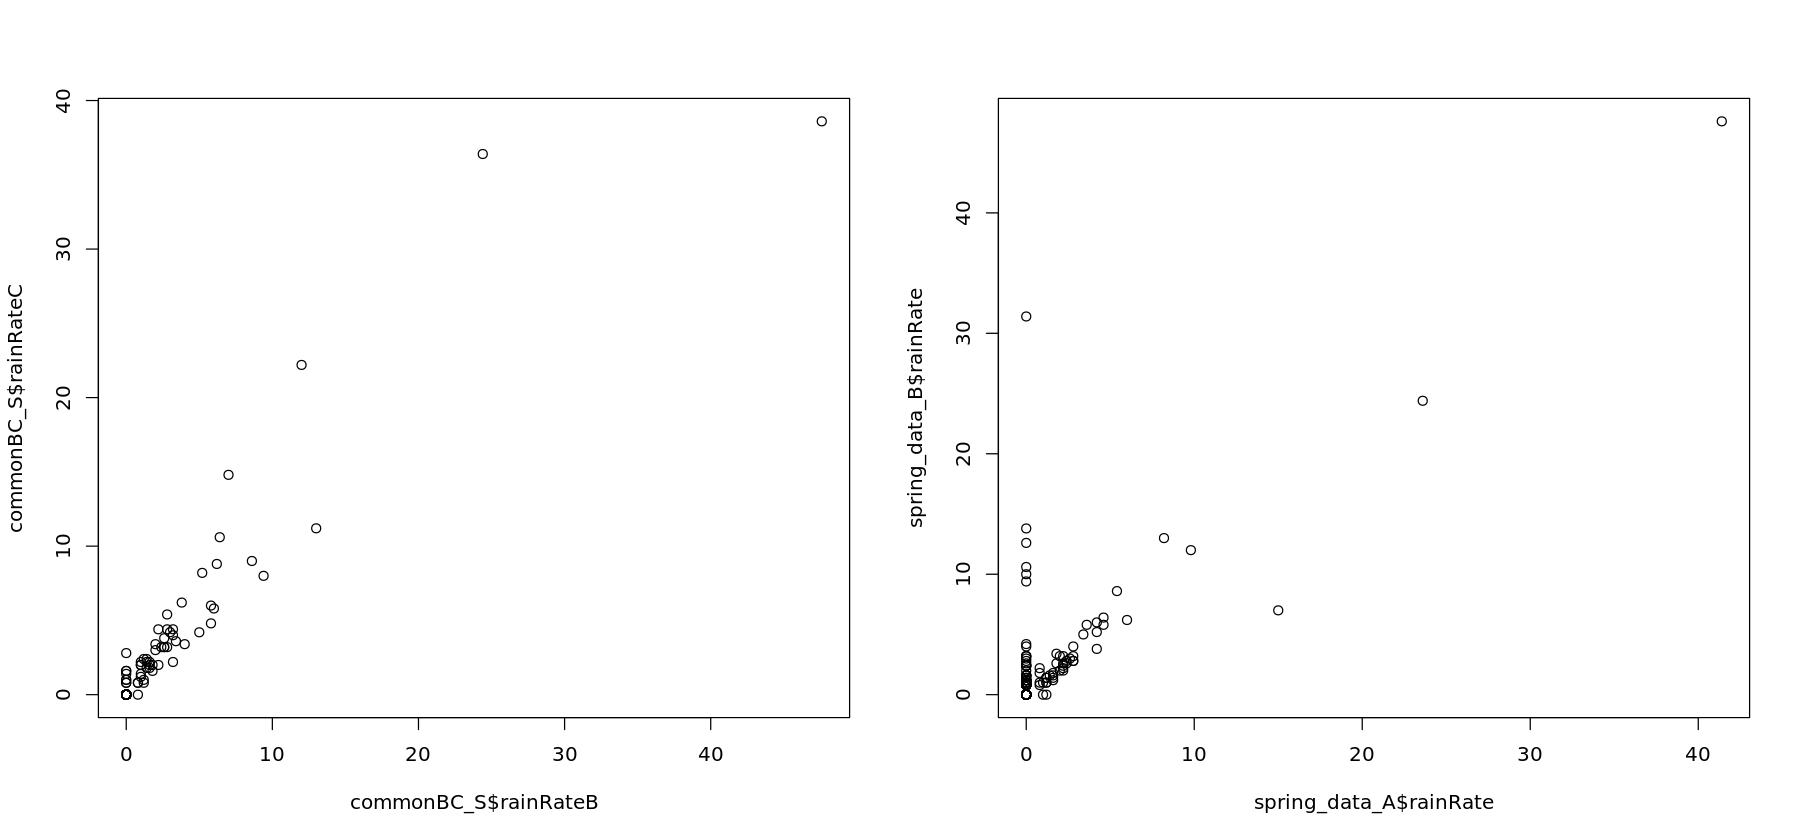

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow = c(1,2))
plot(commonBC_S$rainRateB, commonBC_S$rainRateC)
plot(spring_data_A$rainRate, spring_data_B$rainRate)


In [ ]:
dim(spring_data_A)
dim(dplyr::filter(spring_data_A, ((spring_data_A$rainRate == 0)& (spring_data_B$rainRate != 0))))
dim(dplyr::filter(spring_data_B, ((spring_data_B$rainRate == 0)& (spring_data_A$rainRate != 0))))

dim(commonAC_S)
dim(dplyr::filter(commonAC_S, ((commonAC_S$rainRateA == 0)& (commonAC_S$rainRateC != 0))))
dim(dplyr::filter(commonAC_S, ((commonAC_S$rainRateC == 0)& (commonAC_S$rainRateA != 0))))


[1] 2830   10

[1] 57 10

[1]  2 10

[1] 1533   16

[1] 13 16

[1]  1 16

## Errori sistematici

In [ ]:
# vedi plot di correlazione sopra con la temperatura

## Correlazione tra campi

In [ ]:
# io prenderei la stazione B perché mi sembra la più sicura

In [ ]:
WinterARPAE

Year Month Day Hour Press  totRad rainRate outHum outTemp
1     2015 12    1    0   101480   0    0        93      4.4   
2     2015 12    1    1   101470   0    0        93      5.1   
3     2015 12    1    2   101450   0    0        91      5.1   
4     2015 12    1    3   101460   0    0        93      4.1   
5     2015 12    1    4   101460   0    0        89      5.0   
6     2015 12    1    5   101480   0    0        90      4.9   
7     2015 12    1    6   101480   0    0        88      6.0   
8     2015 12    1    7   101500  11    0        88      6.5   
9     2015 12    1    8   101560  59    0        91      4.8   
10    2015 12    1    9   101620 189    0        86      5.9   
11    2015 12    1   10   101670 282    0        81      6.5   
12    2015 12    1   11   101660 335    0        70      9.8   
13    2015 12    1   12   101600 311    0        68     10.9   
14    2015 12    1   13   101590 274    0        66     11.5   
15    2015 12    1   14   101560 172    0        64     12.4   
16    2015 12    1   15   101570  78    0        67     12.0   
17    2015 12    1   16   101620   9    0        78     10.2   
18    2015 12    1   17   101680   0    0        83      9.1   
19    2015 12    1   18   101720   0    0        85      8.8   
20    2015 12    1   19   101750   0    0        88      8.0   
21    2015 12    1   20   101760   0    0        91      7.2   
22    2015 12    1   21   101830   0    0        93      6.3   
23    2015 12    1   22   101870   0    0        93      6.6   
24    2015 12    1   23   101880   0    0        93      6.2   
25    2015 12    2    0   101870   0    0        93      6.1   
26    2015 12    2    1   101860   0    0        94      6.2   
27    2015 12    2    2   101880   0    0        93      5.2   
28    2015 12    2    3   101880   0    0        95      4.8   
29    2015 12    2    4   101900   0    0        95      4.9   
30    2015 12    2    5   101910   0    0        93      4.8   
⋮     ⋮    ⋮     ⋮   ⋮    ⋮      ⋮      ⋮        ⋮      ⋮      
21322 2018 2     27  19   100310   0    0        65     -3.4   
21332 2018 2     27  20   100340   0    0        66     -3.9   
21342 2018 2     27  21   100380   0    0        66     -4.5   
21352 2018 2     27  22   100440   0    0        65     -5.2   
21362 2018 2     27  23   100480   0    0        63     -5.6   
21372 2018 2     28   0   100510   0    0        63     -6.0   
21382 2018 2     28   1   100510   0    0        61     -6.1   
21392 2018 2     28   2   100500   0    0        60     -6.0   
21402 2018 2     28   3   100550   0    0        60     -6.4   
21413 2018 2     28   4   100590   0    0        59     -6.3   
21422 2018 2     28   5   100640   0    0        65     -7.8   
21432 2018 2     28   6   100690   1    0        62     -7.2   
21442 2018 2     28   7   100760  74    0        60     -6.8   
21452 2018 2     28   8   100790 230    0        54     -4.6   
21462 2018 2     28   9   100860 366    0        47     -1.1   
21472 2018 2     28  10   100900 511    0        49     -0.4   
21482 2018 2     28  11   100910 574    0        46      0.2   
21492 2018 2     28  12   100900 602    0        44      0.8   
21502 2018 2     28  13   100890 422    0        45      0.8   
21513 2018 2     28  14   100880 416    0        43      1.0   
21522 2018 2     28  15   100900 296    0        41      1.0   
21532 2018 2     28  16   100880 150    0        43      1.1   
21542 2018 2     28  17   100930  30    0        50      0.6   
21552 2018 2     28  18   101000   2    0        56      0.2   
21562 2018 2     28  19   100990   0    0        60      0.0   
21572 2018 2     28  20   100990   0    0        65     -0.2   
21582 2018 2     28  21   101000   0    0        71     -0.5   
21592 2018 2     28  22   101020   0    0        67     -0.6   
21602 2018 2     28  23   101010   1    0        71     -0.9   
21612 2018 3      1   0   101030   0    0        97     -1.8

In [ ]:
mean_temp_w = WinterARPAE %>% group_by(Hour) %>% summarise(meanTemp = mean(outTemp), stdTemp = sd(outTemp))
mean_hum_w = WinterARPAE %>% group_by(Hour) %>% summarise(meanHum = mean(outHum), stdHum = sd(outHum)) 
mean_rad_w = WinterARPAE %>% group_by(Hour) %>% summarise(meanRad = mean(totRad), stdRad = sd(totRad)) 
mean_press_w = WinterARPAE %>% group_by(Hour) %>% summarise(meanPress = mean(Press)/100, stdPress = sd(Press)/100) 

mean_w_ARPAE = mean_temp_w %>% merge(mean_hum_w) %>% merge(mean_rad_w) %>% merge(mean_press_w)

mean_temp_s = SpringARPAE %>% group_by(Hour) %>% summarise(meanTemp = mean(outTemp), stdTemp = sd(outTemp))
mean_hum_s = SpringARPAE %>% group_by(Hour) %>% summarise(meanHum = mean(outHum), stdHum = sd(outHum)) 
mean_rad_s = SpringARPAE %>% group_by(Hour) %>% summarise(meanRad = mean(totRad), stdRad = sd(totRad)) 
mean_press_s = SpringARPAE %>% group_by(Hour) %>% summarise(meanPress = mean(Press)/100, stdPress = sd(Press)/100) 

mean_s_ARPAE = mean_temp_s %>% merge(mean_hum_s) %>% merge(mean_rad_s) %>% merge(mean_press_s)


In [ ]:
mean_w_ARPAE

Hour meanTemp stdTemp  meanHum  stdHum   meanRad      stdRad      meanPress
1   0   4.615441 3.140977 80.61397 18.18990   0.09926471   0.3453425 1011.192 
2   1   4.433333 3.016928 80.74532 17.89177   0.18726592   0.5640772 1011.176 
3   2   4.292424 2.985201 80.83712 17.83277   0.04924242   0.3507724 1011.005 
4   3   4.110646 2.958808 81.07224 17.55989   0.07604563   0.3627666 1010.725 
5   4   3.990530 3.003690 81.22727 17.62348   0.10984848   0.5152223 1010.682 
6   5   3.831679 2.928344 81.39695 17.54608   0.20229008   0.6731826 1010.639 
7   6   3.852091 3.096166 81.16730 17.78397   0.11406844   0.4728424 1010.884 
8   7   3.843019 3.140094 80.93208 17.86892   6.52075472  11.7160431 1011.271 
9   8   4.350943 3.147042 78.81132 18.29872  59.34716981  46.6994768 1011.566 
10  9   5.295880 3.102755 75.37828 19.68118 142.02247191  86.2090889 1011.888 
11 10   6.197015 3.142423 72.13433 20.70853 214.21641791 123.3438822 1012.033 
12 11   6.980224 3.289573 69.33209 20.89294 259.51865672 142.4745842 1011.660 
13 12   7.516357 3.425044 67.43123 21.62226 264.19702602 147.3692762 1011.166 
14 13   7.876580 3.505168 66.00000 22.26720 226.10780669 128.1432540 1010.676 
15 14   7.987407 3.537593 66.26296 22.63861 169.00000000 102.7726404 1010.494 
16 15   7.799259 3.460075 67.71852 22.58817  94.08518519  67.7245965 1010.479 
17 16   7.314815 3.357786 70.84074 21.82238  30.04074074  35.3051779 1010.517 
18 17   6.814815 3.213633 73.16296 20.79202   3.18888889   6.5120325 1010.703 
19 18   6.291481 3.113139 75.50370 20.09194   0.11481481   0.3829097 1010.943 
20 19   5.952222 3.176431 76.67407 19.79235   0.12222222   0.4437365 1011.098 
21 20   5.623704 3.178230 77.73333 19.41053   0.15185185   0.4674302 1011.183 
22 21   5.306296 3.185375 78.72593 18.94364   0.20740741   0.5860370 1011.290 
23 22   5.004444 3.117211 79.63333 18.73100   0.14074074   0.4669439 1011.343 
24 23   4.789591 3.138798 80.27881 18.30974   0.13011152   0.4827088 1011.346 
   stdPress
1  10.33159
2  10.22596
3  10.23698
4  10.20300
5  10.22760
6  10.20862
7  10.25187
8  10.20747
9  10.22040
10 10.25573
11 10.25677
12 10.22487
13 10.19866
14 10.19965
15 10.17993
16 10.13732
17 10.16283
18 10.19432
19 10.20637
20 10.26663
21 10.30543
22 10.34295
23 10.35975
24 10.34539

In [ ]:
mean_temp_w = winter_data_B %>% group_by(Hour) %>% summarise(meanTemp = mean(outTemp), stdTemp = sd(outTemp))
mean_hum_w = winter_data_B %>% group_by(Hour) %>% summarise(meanHum = mean(outHum), stdHum = sd(outHum)) 
mean_rad_w = winter_data_B %>% group_by(Hour) %>% summarise(meanRad = mean(totRad), stdRad = sd(totRad)) 
mean_press_w = winter_data_B %>% group_by(Hour) %>% summarise(meanPress = mean(Press), stdPress = sd(Press)) 
#mean_rain_w = winter_data_B %>% group_by(Hour) %>% summarise(meanRain = mean(rainRate), stdRain = sd) 

mean_w = mean_temp_w %>% merge(mean_hum_w) %>% merge(mean_rad_w) %>% merge(mean_press_w)
mean_w

Hour meanTemp stdTemp  meanHum  stdHum   meanRad      stdRad      meanPress
1   0   5.295978 2.837082 81.58672 13.34967   0.00000000   0.0000000 1020.456 
2   1   5.114317 2.836569 81.93727 13.18556   0.00000000   0.0000000 1020.305 
3   2   4.915756 2.796824 82.23985 13.10462   0.00000000   0.0000000 1020.227 
4   3   4.710295 2.812280 82.40959 13.05934   0.00000000   0.0000000 1020.160 
5   4   4.562509 2.760095 82.43542 13.13613   0.00000000   0.0000000 1019.946 
6   5   4.393247 2.797589 82.67528 12.91416   0.00000000   0.0000000 1019.864 
7   6   4.252325 2.748990 82.95572 12.89695   0.00000000   0.0000000 1019.904 
8   7   4.232694 2.808496 82.90037 13.08580   0.01845018   0.1599508 1020.082 
9   8   4.317196 2.902558 82.57196 13.32171   8.73431734  12.5259539 1020.406 
10  9   4.970037 3.014433 80.63469 14.21200  65.76383764  48.2277347 1020.699 
11 10   5.784428 3.029251 77.76384 15.45302 160.52029520  97.1388780 1020.970 
12 11   6.490701 3.061522 75.80812 15.94389 232.74907749 136.4585534 1021.056 
13 12   7.330332 3.272816 73.45387 16.09062 283.75276753 161.3410746 1020.667 
14 13   7.920000 3.353986 71.59410 16.64569 285.09225092 166.4129924 1020.136 
15 14   8.302546 3.436217 70.37638 17.37938 251.30627306 152.1997418 1019.638 
16 15   8.412030 3.480270 70.31365 17.59823 187.92988930 123.6194230 1019.430 
17 16   8.174797 3.422017 71.57565 17.31005  90.62730627  80.2679161 1019.415 
18 17   7.638339 3.292602 74.00738 16.49803  24.00738007  34.6862117 1019.465 
19 18   7.143210 3.115454 76.25461 15.41757   1.37638376   3.9728751 1019.662 
20 19   6.730775 2.943719 77.97417 14.84174   0.00000000   0.0000000 1019.904 
21 20   6.420554 2.995605 78.80812 14.73469   0.00000000   0.0000000 1020.063 
22 21   6.129815 2.972246 79.71218 14.26152   0.00000000   0.0000000 1020.154 
23 22   5.850775 2.955607 80.40959 14.02029   0.00000000   0.0000000 1020.263 
24 23   5.563616 2.915126 80.90775 13.74728   0.00000000   0.0000000 1020.326 
   stdPress
1  10.37515
2  10.38620
3  10.39956
4  10.42602
5  10.41908
6  10.42371
7  10.39994
8  10.39697
9  10.35743
10 10.36235
11 10.39256
12 10.38376
13 10.34514
14 10.32940
15 10.32312
16 10.29254
17 10.25481
18 10.27960
19 10.30808
20 10.31587
21 10.37551
22 10.41418
23 10.44533
24 10.46564

In [ ]:
mean_temp_s = spring_data_B %>% group_by(Hour) %>% summarise(meanTemp = mean(outTemp), stdTemp = sd(outTemp)) 
mean_hum_s = spring_data_B %>% group_by(Hour) %>% summarise(meanHum = mean(outHum), stdHum = sd(outHum)) 
mean_rad_s = spring_data_B %>% group_by(Hour) %>% summarise(meanRad = mean(totRad), stdRad = sd(totRad)) 
mean_press_s = spring_data_B %>% group_by(Hour) %>% summarise(meanPress = mean(Press), stdPress = sd(Press)) 
#mean_rain_s = spring_data_B %>% group_by(Hour) %>% summarise(meanRain = mean(rainRate)) %>% select(meanRain)

mean_s = mean_temp_s %>% merge(mean_hum_s) %>% merge(mean_rad_s) %>% merge(mean_press_s)
mean_s

Hour meanTemp stdTemp  meanHum  stdHum   meanRad    stdRad    meanPress
1   0   11.99805 4.907032 70.63559 14.96758   0.000000   0.00000 1011.096 
2   1   11.65195 4.769850 71.88983 14.49833   0.000000   0.00000 1011.145 
3   2   11.36362 4.692269 72.65517 14.18272   0.000000   0.00000 1011.108 
4   3   10.99119 4.592277 73.51695 13.40987   0.000000   0.00000 1010.924 
5   4   10.70949 4.498718 74.59322 13.08437   0.000000   0.00000 1010.800 
6   5   10.44331 4.456246 75.59322 12.83174   0.000000   0.00000 1010.754 
7   6   10.20610 4.365795 76.63559 12.48498   0.000000   0.00000 1010.812 
8   7   10.06415 4.253027 77.38136 12.29684  10.771186  11.88003 1011.070 
9   8   10.71153 4.416063 75.58475 13.32521  87.855932  63.46656 1011.401 
10  9   11.69542 4.715611 72.01695 14.60300 214.330508 127.34992 1011.644 
11 10   12.66398 4.937975 68.73729 16.05143 341.135593 199.03691 1011.811 
12 11   13.62593 5.223519 65.33051 17.08503 455.872881 245.19957 1011.839 
13 12   14.53373 5.605081 62.44915 18.33851 523.686441 287.73818 1011.682 
14 13   15.30712 5.794702 59.58475 18.69518 571.169492 295.47182 1011.312 
15 14   15.96602 5.960019 57.09322 18.75665 541.584746 297.47261 1010.850 
16 15   16.29542 6.117371 56.26271 19.02290 483.559322 279.93056 1010.473 
17 16   16.41873 6.219215 56.49153 19.22683 402.830508 250.26039 1010.108 
18 17   16.23695 6.268890 56.89831 19.42040 308.000000 210.64180 1009.914 
19 18   15.74212 6.261501 58.84746 19.67889 176.389831 158.34200 1009.942 
20 19   15.09890 6.101175 61.38983 18.96332  73.364407  78.19990 1010.067 
21 20   14.24000 5.705063 64.00000 18.13199   9.050847  11.88466 1010.315 
22 21   13.45314 5.343683 66.94915 16.94276   0.000000   0.00000 1010.696 
23 22   12.89195 5.099149 68.51695 16.04094   0.000000   0.00000 1010.933 
24 23   12.52127 4.891051 69.12712 15.95107   0.000000   0.00000 1010.980 
   stdPress
1  7.280515
2  7.330984
3  7.283043
4  7.261306
5  7.313732
6  7.305481
7  7.319706
8  7.369913
9  7.375757
10 7.365973
11 7.400268
12 7.417835
13 7.405115
14 7.397637
15 7.450428
16 7.404386
17 7.305336
18 7.232288
19 7.131452
20 7.092255
21 7.089167
22 7.119839
23 7.186583
24 7.250112

In [ ]:
a = mean_s_ARPAE$meanPress
mean_s_ARPAE$meanPress[3:24] = a[1:22]
mean_s_ARPAE$meanPress[1:3] = a[22:24]

a = mean_s_ARPAE$meanRad
mean_s_ARPAE$meanRad[3:24] = a[1:22]
mean_s_ARPAE$meanRad[1:3] = a[22:24]

a = mean_s_ARPAE$meanTemp
mean_s_ARPAE$meanTemp[3:24] = a[1:22]
mean_s_ARPAE$meanTemp[1:3] = a[22:24]

a = mean_s_ARPAE$meanHum
mean_s_ARPAE$meanHum[3:24] = a[1:22]
mean_s_ARPAE$meanHum[1:3] = a[22:24]

In [ ]:
a = mean_w_ARPAE$meanPress
mean_w_ARPAE$meanPress[2:24] = a[1:23]
mean_w_ARPAE$meanPress[1:2] = a[23:24]

a = mean_w_ARPAE$meanRad
mean_w_ARPAE$meanRad[2:24] = a[1:23]
mean_w_ARPAE$meanRad[1:2] = a[23:24]

a = mean_w_ARPAE$meanTemp
mean_w_ARPAE$meanTemp[2:24] = a[1:23]
mean_w_ARPAE$meanTemp[1:2] = a[23:24]

a = mean_w_ARPAE$meanHum
mean_w_ARPAE$meanHum[2:24] = a[1:23]
mean_w_ARPAE$meanHum[1:2] = a[23:24]

In [ ]:
pdf('Plots/cicli_diurni_scalari.pdf', width = 30, height = 18)
options(repr.plot.width = 30, repr.plot.height = 18)
par(oma = c(10,1,1,1), mfrow = c(2, 2), mar = c(4,8,4,4))

plot(0:23, mean_w$meanTemp, pch = 20, type = 'b',
    main = 'Ciclo diurno temperatura', cex.main = 4,
    xlab = 'Ora', ylab = 'Temperatura (°C)', cex.lab = 2.5, 
    cex.axis = 1.5, ylim = c(0,25), col = '#045a8d', lwd = 2,
    xaxt = 'n')
axis(1, at = 0:23)
lines(0:23, mean_s$meanTemp, lwd=2, type = 'b', col = '#7a0177')
lines(0:23, mean_s_ARPAE$meanTemp, lwd = 2, type = 'b', col = '#f768a1')
lines(0:23, mean_w_ARPAE$meanTemp, lwd = 2, type = 'b', col = '#74a9cf')

polygon(c(0:23, 23:0), c(mean_s$meanTemp - mean_s$stdTemp, mean_s$meanTemp[24:1] + mean_s$stdTemp[24:1]),
        col = 'pink', density = 10)
polygon(c(0:23, 23:0), c(mean_w$meanTemp - mean_w$stdTemp, mean_w$meanTemp[24:1] + mean_w$stdTemp[24:1]),
        col = 'lightblue', density = 10)
#legend(x=0, y=20, legend = c('Primavera', 'Inverno'), lty = 1, lwd = 2, col = c('darkorchid', 'blue'),
#    cex = 2.5, y.intersp = 0.8, bty = 'n', x.intersp = 0.5)

plot(0:23, mean_w$meanHum, pch = 20, type = 'b',
    main = 'Ciclo diurno umidità relativa', cex.main = 4,
    xlab = 'Ora', ylab = 'Umidità (%)', cex.lab = 2.5,
    cex.axis = 1.5, col = '#045a8d', ylim = c(30,100), lwd = 2,
    xaxt = 'n')
axis(1, at = 0:23)
lines(0:23, mean_s$meanHum, lwd=2, col = '#7a0177', type = 'b')
lines(0:23, mean_s_ARPAE$meanHum, lwd = 2, type = 'b', col = '#f768a1')
lines(0:23, mean_w_ARPAE$meanHum, lwd = 2, type = 'b', col = '#74a9cf')
polygon(c(0:23, 23:0), c(mean_s$meanHum - mean_s$stdHum, mean_s$meanHum[24:1] + mean_s$stdHum[24:1]),
        col = 'pink', density = 10)
polygon(c(0:23, 23:0), c(mean_w$meanHum - mean_w$stdHum, mean_w$meanHum[24:1] + mean_w$stdHum[24:1]),
        col = 'lightblue', density = 10)


plot(0:23, mean_w$meanRad, pch = 20, type = 'b',
    main = 'Ciclo diurno radiazione', cex.main = 4,
    xlab = 'Ora', ylab = 'Radiazione (W/m2)', cex.lab = 2.5,
    cex.axis = 1.5, ylim = c(0,900), col = '#045a8d', lwd = 2,
    xaxt = 'n')
axis(1, at = 0:23)
lines(0:23, mean_s$meanRad, lwd=2, type = 'b', col = '#7a0177')
lines(0:23, mean_s_ARPAE$meanRad, lwd = 2, type = 'b', col = '#f768a1')
lines(0:23, mean_w_ARPAE$meanRad, lwd = 2, type = 'b', col = '#74a9cf')
polygon(c(0:23, 23:0), c(mean_s$meanRad - mean_s$stdRad, mean_s$meanRad[24:1] + mean_s$stdRad[24:1]),
        col = 'pink', density = 10)
polygon(c(0:23, 23:0), c(mean_w$meanRad - mean_w$stdRad, mean_w$meanRad[24:1] + mean_w$stdRad[24:1]),
        col = 'lightblue', density = 10)


plot(0:23, mean_w$meanPress, pch = 20, type = 'b',
    main = 'Ciclo diurno pressione', cex.main = 4,
    xlab = 'Ora', ylab = 'Pressione (mbar)', cex.lab = 2.5,
    cex.axis = 1.5, col = '#045a8d', ylim = c(1000, 1040), lwd = 2,
    xaxt = 'n')
axis(1, at = 0:23)
lines(0:23, mean_s$meanPress, lwd=2, col = '#7a0177', type = 'b')
lines(0:23, mean_s_ARPAE$meanPress, lwd = 2, type = 'b', col = '#f768a1')
lines(0:23, mean_w_ARPAE$meanPress, lwd = 2, type = 'b', col = '#74a9cf')
polygon(c(0:23, 23:0), c(mean_s$meanPress - mean_s$stdPress, mean_s$meanPress[24:1] + mean_s$stdPress[24:1]),
        col = 'pink', density = 10)
polygon(c(0:23, 23:0), c(mean_w$meanPress - mean_w$stdPress, mean_w$meanPress[24:1] + mean_w$stdPress[24:1]),
        col = 'lightblue', density = 10)



par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 15, 0), new = TRUE)
plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n')
text = c("Stazione B Primavera", "Dati ARPAE Primavera", "Stazione B Inverno", "Dati ARPAE Inverno")
legend('bottom', legend = c("Stazione B Primavera", "Dati ARPAE Primavera", "Stazione B Inverno", "Dati ARPAE Inverno"), 
        col = c("#7a0177","#f768a1", "#045a8d", "#74a9cf"), 
        lwd = 8, xpd = TRUE, x.intersp = 1,
        #text.width = strwidth(text)[1],
        horiz = TRUE, cex = 4, seg.len=1, bty = 'n')

dev.off()

png 
  2

### Velocità vento vs temperatura

In [ ]:
wind_w = read.table('ProcessedData/B/Winter_proc_B_all.txt')
colnames(wind_w) = c('Year', 'Month', 'Day', 'Hour', 'wndSpeed', 'wndDir')

In [ ]:
temp = winter_data_B$outTemp

In [ ]:
data = winter_data_B %>% group_by(Year, Month, Day, Hour) %>% merge(wind_w)
data = data %>% group_by(Hour) %>% summarise(meanT = mean(outTemp), meanV = mean(wndSpeed))

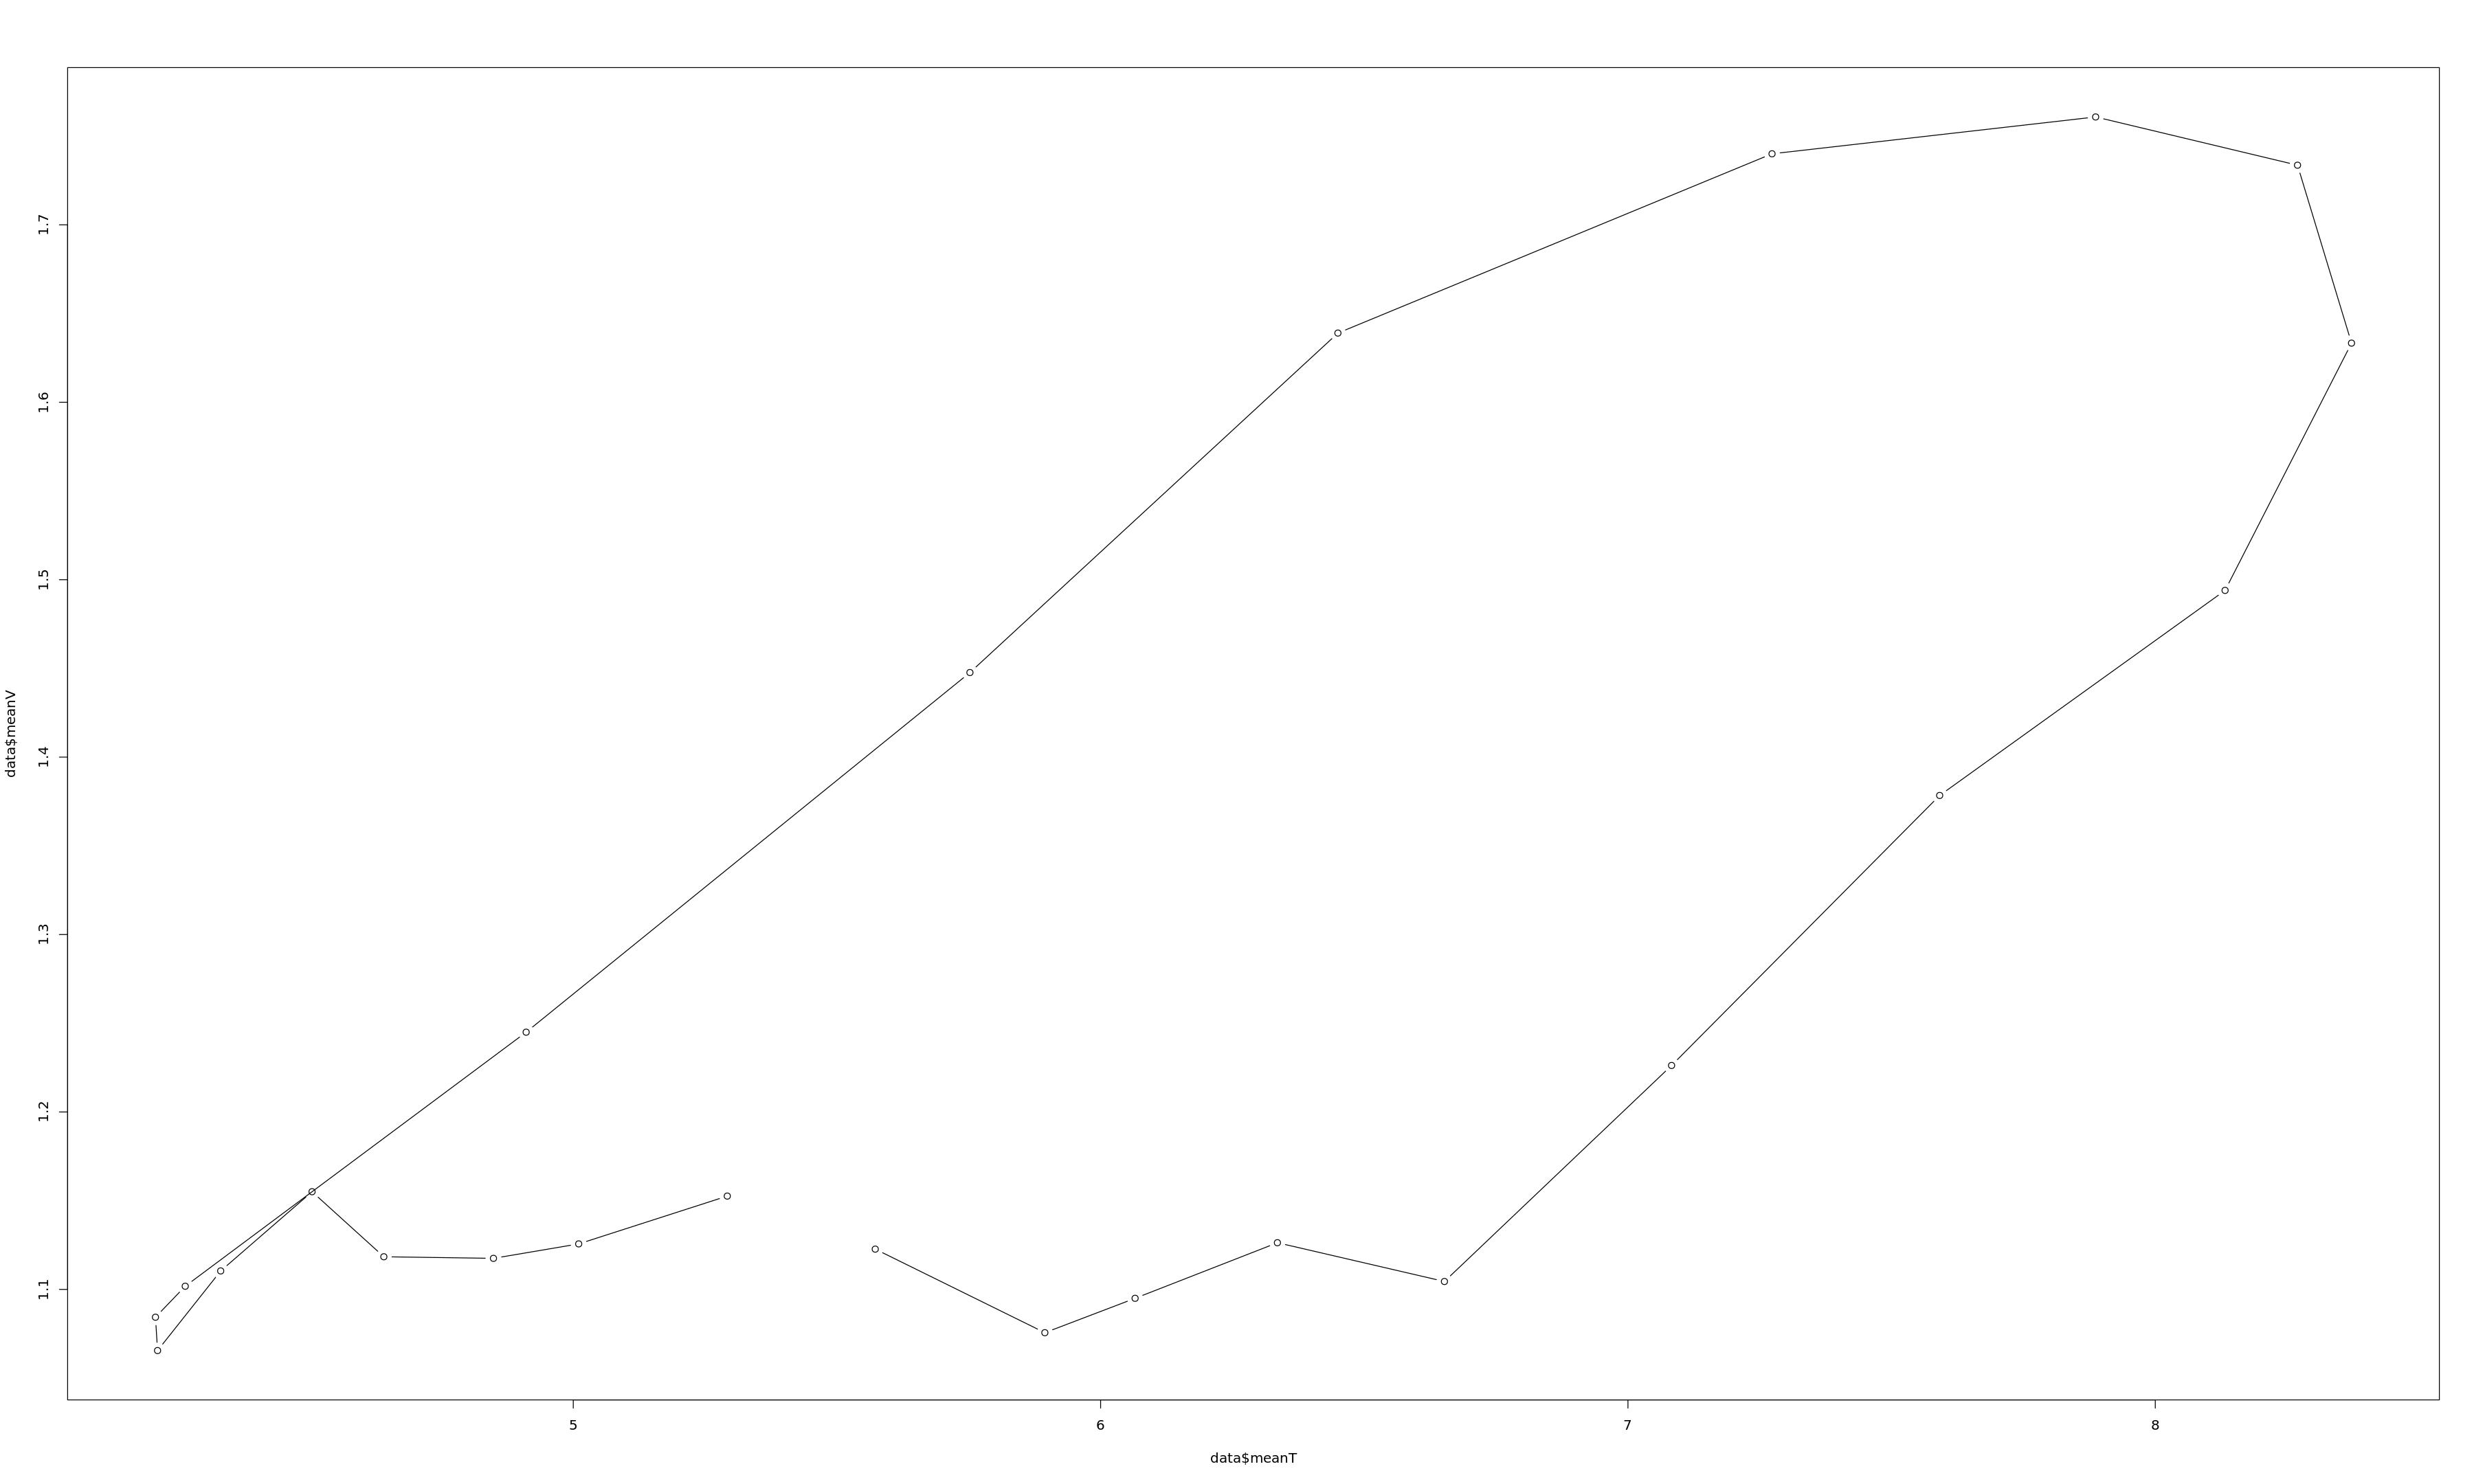

In [ ]:
plot(data$meanT, data$meanV, type = 'b')


In [ ]:
mean_wind_daily_w = wind_w  %>% group_by(Month, Day) %>% summarise(meanSpeed = mean(wndSpeed))
mean_temp_daily_w = winter_data_B %>% group_by(Month, Day) %>% summarise(meanTemp = mean(outTemp))

winter = mean_temp_daily_w %>% merge(mean_wind_daily_w)

`summarise()` has grouped output by 'Month'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Month'. You can override using the `.groups` argument.



In [ ]:
mean_speed = wind_w %>% group_by(Hour) %>% summarise(meanSpeed = mean(wndSpeed))


## IL GIORNO X

In [ ]:
giorno_X_A = StationDataA %>% filter(Year == 2017 & Month == 5 & Day == 12 & Minutes == 0)
giorno_X_B = StationDataB %>% filter(Year == 2017 & Month == 5 & Day == 12 & Minutes == 0)
giorno_X_C = StationDataC %>% filter(Year == 2017 & Month == 5 & Day == 12 & Minutes == 0)

In [ ]:
giorno_X_A
giorno_X_B
giorno_X_C

Year Month Day Hour Minutes Press   outTemp outHum rainRate totRad
203629 2017 5     12   0   0       1004.27 15.83   90       0.0      0   
203631 2017 5     12   1   0       1004.95 15.44   91       0.0      0   
203633 2017 5     12   2   0       1004.61 15.50   91       0.0      0   
203635 2017 5     12   3   0       1004.68 15.39   92       0.0      0   
203637 2017 5     12   4   0       1004.81 15.44   91       0.0      0   
203639 2017 5     12   5   0       1004.51 15.50   90       0.0      0   
203641 2017 5     12   6   0       1004.47 14.78   90       0.0      1   
203643 2017 5     12   7   0       1005.42 14.56   90       0.0     32   
203645 2017 5     12   8   0       1005.73 14.78   89       0.0    155   
203647 2017 5     12   9   0       1005.93 16.78   82       0.0    402   
203649 2017 5     12  10   0       1006.07 19.00   75       0.0    568   
203651 2017 5     12  11   0       1006.44 20.83   71       0.0    696   
203653 2017 5     12  12   0       1006.74 21.17   72       0.0    817   
203655 2017 5     12  13   0       1006.64 22.22   69       0.0    839   
203657 2017 5     12  14   0       1006.37 23.28   64       0.0    887   
203659 2017 5     12  15   0       1006.44 23.33   68       0.0    151   
203661 2017 5     12  16   0       1005.73 21.39   76       0.0    702   
203663 2017 5     12  17   0       1005.79 23.33   67       0.0    277   
203665 2017 5     12  18   0       1006.44 17.61   86     311.4     17   
203667 2017 5     12  19   0       1006.27 17.06   89       0.0     51   
203669 2017 5     12  20   0       1006.54 17.56   89       0.0     21   
203671 2017 5     12  21   0       1007.35 17.50   89       0.0      0   
203673 2017 5     12  22   0       1007.76 17.50   89       0.0      0   
203675 2017 5     12  23   0       1007.93 17.17   85       0.0      0

Year Month Day Hour Minutes Press   outTemp outHum rainRate totRad
161531 2017 5     12   0   0       1004.41  15.72   91.0    0.0       0.0
161533 2017 5     12   1   0       1005.12  15.50   92.0    0.0       0.0
161535 2017 5     12   2   0       1004.85  15.50   93.0    0.0       0.0
161537 2017 5     12   3   0       1004.98  15.39   93.0    0.0       0.0
161539 2017 5     12   4   0       1005.08  15.50   93.0    0.0       0.0
161541 2017 5     12   5   0       1004.78  15.56   92.0    0.0       0.0
161543 2017 5     12   6   0       1004.64  14.67   91.0    0.0       1.0
161545 2017 5     12   7   0       1005.42  14.56   92.0    0.0      35.0
161547 2017 5     12   8   0       1006.07  14.89   91.0    0.0     146.0
161549 2017 5     12   9   0       1006.17  17.44   82.0    0.0     427.0
161551 2017 5     12  10   0       1006.30  19.72   73.0    0.0     630.0
161553 2017 5     12  11   0       1006.74  21.28   69.0    0.0     792.0
161555 2017 5     12  12   0       1006.98  21.44   69.0    0.0     880.0
161557 2017 5     12  13   0       1007.08  21.94   69.0    0.0     957.0
161559 2017 5     12  14   0       1006.61  23.50   62.0    0.0    1012.0
161561 2017 5     12  15   0       1006.84  23.28   63.0    0.0     190.0
161563 2017 5     12  16   0       1006.10  21.78   75.0    0.0     651.0
161565 2017 5     12  17   0       1006.13  23.33   61.0    0.0     427.0
161567 2017 5     12  18   0       1006.78  16.33   86.0  426.6      19.0
161569 2017 5     12  19   0       1006.64 -73.28  -99.9    0.0     -99.9
161571 2017 5     12  20   0       1006.81 -73.28  -99.9    0.0     -99.9
161573 2017 5     12  21   0       1007.52 -73.28  -99.9    0.0     -99.9
161575 2017 5     12  22   0       1008.03 -73.28  -99.9    0.0     -99.9
161577 2017 5     12  23   0       1008.30 -73.28  -99.9    0.0     -99.9

Year Month Day Hour Minutes Press   outTemp outHum rainRate totRad
51515 2017 5     12   0   0       1002.54 12.61   83       0        0   
51517 2017 5     12   1   0       1003.19 12.83   85       0        0   
51519 2017 5     12   2   0       1002.85 13.11   85       0        0   
51521 2017 5     12   3   0       1002.95 13.06   85       0        0   
51523 2017 5     12   4   0       1003.12 13.06   84       0        0   
51525 2017 5     12   5   0       1002.78 12.94   82       0        0   
51527 2017 5     12   6   0       1002.71 12.22   82       0        4   
51529 2017 5     12   7   0       1003.70 12.06   83       0       38   
51531 2017 5     12   8   0       1004.03 12.11   82       0      125   
51533 2017 5     12   9   0       1004.17 12.78   72       0      409   
51535 2017 5     12  10   0       1004.37 15.11   63       0      582   
51537 2017 5     12  11   0       1004.71 17.56   57       0      718   
51539 2017 5     12  12   0       1005.05 17.89   58       0      829   
51541 2017 5     12  13   0       1004.95 19.00   53       0      862   
51543 2017 5     12  14   0       1004.61 20.72   47       0      905   
51545 2017 5     12  15   0       1004.78 20.17   57       0      148   
51547 2017 5     12  16   0       1004.07 18.39   61       0      719   
51549 2017 5     12  17   0       1004.24 20.11   52       0      264   
51551 2017 5     12  18   0       1005.02 14.33   81     384       21   
51553 2017 5     12  19   0       1004.85 14.17   84       0       57   
51555 2017 5     12  20   0       1005.08 14.89   84       0       25   
51557 2017 5     12  21   0       1005.83 15.11   83       0        0   
51559 2017 5     12  22   0       1006.27 15.00   84       0        0   
51561 2017 5     12  23   0       1006.44 14.17   76       0        0

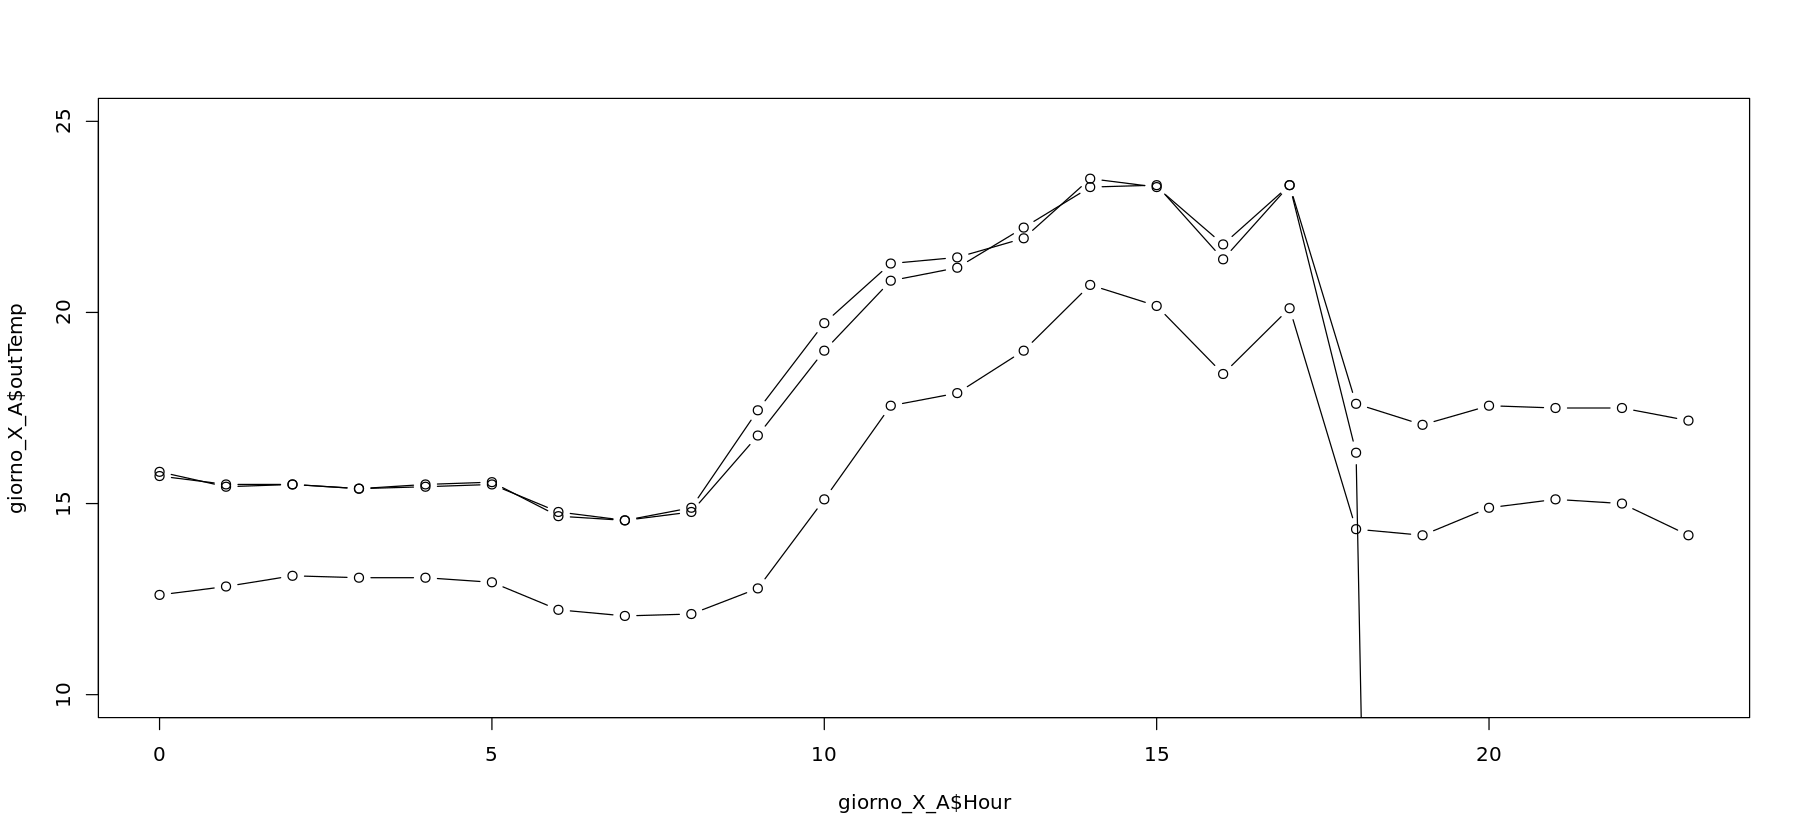

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 7)
plot(giorno_X_A$Hour, giorno_X_A$outTemp, type = 'b', ylim = c(10,25))
lines(giorno_X_B$Hour, giorno_X_B$outTemp, type = 'b')
lines(giorno_X_C$Hour, giorno_X_C$outTemp, type = 'b')



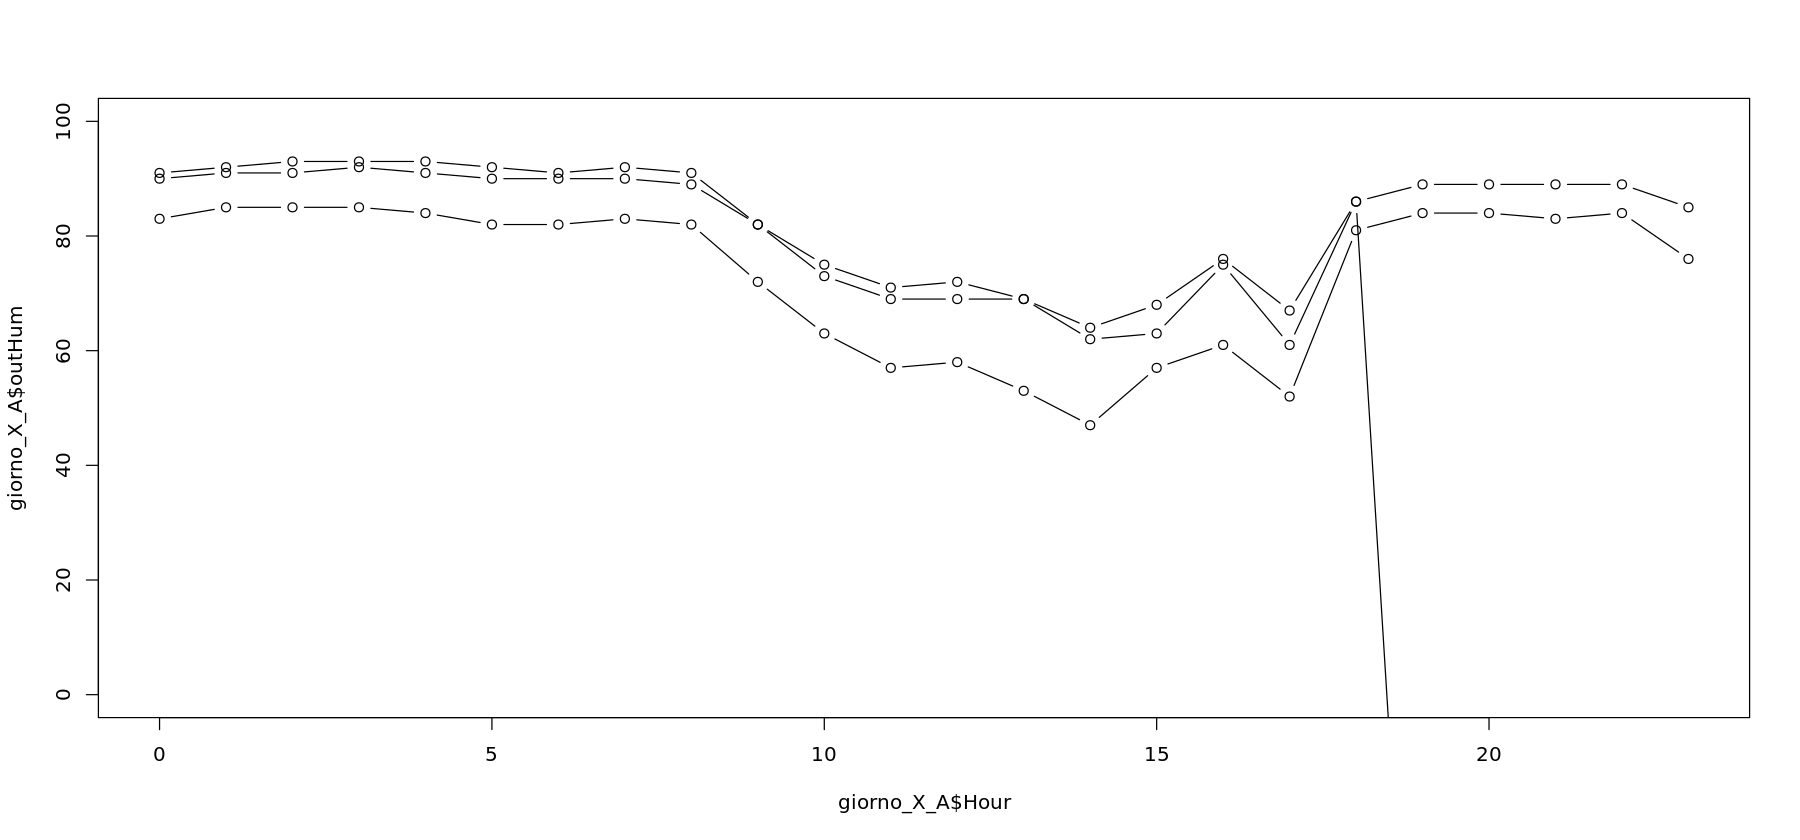

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 7)
plot(giorno_X_A$Hour, giorno_X_A$outHum, type = 'b', ylim = c(0,100))
lines(giorno_X_B$Hour, giorno_X_B$outHum, type = 'b')
lines(giorno_X_C$Hour, giorno_X_C$outHum, type = 'b')

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 7)
pdf('Plots/precipitazione_X.pdf', width = 15, height = 7)
par(mar = c(4,7,4,4))
plot(0:23, giorno_X_A$rainRate, type = 'b', main = 'Tasso di precipitazione del 12/05/2017', cex.main = 3,
    xlab = 'Ora', ylab= 'Tasso di precipitazione (mm/h)', cex.lab = 2, cex.axis = 1.5, ylim = c(0,450),
    col= rgb(0.11, 0.62, 0.47), lwd = 2.5, xaxt = 'n')
axis(1, at = 0:23)
lines(giorno_X_B$Hour, giorno_X_B$rainRate, type = 'b', col = rgb(0.85, 0.37, 0.01), lwd = 2.5)
lines(giorno_X_C$Hour, giorno_X_C$rainRate, type = 'b', col = rgb(0.46, 0.44, 0.7), lwd = 2.5)
legend(x='topleft', legend= c('Stazione A', "Stazione B", 'Stazione C'), bty = 'n', col = c(rgb(0.11, 0.62, 0.47), rgb(0.85, 0.37, 0.01), rgb(0.46, 0.44, 0.7)), lwd = 3)
dev.off()

png 
  2

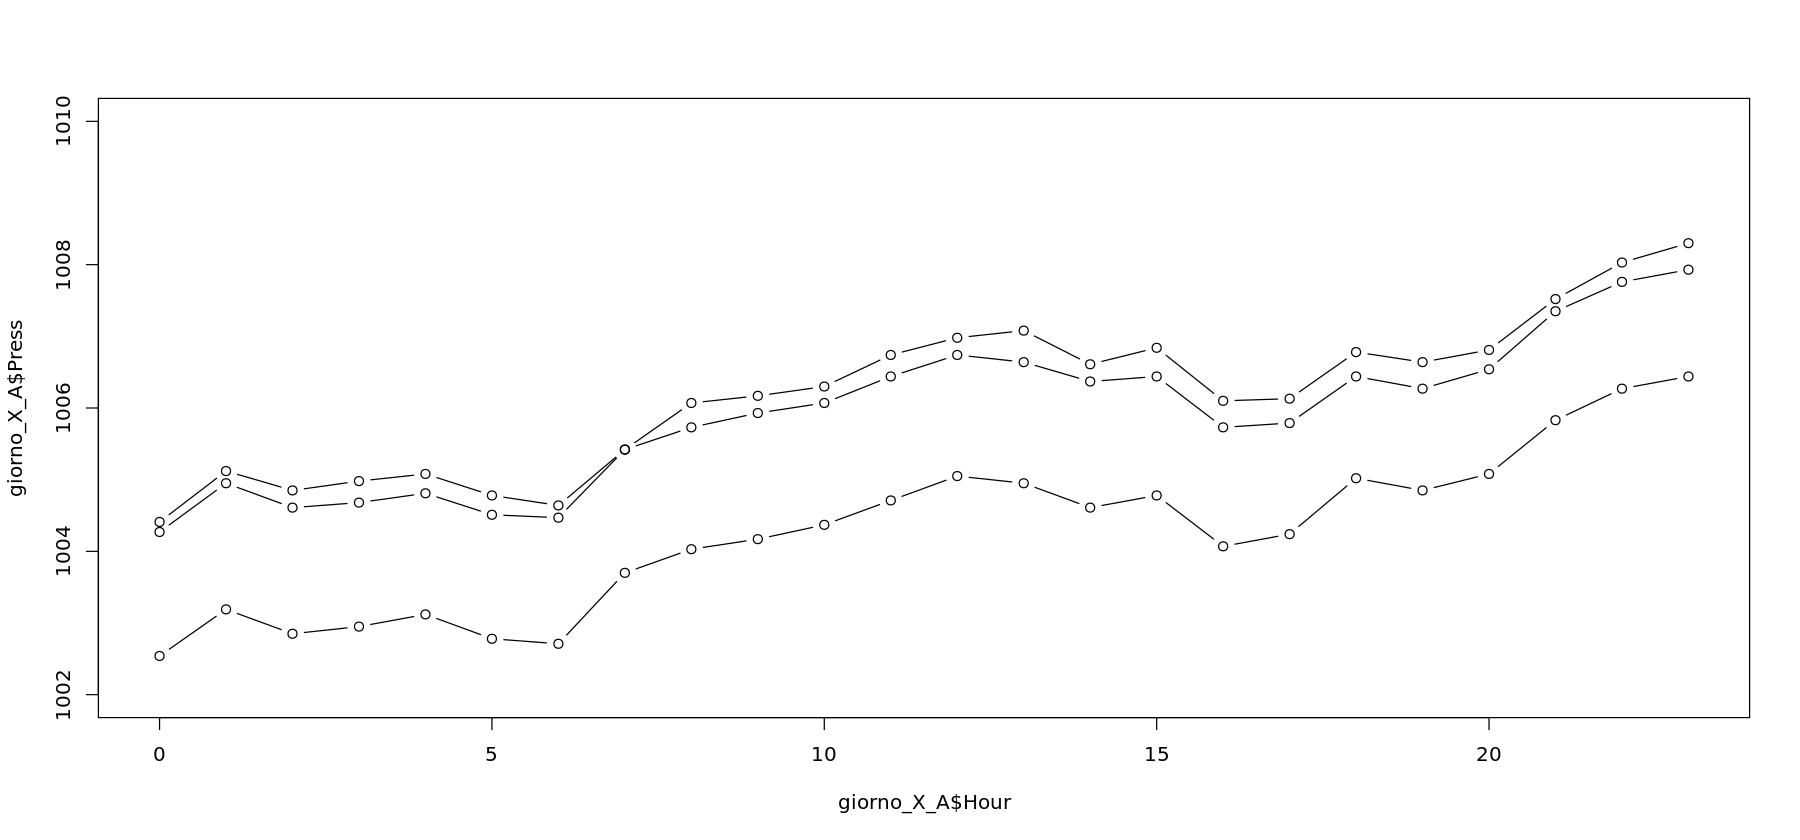

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 7)
plot(giorno_X_A$Hour, giorno_X_A$Press, type = 'b', ylim = c(1002,1010))
lines(giorno_X_B$Hour, giorno_X_B$Press, type = 'b')
lines(giorno_X_C$Hour, giorno_X_C$Press, type = 'b')

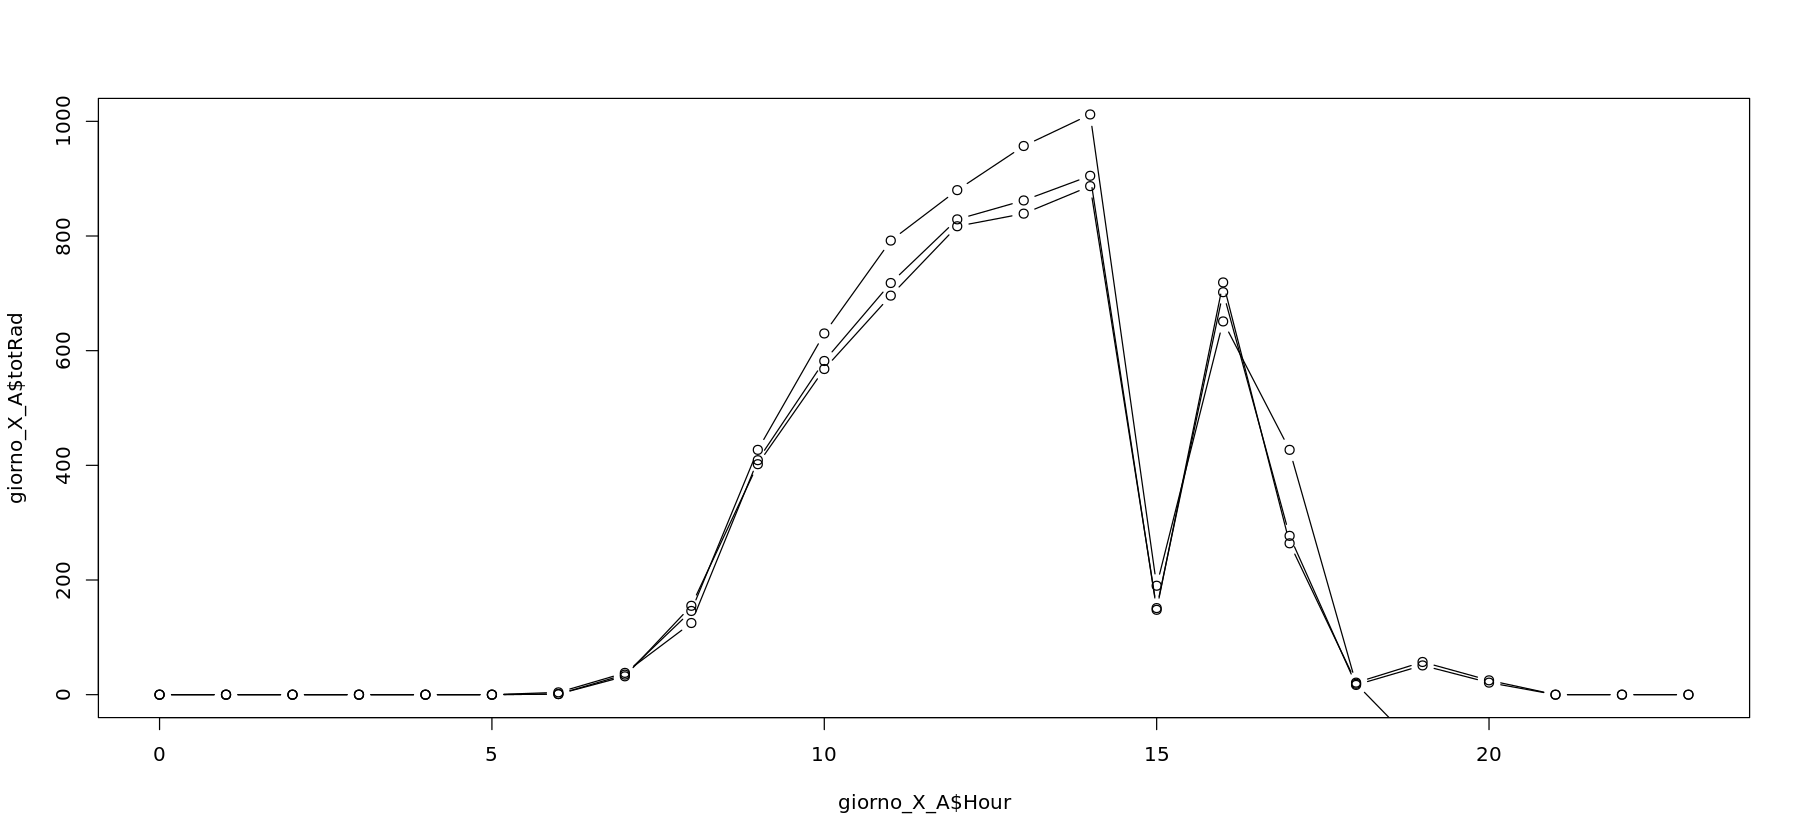

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 7)
plot(giorno_X_A$Hour, giorno_X_A$totRad, type = 'b', ylim = c(0,1000))
lines(giorno_X_B$Hour, giorno_X_B$totRad, type = 'b')
lines(giorno_X_C$Hour, giorno_X_C$totRad, type = 'b')

In [ ]:
ReadDataX <- function(c='ciao') {
    
    StationData <- read.table(file(paste0('Data/StationData_', c, '.txt')),
                          sep = "", # separate columns by space
                          fill = TRUE,
                          na.string = NA, # tag empty values as "NA"
                          as.is = TRUE, # convert character to factors
                          header = FALSE, # ignore the header
                          skip = 1, # skip the first row
                          col.names = c("Date","Time","Interval",
                                        "Press","inTemp","outTemp",
                                        "inHum","outHum","wndSpeed",
                                        "wndDir","windGust","wGstDir",
                                        "rainRate","rain","dewpoint",
                                        "wdChill","heatIndx","ET",
                                        "totRad","UV")
                            )


    # DATE FORMAT ===============================================
    # Define 1st and 2nd columns as a String and split into 5 columns
    Temp <- t(rbind(as.numeric(substr(StationData[,1],1,4)), # year
          as.numeric(substr(StationData[,1],5,6)), # month
          as.numeric(substr(StationData[,1],7,8)), # day
          floor(StationData[,2]), # hour
          round(100*(StationData[,2] %%1)) # minutes
          ))

    # Define names to rows and columns
    colnames(Temp) <- c("Year","Month","Day","Hour","Minutes")
    rownames(Temp) <- 1:dim(Temp)[1]

    # Replace the new date format (2 cols > 5 cols) and keep only the WindRose variables
    StationData <- cbind(Temp,StationData[,9:12])
    colnames(StationData) = c('Year', 'Month', 'Day', 'Hour', 'Minutes',"wndSpeed",
                                        "wndDir","wndGust","wGstDir" )
    
    StationData = as.data.frame(StationData)
    return(StationData)
}

Spring_A_X = ReadDataX('A')
Spring_B_X = ReadDataX('B')
Spring_C_X = ReadDataX('C')

Spring_A_X = Spring_A_X %>% filter(Year == 2017 & Month == 5 & Day == 12 & Minutes == 0)
Spring_B_X = Spring_B_X %>% filter(Year == 2017 & Month == 5 & Day == 12 & Minutes == 0)
Spring_C_X = Spring_C_X %>% filter(Year == 2017 & Month == 5 & Day == 12 & Minutes == 0)

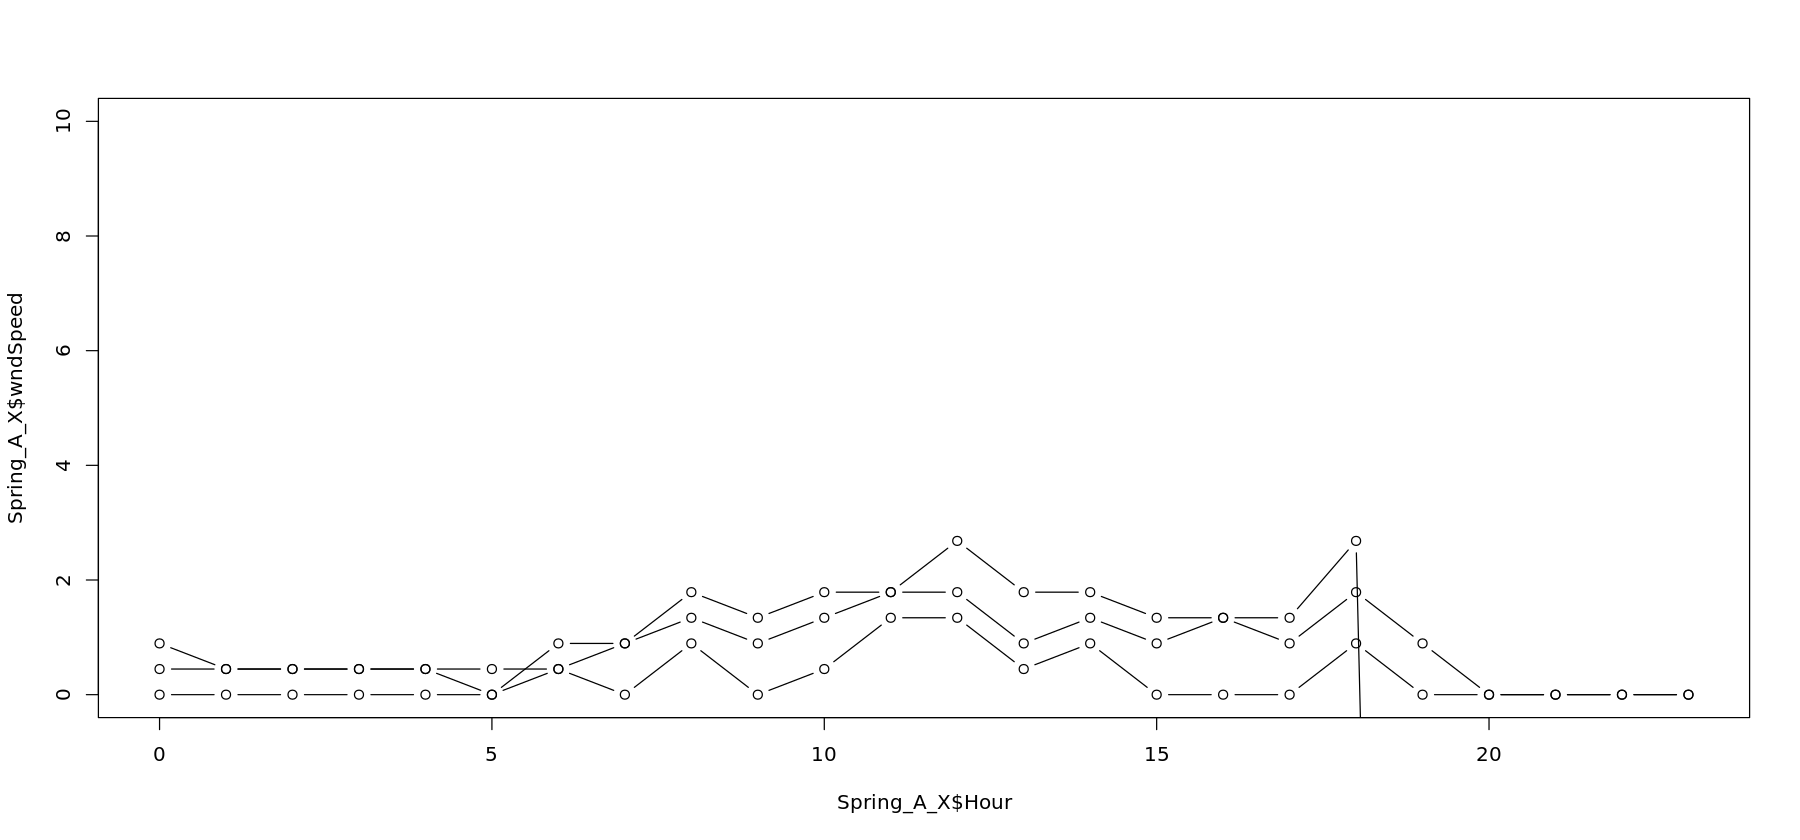

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 7)
plot(Spring_A_X$Hour, Spring_A_X$wndSpeed, type = 'b', ylim = c(0,10))
lines(Spring_B_X$Hour, Spring_B_X$wndSpeed, type = 'b')
lines(Spring_C_X$Hour, Spring_C_X$wndSpeed, type = 'b')

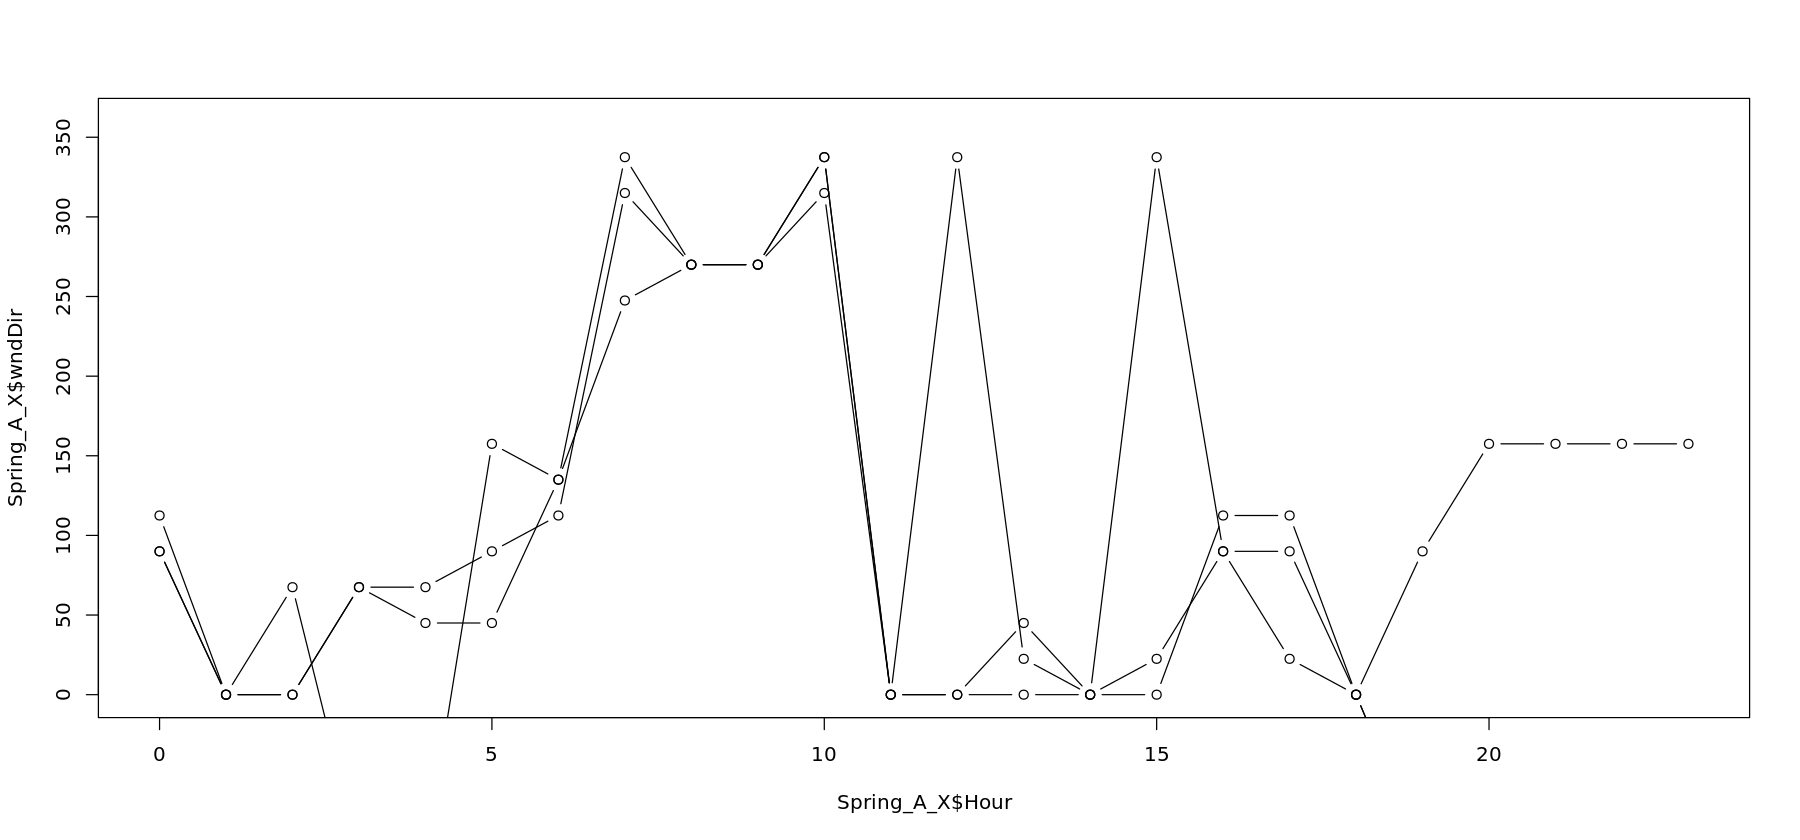

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 7)
plot(Spring_A_X$Hour, Spring_A_X$wndDir, type = 'b', ylim = c(0,360))
lines(Spring_B_X$Hour, Spring_B_X$wndDir, type = 'b')
lines(Spring_C_X$Hour, Spring_C_X$wndDir, type = 'b')

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 7)
pdf('Plots/windGust_X.pdf', width = 15, height = 7)
par(mar = c(4,7,4,4))
plot(0:23, Spring_A_X$wndGust, type = 'b', main = 'Raffiche di vento del 12/05/2017', cex.main = 3,
    xlab = 'Ora', ylab= 'Velocità (m/s)', cex.lab = 2, cex.axis = 1.5, ylim = c(0,15),
    col= rgb(0.11, 0.62, 0.47), lwd = 2.5, xaxt = 'n')
axis(1, at = 0:23)
lines(Spring_B_X$Hour, Spring_B_X$wndGust, type = 'b', col = rgb(0.85, 0.37, 0.01), lwd = 2.5)
lines(Spring_C_X$Hour, Spring_C_X$wndGust, type = 'b', col = rgb(0.46, 0.44, 0.7), lwd = 2.5)
legend(x='topleft', legend= c('Stazione A', "Stazione B", 'Stazione C'), bty = 'n', col = c(rgb(0.11, 0.62, 0.47), rgb(0.85, 0.37, 0.01), rgb(0.46, 0.44, 0.7)), lwd = 3)
dev.off()


png 
  2

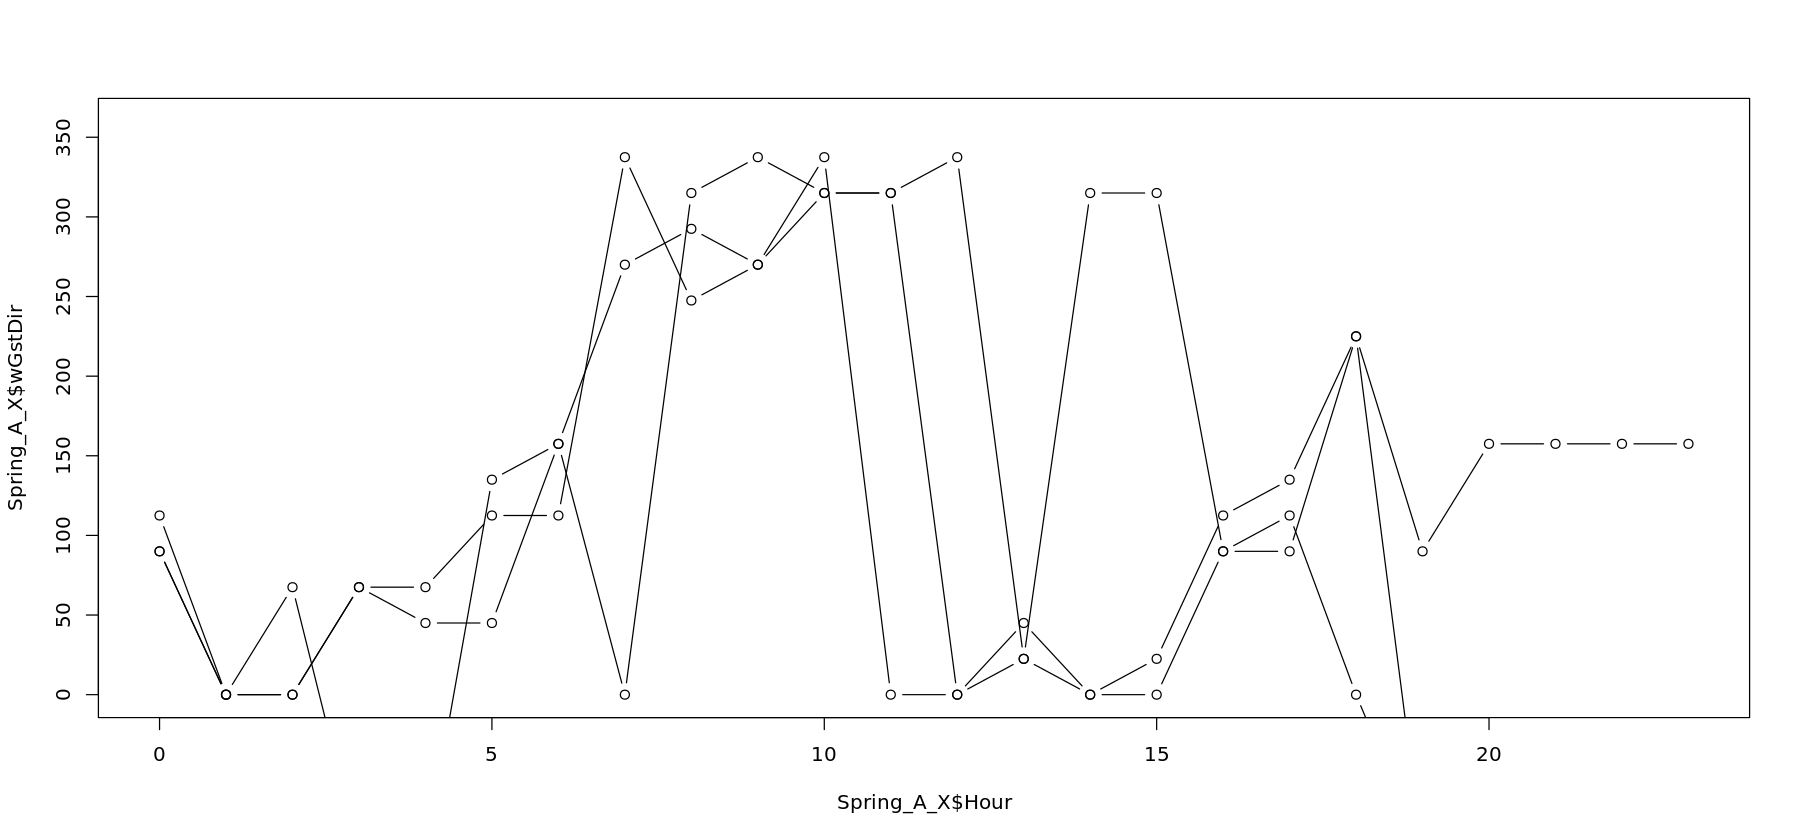

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 7)
plot(Spring_A_X$Hour, Spring_A_X$wGstDir, type = 'b', ylim = c(0,360))
lines(Spring_B_X$Hour, Spring_B_X$wGstDir, type = 'b')
lines(Spring_C_X$Hour, Spring_C_X$wGstDir, type = 'b')

In [ ]:
ARPAE_x_wndGust = c(4.1, 4.3, 2.3, 2.7, 2.1, 2.7, 3.5, 4.5, 4.9, 4, 4, 3.9, 6.1, 5.3, 6.5, 6,
3.6, 4.8, 8.4, 3.6, 3.2, 2.6, 2.6, 3.8)

giorno_X_ARPAE

Year Month Day Hour Press  totRad rainRate outHum outTemp
17291 2017 5     12   0    99630   0     0.0     99     15.3   
17301 2017 5     12   1    99640  -1     0.0     97     15.5   
17311 2017 5     12   2    99650  -5     0.0     94     15.7   
17321 2017 5     12   3    99610 -12     0.0     94     15.3   
17331 2017 5     12   4    99610  -9     0.0     95     14.5   
17341 2017 5     12   5    99700  58     0.0     94     14.6   
17351 2017 5     12   6    99740 147     0.0     92     14.8   
17361 2017 5     12   7    99760 361     0.0     77     17.9   
17371 2017 5     12   8    99770 549     0.0     68     19.8   
17381 2017 5     12   9    99820 710     0.0     63     21.2   
17391 2017 5     12  10    99850 793     0.0     70     20.5   
17401 2017 5     12  11    99850 846     0.0     65     21.2   
17411 2017 5     12  12    99810 699     0.0     62     22.2   
17421 2017 5     12  13    99830 304     0.2     65     22.1   
17431 2017 5     12  14    99760 474     2.0     71     22.0   
17441 2017 5     12  15    99760 428     0.0     58     22.8   
17451 2017 5     12  16    99830  28    14.4     87     16.9   
17461 2017 5     12  17    99810  86     0.2     85     17.9   
17471 2017 5     12  18    99830  28     0.0     87     18.1   
17481 2017 5     12  19    99900   4     0.0     89     17.1   
17491 2017 5     12  20    99950  -1     0.0     87     18.1   
17501 2017 5     12  21    99970   0     0.0     75     18.0   
17511 2017 5     12  22   100030  -1     0.0     75     17.7   
17521 2017 5     12  23   100020  -1     0.0     67     17.7

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 15)

pdf('giorno_X.pdf', width = 30, height = 15)
par(mar = c(4,7,4,4), mfrow = c(2,2))

plot(0:23, Spring_A_X$wndGust, type = 'b', main = 'Raffiche di vento - Stazioni DAVIS', cex.main = 3,
    xlab = 'Ora', ylab= 'Velocità (m/s)', cex.lab = 2.3, cex.axis = 1.5, ylim = c(0,15),
    col= rgb(0.11, 0.62, 0.47), lwd = 2.5, xaxt = 'n')
axis(1, at = 0:23)
lines(Spring_B_X$Hour, Spring_B_X$wndGust, type = 'b', col = rgb(0.85, 0.37, 0.01), lwd = 2.5)
lines(Spring_C_X$Hour, Spring_C_X$wndGust, type = 'b', col = rgb(0.46, 0.44, 0.7), lwd = 2.5)
legend(x='topleft', legend= c('Stazione A', "Stazione B", 'Stazione C'), bty = 'n', col = c(rgb(0.11, 0.62, 0.47), rgb(0.85, 0.37, 0.01), rgb(0.46, 0.44, 0.7)), lwd = 3,
    cex = 2)
plot(0:23, ARPAE_x_wndGust, type = 'b', main = 'Raffiche di vento - Dati ARPAE', cex.main = 3,
    xlab = 'Ora', ylab= 'Velocità (m/s)', cex.lab = 2.3, cex.axis = 1.5, ylim = c(0,15),
    lwd = 2.5, xaxt = 'n')
axis(1, at = 0:23)

plot(0:23, giorno_X_A$rainRate, type = 'b', main = 'Tasso di precipitazione - Stazioni DAVIS', cex.main = 3,
    xlab = 'Ora', ylab= 'Tasso di precipitazione (mm/h)', cex.lab = 2, cex.axis = 1.5, ylim = c(0,450),
    col= rgb(0.11, 0.62, 0.47), lwd = 2.5, xaxt = 'n')
axis(1, at = 0:23)
lines(giorno_X_B$Hour, giorno_X_B$rainRate, type = 'b', col = rgb(0.85, 0.37, 0.01), lwd = 2.5)
lines(giorno_X_C$Hour, giorno_X_C$rainRate, type = 'b', col = rgb(0.46, 0.44, 0.7), lwd = 2.5)
legend(x='topleft', legend= c('Stazione A', "Stazione B", 'Stazione C'), bty = 'n', col = c(rgb(0.11, 0.62, 0.47), rgb(0.85, 0.37, 0.01), rgb(0.46, 0.44, 0.7)), 
        lwd = 3, cex = 2)
plot(0:23, giorno_X_ARPAE$rainRate, type = 'b', main = 'Tasso di precipitazione - Dati ARPAE', cex.main = 3,
    xlab = 'Ora', ylab= 'Tasso di precipitazione (mm/h)', cex.lab = 2.3, cex.axis = 1.5, ylim = c(0,400),
    lwd = 2.5, xaxt = 'n')
axis(1, at = 0:23)

dev.off()

png 
  2

In [ ]:
giorno_X_ARPAE$rainRate[2:23] = 

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: giorno_X_ARPAE$rainRate[2:23] = 
   ^


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a65805a3-5683-44f7-87a1-3d0b16d3432c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>